# Documentation

## Notebook History

**Date | Version | Author | Comments**
- 2022-01-19 | 0.3 | Andre Buser | Completed the advanced anaylsis section. 
- 2022-01-18 | 0.2 | Andre Buser | Updated basic analysis because GDPR article split was removed from the GDPR fine dataset. Split needs to be done here, now. Corrected df merge to use outer joins.
- 2022-01-15 | 0.1 | Andre Buser | Initial draft.

## Open tasks / Last Activitites

Open tasks and/or the latest activities in this section:
- [X] #TODO: SPLIT articles (see GDPR fine DCL notebook)
- [X] #TODO: **Complete** Data Science Ethics Checklist

## Purpose

The objective of this **stage three** notebook is to conduct EDA.

## Data Science Ethics Checklist

[![Deon badge](https://img.shields.io/badge/ethics%20checklist-deon-brightgreen.svg?style=popout-square)](http://deon.drivendata.org/)

### C. Analysis
 - [**NA**] **C.1 Missing perspectives**: Have we sought to address blindspots in the analysis through engagement with relevant stakeholders (e.g., checking assumptions and discussing implications with affected communities and subject matter experts)?
 - [**NA**] **C.2 Dataset bias**: Have we examined the data for possible sources of bias and taken steps to mitigate or address these biases (e.g., stereotype perpetuation, confirmation bias, imbalanced classes, or omitted confounding variables)?
 - [X] **C.3 Honest representation**: Are our visualizations, summary statistics, and reports designed to honestly represent the underlying data?
 - [X] **C.4 Privacy in analysis**: Have we ensured that data with PII are not used or displayed unless necessary for the analysis?
 - [X] **C.5 Auditability**: Is the process of generating the analysis well documented and reproducible if we discover issues in the future?

*Data Science Ethics Checklist generated with [deon](http://deon.drivendata.org).*


# Setup Environment

## Install Modules

List !pip install commands for modules which are not part of the Google Colabs standard environment. For local environment, please use the provided installation files and environments.

In [1571]:
# document module versions
!pip install watermark

# To generate an advanced the correlation matrix
!pip install dython

## Import Modules

In [1572]:
# Base libraries
import os
import sqlite3

# Scientific libraries
import numpy as np
import pandas as pd

# Visual libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# Helper libraries
import gc # garbage collection to optimize memory usage, use gc.collect()
import warnings
warnings.filterwarnings('ignore')

# Visual setup
import altair as alt
import matplotlib.ticker as ticker
plt.style.use('fivethirtyeight')
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
rcParams['figure.figsize'] = [12, 9]
rcParams['font.size'] = 16
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
#custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
#sns.set_palette(custom_colors)
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

# Pandas options
pd.set_option('display.float_format',  '{:,}'.format)
pd.set_option('max_colwidth', 40)
pd.options.display.max_columns = None  # Possible to limit
pd.options.display.max_rows = None  # Possible to limit
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load magic commands
%load_ext watermark


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


## Define Parameters

In [1573]:
# Using a hybrid path model to ensure that the notebook can be used locally or with Google Colab
try:
    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)

    # Paths: Google Colabs Setup
    PATH_EXT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/external/"
    PATH_RAW = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/raw/"
    PATH_INT = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/interim/"
    PATH_PRO = "/content/drive/MyDrive/MADS/SIADS591-592/Project/data/processed/"
    PATH_REP = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/"
    PATH_FIGS = "/content/drive/MyDrive/MADS/SIADS591-592/Project/reports/figures/"

except:
    # Paths: Local Setup
    PATH_EXT = "../data/external/"
    PATH_RAW = "../data/raw/"
    PATH_INT = "../data/interim/"
    PATH_PRO = "../data/processed/"
    PATH_REP = "../reports/"
    PATH_FIGS = "../reports/figures/"

# Load Data

In [1574]:
# Loading all tables from the sqlite database file
FILENAME = "project_GDPR-fines.sqlite"
data_path = os.path.join(PATH_PRO, FILENAME)

con = sqlite3.connect(data_path)
df_gdpr = pd.read_sql("select * from GDPR", con)
df_gdp = pd.read_sql("select * from GDP", con)
df_cpi = pd.read_sql("select * from CPI", con)
df_pop = pd.read_sql("select * from POP", con)
con.close()

In [1575]:
df_gdpr.shape
df_gdp.shape
df_cpi.shape
df_pop.shape

(978, 16)

(124, 7)

(124, 8)

(124, 7)

In [1576]:
# Merging all tables into one dataframe
df = pd.DataFrame()
df_gdp = df_gdp[['mapping_key','gdp','gdp_cat']]
df = df_gdpr.merge(df_gdp, on="mapping_key", how='inner')

df_cpi = df_cpi[['iso3','mapping_key','cpi_score','cpi_score_cat']]
df = df.merge(df_cpi, on="mapping_key", how='inner')

df_pop = df_pop[['mapping_key','population','population_cat']]
df = df.merge(df_pop, on="mapping_key", how='inner')

In [1577]:
df.head()
df.shape

,etid,country,fine,controller_processor,article,violation_type,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2,mapping_key,country_label,violation_type_label,sector_label,gdp,gdp_cat,iso3,cpi_score,cpi_score_cat,population,population_cat
0,ETid-986,GREECE,"30,000.0",Info Communication Services,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"30,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000
1,ETid-985,GREECE,"25,000.0",Plus Real Advertisement,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"25,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000
2,ETid-957,GREECE,"30,000.0",One Way Private Company,"Art. 28 (3) c) GDPR, Art. 32 (2), (4...",Insufficient technical and organisat...,"Media, Telecoms and Broadcasting",The Hellenic DPA has imposed a fine ...,No,2021,"30,000.0",6.0,GREECE-2021,11,7,6,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000
3,ETid-919,GREECE,"20,000.0",Καπα Λαμδα Ωμεγα Διαφημιστικη Εμπορι...,"Art. 6 GDPR, Art. 12 (2) GDPR, Art. ...",Insufficient legal basis for data pr...,Industry and Commerce,The Hellenic DPA has fined ΚΑΠΑ ΛΑΜΔ...,No,2021,"20,000.0",5.0,GREECE-2021,11,6,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000
4,ETid-897,GREECE,"5,000.0",Premiummedia Παραγωγη Οπτικο-Ακουστι...,"Art. 21 (3) GDPR, Art. 25 GDPR",Insufficient fulfilment of data subj...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"5,000.0",3.0,GREECE-2021,11,3,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000


(978, 23)

In [1578]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 0 to 977
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   etid                   978 non-null    object 
 1   country                978 non-null    object 
 2   fine                   952 non-null    float64
 3   controller_processor   978 non-null    object 
 4   article                978 non-null    object 
 5   violation_type         978 non-null    object 
 6   sector                 978 non-null    object 
 7   summary                978 non-null    object 
 8   decision_date_imputed  978 non-null    object 
 9   decision_year          978 non-null    int64  
 10  fine_cat               952 non-null    float64
 11  fine_cat2              952 non-null    float64
 12  mapping_key            978 non-null    object 
 13  country_label          978 non-null    int64  
 14  violation_type_label   978 non-null    int64  
 15  sector

In [1579]:
df.describe().round(0)

,fine,decision_year,fine_cat,fine_cat2,country_label,violation_type_label,sector_label,gdp,gdp_cat,cpi_score,cpi_score_cat,population,population_cat
count,952.0,978.0,952.0,952.0,978.0,978.0,978.0,975.0,975.0,975.0,975.0,978.0,978.0
mean,"1,382,942.0","2,020.0","1,382,941.0",4.0,19.0,6.0,5.0,"1,048,908,837,723.0","1,048,687,179,487.0",62.0,61.0,"33,671,637.0","33,680,879.0"
std,"25,363,689.0",1.0,"25,363,689.0",3.0,9.0,2.0,2.0,"883,817,360,653.0","883,926,116,514.0",13.0,13.0,"23,099,693.0","23,102,786.0"
min,0.0,"2,018.0",0.0,0.0,0.0,0.0,0.0,"15,215,714,309.0","20,000,000,000.0",42.0,40.0,"38,128.0",0.0
25%,"3,000.0","2,020.0","3,000.0",2.0,12.0,5.0,3.0,"249,696,854,574.0","250,000,000,000.0",53.0,50.0,"10,099,265.0","10,100,000.0"
50%,"10,000.0","2,020.0","10,000.0",4.0,23.0,6.0,5.0,"1,281,484,640,044.0","1,280,000,000,000.0",60.0,60.0,"46,736,776.0","46,700,000.0"
75%,"50,000.0","2,021.0","50,000.0",7.0,27.0,7.0,7.0,"1,320,033,318,744.0","1,320,000,000,000.0",69.0,70.0,"46,771,375.0","46,800,000.0"
max,"746,000,000.0","2,021.0","746,000,000.0",9.0,30.0,9.0,10.0,"3,975,347,237,443.0","3,980,000,000,000.0",89.0,90.0,"84,189,092.0","84,200,000.0"


# Project Objectives

**Objective**: The purpose of the project is to analyze GDPR fines that have been issued since 2018 and to get: 
Basic insights regarding:
- Which industry sectors have been penalized the most?
- **CHANGE** Highest fined company and sector?
- Which EU countries have the most violations?
- **CHANGE** Which GDPR articles have been quoted the most?
- What are the “average costs” of a violation per sector?


Advanced insights by correlating the GDPR fine dataset with the population by country (POP), gross domestic product (GDP), and corruption perception index (CPI) by country, the project intents to verify the following assumptions:
- A higher GDP could lead to: 
  - More violated cases, because a higher GDP could mean more companies in the country
  - Higher fines, because the maximum fine is linked to the total worldwide annual turnover
- A higher CPI could lead to 
  - Fewer violation cases, because the public sector is maybe influenced by the companies
- A higher population could lead to
  - More reported cases because more data subjects could execute their rights

# EDA

## Preparing dataset

In [1580]:
# Drop "Isle of Man" GDPR fines due to missing values:
#df[df['country'] == 'ISLE OF MAN']
#df = df[df['country'] != 'ISLE OF MAN']
#assert len(df[df['country'] == 'ISLE OF MAN']) == 0

In [1581]:
# Group features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

numerical_features
categorical_features

['fine',
 'decision_year',
 'fine_cat',
 'fine_cat2',
 'country_label',
 'violation_type_label',
 'sector_label',
 'gdp',
 'gdp_cat',
 'cpi_score',
 'cpi_score_cat',
 'population',
 'population_cat']

['etid',
 'country',
 'controller_processor',
 'article',
 'violation_type',
 'sector',
 'summary',
 'decision_date_imputed',
 'mapping_key',
 'iso3']

## Answer Basic Questions

### Prepare Dataframe

In [1582]:
df_eda = df.copy()

In [1583]:
#df_eda.head()
#df_eda.info()
df_eda.shape

(978, 23)

### Which industry sectors have been penalized the most?

In [1584]:
# Most penalized by count of GDPR cases:
print("Top 5 penalized sectors by count of GDPR cases")
#df_eda['sector'].value_counts().head(5).to_frame("count")
df_eda.groupby(['sector'])['etid'].count().sort_values(ascending=False).head(5).to_frame("count").reset_index()

Top 5 penalized sectors by count of GDPR cases


,sector,count
0,Industry and Commerce,212
1,"Media, Telecoms and Broadcasting",164
2,Public Sector and Education,131
3,"Finance, Insurance and Consulting",98
4,Health Care,80


In [1585]:
# Most penalized by sum of GDPR fines:
print("Top 5 penalized sectors by sum of GDPR fines")
#df_eda['sector'].value_counts().head(5).to_frame("count")
df_eda.groupby(['sector'])['fine'].sum().sort_values(ascending=False).head(5).to_frame("count").reset_index()

Top 5 penalized sectors by sum of GDPR fines


,sector,count
0,Industry and Commerce,"767,539,792.0"
1,"Media, Telecoms and Broadcasting","370,180,441.0"
2,Transportation and Energy,"53,341,369.0"
3,Employment,"47,711,677.0"
4,"Finance, Insurance and Consulting","28,536,065.0"


In [1586]:
# Overview of sector
df_eda.groupby(['sector'])['fine'].agg(['sum','mean','size']).round(0).reset_index()#.sort_values(ascending=False).head(5).to_frame("sum")

,sector,sum,mean,size
0,Accomodation and Hospitalty,"21,461,207.0","766,472.0",28
1,Employment,"47,711,677.0","701,642.0",69
2,"Finance, Insurance and Consulting","28,536,065.0","303,575.0",98
3,Health Care,"12,510,933.0","158,366.0",80
4,Individuals and Private Associations,"1,367,646.0","19,821.0",71
5,Industry and Commerce,"767,539,792.0","3,762,450.0",212
6,"Media, Telecoms and Broadcasting","370,180,441.0","2,285,064.0",164
7,Public Sector and Education,"12,650,713.0","99,612.0",131
8,Real Estate,"515,970.0","19,845.0",27
9,Transportation and Energy,"53,341,369.0","1,212,304.0",44


In [1587]:
df_plot = df.groupby(['country','sector'])['fine'].count().reset_index()

In [1588]:
# Configure text
text = (
    alt.Chart(df_plot)
    .mark_text(color="white")
    .encode(
        x=alt.X("country:N", title=""),
        y=alt.Y("sector:N", title=""),
        text=alt.Text("fine:Q"),
    )
)

heatmap = (
    alt.Chart(df_plot, title="")
    .mark_rect()
    .encode(
        x=alt.X("country:N", title=""),
        y=alt.Y("sector:N", title=""),
        #color=alt.Color("fine", legend=None, scale=alt.Scale(type="log", nice=True)),
        color=alt.Color("fine", legend=None, scale=alt.Scale(scheme='greenblue')),
    )
)

combined = (
    (heatmap + text)
    .properties(title="", width=800, height=350)
    .configure_legend(labelFontSize=30)
    .configure_view(strokeWidth=0)
    #.configure(background="#F0F0F0")
    .configure_axis(labelFontSize=11,
    titleFontSize=11)
)

combined

alt.LayerChart(...)

In [1589]:
# Configure text
text = (
    alt.Chart(df_plot)
    .mark_text(color="white")
    .encode(
        x=alt.X("country:N", title=""),
        y=alt.Y("sector:N", title=""),
        text=alt.Text("fine:Q"),
    )
)

heatmap = (
    alt.Chart(df_plot, title="")
    .mark_rect()
    .encode(
        x=alt.X("country:N", title=""),
        y=alt.Y("sector:N", title=""),
        #y=alt.Y("sector:N", title="", axis=alt.Axis(labels=False)),
        #color=alt.Color("fine", legend=None, scale=alt.Scale(type="log", nice=True)),
        color=alt.Color("fine", legend=None, scale=alt.Scale(scheme='greenblue')),
    )
)

combined = (
    (heatmap + text)
    .properties(title="", width=800, height=350)
    .configure_legend(labelFontSize=30)
    .configure_view(strokeWidth=0)
    #.configure(background="#F0F0F0")
    .configure_axis(labelFontSize=11,
    titleFontSize=11)
)

combined

alt.LayerChart(...)

In [1590]:
df_plot = df[df['sector'] == 'Health Care']
df_plot['fine'].fillna(0, inplace=True)
df_plot = df_plot.groupby(['country','sector'])['fine'].count().reset_index()
df_plot.head(5)

,country,sector,fine
0,AUSTRIA,Health Care,2
1,BULGARIA,Health Care,2
2,CYPRUS,Health Care,2
3,CZECH REPUBLIC,Health Care,2
4,DENMARK,Health Care,3


In [1591]:
# Configure text
text = (
    alt.Chart(df_plot)
    .mark_text(color="white")
    .encode(
        x=alt.X("country:N", title=""),
        y=alt.Y("sector:N", title=""),
        text=alt.Text("fine:Q"),
    )
)

heatmap = (
    alt.Chart(df_plot, title="")
    .mark_rect()
    .encode(
        x=alt.X("country:N", title=""),
        y=alt.Y("sector:N", title=""),
        #color=alt.Color("fine", legend=None, scale=alt.Scale(type="log", nice=True)),
        color=alt.Color("fine", legend=None, scale=alt.Scale(scheme='greenblue')),
    )
)

combined = (
    (heatmap + text)
    .properties(title="", width=800, height=50)
    .configure_legend(labelFontSize=30)
    .configure_view(strokeWidth=0)
    #.configure(background="#F0F0F0")
    .configure_axis()
)

combined

alt.LayerChart(...)

In [1592]:
df_plot = df.groupby(['country','sector'])['fine'].mean().reset_index()

In [1593]:
# Configure text
text = (
    alt.Chart(df_plot)
    .mark_text(color="white")
    .encode(
        x=alt.X("country:N", title=""),
        y=alt.Y("sector:N", title=""),
        text=alt.Text("fine:Q"),
    )
)

heatmap = (
    alt.Chart(df_plot, title="")
    .mark_rect()
    .encode(
        x=alt.X("country:N", title=""),
        y=alt.Y("sector:N", title=""),
        #color=alt.Color("fine", legend=None, scale=alt.Scale(type="log", nice=True)),
        color=alt.Color("fine", scale=alt.Scale(scheme='greenblue')),
    )
)

combined = (
    (heatmap)
    .properties(title="", width=800, height=500)
    .configure_legend(labelFontSize=12)
    .configure_view(strokeWidth=0)
    #.configure(background="#F0F0F0")
    .configure_axis(labelFontSize=11,
    titleFontSize=11)
)

combined

alt.Chart(...)

In [1594]:
df_plot = df.groupby(['country'])['fine'].size().reset_index()

In [1595]:
df_plot.head()

,country,fine
0,AUSTRIA,16
1,BELGIUM,26
2,BULGARIA,21
3,CROATIA,4
4,CYPRUS,18


In [1596]:
# Configure text
text = (
    alt.Chart(df_plot)
    .mark_text(color="white")
    .encode(
        x=alt.X("country:N", title=""),
        #y=alt.Y("sector:N", title=""),
        text=alt.Text("fine:Q"),
    )
)

heatmap = (
    alt.Chart(df_plot, title="")
    .mark_rect()
    .encode(
        x=alt.X("country:N", title=""),
        #y=alt.Y("sector:N", title=""),
        #color=alt.Color("fine", legend=None, scale=alt.Scale(type="log", nice=True)),
        color=alt.Color("fine", legend=None, scale=alt.Scale(scheme='greenblue')),
    )
)

combined = (
    (heatmap + text)
    .properties(title="", width=800, height=50)
    .configure_legend(labelFontSize=30)
    .configure_view(strokeWidth=0)
    #.configure(background="#F0F0F0")
    .configure_axis()
)

combined

alt.LayerChart(...)

In [1597]:
df_plot = df.groupby(['country','sector'])['fine'].size().reset_index()
df_plot = df_plot[df_plot['sector'] == 'Health Care'].reset_index()
df_plot = df_plot[['country','fine']]
df_plot.head()

,country,fine
0,AUSTRIA,2
1,BULGARIA,2
2,CYPRUS,2
3,CZECH REPUBLIC,2
4,DENMARK,3


In [1598]:
# Add missing country back / countries without Healthcare fines
df_plot.loc[len(df_plot.index)] = ["BELGIUM", 0]
df_plot.loc[len(df_plot.index)] = ["CROATIA", 0]
df_plot.loc[len(df_plot.index)] = ["ISLE OF MAN", 0]
df_plot.loc[len(df_plot.index)] = ["LATVIA", 0]
df_plot.loc[len(df_plot.index)] = ["LIECHTENSTEIN", 0]
df_plot.loc[len(df_plot.index)] = ["LITHUANIA", 0]
df_plot.loc[len(df_plot.index)] = ["LUXEMBOURG", 0]
df_plot.loc[len(df_plot.index)] = ["MALTA", 0]


In [1599]:
# Configure text
text = (
    alt.Chart(df_plot)
    .mark_text(color="white")
    .encode(
        x=alt.X("country:N", title=""),
        # y=alt.Y("sector:N", title=""),
        text=alt.Text("fine:Q"),
    )
)

heatmap = (
    alt.Chart(df_plot, title="")
    .mark_rect()
    .encode(
        x=alt.X("country:N", title=""),
        # y=alt.Y("sector:N", title=""),
        # color=alt.Color("fine", legend=None, scale=alt.Scale(type="log", nice=True)),
        color=alt.Color("fine", legend=None, scale=alt.Scale(scheme="greenblue")),
    )
)

combined = (
    (heatmap + text)
    .properties(title="", width=800, height=50)
    .configure_legend(labelFontSize=30)
    .configure_view(strokeWidth=0)
    # .configure(background="#F0F0F0")
    .configure_axis()
)

combined


alt.LayerChart(...)

In [1600]:
df[df['sector'] == 'Health Care']['fine'].isna().sum()

1

In [1601]:
df['sector'].isna().sum()

0

### Calculate Ratio between HC fines and total fines

In [1602]:
#df.fillna(0, inplace=True)
df_count = df.groupby(['country'])['etid'].agg(fine_count_all='size') # !! use size to also count the NAN; count only counts non-NAN !!
df_count

,fine_count_all
country,
AUSTRIA,16
BELGIUM,26
BULGARIA,21
CROATIA,4
CYPRUS,18
CZECH REPUBLIC,25
DENMARK,17
ESTONIA,5
FINLAND,9


In [1603]:
df_merged = df.merge(df_count, on='country')
df_merged.head()

,etid,country,fine,controller_processor,article,violation_type,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2,mapping_key,country_label,violation_type_label,sector_label,gdp,gdp_cat,iso3,cpi_score,cpi_score_cat,population,population_cat,fine_count_all
0,ETid-986,GREECE,"30,000.0",Info Communication Services,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"30,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,29
1,ETid-985,GREECE,"25,000.0",Plus Real Advertisement,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"25,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,29
2,ETid-957,GREECE,"30,000.0",One Way Private Company,"Art. 28 (3) c) GDPR, Art. 32 (2), (4...",Insufficient technical and organisat...,"Media, Telecoms and Broadcasting",The Hellenic DPA has imposed a fine ...,No,2021,"30,000.0",6.0,GREECE-2021,11,7,6,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,29
3,ETid-919,GREECE,"20,000.0",Καπα Λαμδα Ωμεγα Διαφημιστικη Εμπορι...,"Art. 6 GDPR, Art. 12 (2) GDPR, Art. ...",Insufficient legal basis for data pr...,Industry and Commerce,The Hellenic DPA has fined ΚΑΠΑ ΛΑΜΔ...,No,2021,"20,000.0",5.0,GREECE-2021,11,6,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,29
4,ETid-897,GREECE,"5,000.0",Premiummedia Παραγωγη Οπτικο-Ακουστι...,"Art. 21 (3) GDPR, Art. 25 GDPR",Insufficient fulfilment of data subj...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"5,000.0",3.0,GREECE-2021,11,3,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,29


In [1604]:
df_hc_filtered = df_merged[df_merged['sector'] == 'Health Care']
df_hc_filtered_count = df_hc_filtered.groupby(['country'])['etid'].agg(fine_count_hc='size') # !! use size to also count the NAN; count only counts non-NAN !!

df_merged = df_hc_filtered.merge(df_hc_filtered_count, on='country')

In [1605]:
df_merged['fine_ratio_hc'] = (df_merged['fine_count_hc'] / df_merged['fine_count_all'])


In [1606]:
df_ratio_hc = df_merged[['country','fine_count_all','fine_count_hc','fine_ratio_hc']].drop_duplicates()
df_ratio_hc.sort_values('fine_ratio_hc', ascending=False)

,country,fine_count_all,fine_count_hc,fine_ratio_hc
75,ESTONIA,5,3,0.6
60,SWEDEN,24,13,0.5416666666666666
79,PORTUGAL,4,1,0.25
8,ITALY,103,19,0.18446601941747573
44,DENMARK,17,3,0.17647058823529413
48,THE NETHERLANDS,17,3,0.17647058823529413
54,ICELAND,6,1,0.16666666666666666
78,SLOVAKIA,6,1,0.16666666666666666
53,UNITED KINGDOM,7,1,0.14285714285714285
39,AUSTRIA,16,2,0.125


In [1607]:
# Add missing country back / countries without Healthcare fines
df_ratio_hc.loc[len(df_ratio_hc.index)] = ['BELGIUM',26,0,0]
df_ratio_hc.loc[len(df_ratio_hc.index)] = ['CROATIA',4,0,0]
df_ratio_hc.loc[len(df_ratio_hc.index)] = ['ISLE OF MAN',2,0,0]
df_ratio_hc.loc[len(df_ratio_hc.index)] = ['LATVIA',5,0,0]
df_ratio_hc.loc[len(df_ratio_hc.index)] = ['LIECHTENSTEIN',1,0,0]
df_ratio_hc.loc[len(df_ratio_hc.index)] = ['LITHUANIA',8,0,0]
df_ratio_hc.loc[len(df_ratio_hc.index)] = ['LUXEMBOURG',16,0,0]
df_ratio_hc.loc[len(df_ratio_hc.index)] = ['MALTA',1,0,0]



In [1608]:
df_ratio_hc.sort_values('country', inplace=True)

In [1609]:
chart = (
    alt.Chart(df_ratio_hc)
    .mark_bar()
    .encode(
        y=alt.Y("country:O", sort="-x", title="Country"),
        x=alt.X("fine_ratio_hc:Q", title="Percentage of GDPR fines in Healthcare"),
        # We will use the following condition to
        # highlight a bar
        color=alt.condition(
            alt.datum.country == "ESTONIA",  # If "US" this test returns True,
            alt.value("#005EA9"),  # highlight a bar with red.
            alt.value('#93D5BD'),  # And grey for the rest of the bars
        ),
    )
    .properties(
        # set the dimensions of the visualization
        width=500,
        height=600,
    )
    )

text = chart.mark_text(
    align="left",
    baseline="middle",
    color="#373737",
    font="Verdana",
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    # use the percentage as the text
    text=alt.Text("fine_ratio_hc:Q", format=".0%")
)

combined = (chart + text).configure_axis(
    labelFontSize=11,
    titleFontSize=11
)

combined

alt.LayerChart(...)

In [1610]:
chart = (
    alt.Chart(df_ratio_hc)
    .mark_bar()
    .encode(
        x=alt.X("country:O", title=""),
        y=alt.Y("fine_ratio_hc:Q", title="", axis=None),  # Percentage of HCS GDPR fines
        # We will use the following condition to
        # highlight a bar
        color=alt.condition(
            alt.datum.fine_ratio_hc >= 0.25,
            alt.value("#005EA9"),
            alt.value("#D0EDCC"),
        ),
    )
    .properties(
        # set the dimensions of the visualization
        width=800,
        height=100,
    )
)

text = chart.mark_text(
    align="center",
    baseline="middle",
    color="#373737",
    font="Verdana",
    dx=3,  # Nudges text to right so it doesn't appear on top of the bar
    dy=-6,
).encode(
    # use the percentage as the text
    text=alt.Text("fine_ratio_hc:Q", format=".0%")
)

combined = (
    (chart + text)
    .configure_axis(labelFontSize=11, titleFontSize=11)
    .configure_view(
        # no stroke around the bars
        strokeWidth=0
    )
)

combined


alt.LayerChart(...)

### Highest fined company and sector?

In [1611]:
# Most penalized by sum of GDPR fines:
print("Top 5 highest fined companies")
df_eda.groupby(['controller_processor'])['fine'].max().sort_values(ascending=False).head(5).to_frame("max").reset_index()

Top 5 highest fined companies


,controller_processor,max
0,Amazon Europe Core S.À.R.L.,"746,000,000.0"
1,Whatsapp Ireland Ltd.,"225,000,000.0"
2,Google Llc,"50,000,000.0"
3,H&M Hennes & Mauritz Online Shop A.B...,"35,258,708.0"
4,Tim (Telecommunications Operator),"27,800,000.0"


In [1612]:
# Most penalized by sum of GDPR fines:
print("Top 5 highest fined sectors")
df_eda.groupby(['sector'])['fine'].max().sort_values(ascending=False).head(5).to_frame("max").reset_index()

Top 5 highest fined sectors


,sector,max
0,Industry and Commerce,"746,000,000.0"
1,"Media, Telecoms and Broadcasting","225,000,000.0"
2,Employment,"35,258,708.0"
3,Transportation and Energy,"22,046,000.0"
4,Accomodation and Hospitalty,"20,450,000.0"


### Which EU countries have the most violations?

In [1613]:
# Most penalized by GDPR cases opened:
print("Top 5 penalized countries by count of GDPR cases")
#df_eda['sector'].value_counts().head(5).to_frame("count")
df_eda.groupby(['country','iso3'])['fine'].count().sort_values(ascending=False).head(5).to_frame("count").reset_index()

Top 5 penalized countries by count of GDPR cases


,country,iso3,count
0,SPAIN,ESP,352
1,ITALY,ITA,103
2,ROMANIA,ROU,69
3,HUNGARY,HUN,45
4,NORWAY,NOR,36


In [1614]:
# Most penalized countries by sum of GDPR fines:
print("Top 5 penalized countries by sum of GDPR fines")
df_eda.groupby(['country','iso3'])['fine'].sum().sort_values(ascending=False).head(5).to_frame("sum").reset_index()

Top 5 penalized countries by sum of GDPR fines


,country,iso3,sum
0,LUXEMBOURG,LUX,"746,257,900.0"
1,IRELAND,IRL,"225,877,900.0"
2,ITALY,ITA,"89,804,096.0"
3,FRANCE,FRA,"58,194,300.0"
4,GERMANY,DEU,"50,159,583.0"


In [1615]:
df_eda[df_eda['country'] == "LUXEMBOURG"].groupby('decision_year')['fine'].count()

decision_year
2021    16
Name: fine, dtype: int64

In [1616]:
df_eda[df_eda['country'] == "FRANCE"].groupby('decision_year')['fine'].count()

decision_year
2019     5
2020     6
2021    10
Name: fine, dtype: int64

### Which violation types have been raised the most?

In [1617]:
df_eda.groupby(['violation_type'])['violation_type'].count().sort_values(ascending=False).head(5).to_frame("count").reset_index()

,violation_type,count
0,Insufficient legal basis for data pr...,337
1,Non-compliance with general data pro...,197
2,Insufficient technical and organisat...,193
3,Insufficient fulfilment of data subj...,90
4,Insufficient fulfilment of informati...,82


In [1618]:
#df.groupby(['violation_type','gdpr_article_short'])['violation_type'].count().sort_values(ascending=False).head(5).to_frame("count")

### What are the “average costs” of a violation per sector?

In [1619]:
df_eda = df.copy()
df_eda.groupby(['sector'])['fine'].mean().sort_values(ascending=False).head(5).to_frame("avg.").reset_index().round(0)

,sector,avg.
0,Industry and Commerce,"3,762,450.0"
1,"Media, Telecoms and Broadcasting","2,285,064.0"
2,Transportation and Energy,"1,212,304.0"
3,Accomodation and Hospitalty,"766,472.0"
4,Employment,"701,642.0"


### What are the average costs per GDPR compliance issue for the healthcare sector

In [1620]:
# Mean
df_eda = df.copy()
df_eda_filtered = df_eda[df_eda['sector'] == "Health Care"]
df_plot = df_eda_filtered.groupby(['violation_type'])['fine'].agg(fine_avg='mean').reset_index().round(0).sort_values('fine_avg',ascending=False).reset_index(drop=True)
df_plot

,violation_type,fine_avg
0,Insufficient technical and organisat...,"292,996.0"
1,Non-compliance with general data pro...,"162,713.0"
2,Insufficient fulfilment of informati...,"30,480.0"
3,Insufficient legal basis for data pr...,"28,473.0"
4,Insufficient fulfilment of data brea...,"13,200.0"
5,Insufficient fulfilment of data subj...,"5,400.0"
6,Insufficient cooperation with superv...,"1,504.0"


In [1671]:
chart = (
    alt.Chart(df_plot)
    .mark_bar()
    .encode(
        y=alt.Y("violation_type:N", title="", axis=None), #title="GDPR Compliance Issue" #sort="-x"
        x=alt.X("fine_avg:Q", title="Mean GDPR Fine (Healthcare only) in €"), #title="Mean GDPR Fine (Healthcare only) in €"
        color=alt.condition(
            alt.datum.fine_avg > 290000,  # If "US" this test returns True,
            alt.value("#005EA9"),  # highlight a bar with red.
            alt.value("#93D5BD"),  # And grey for the rest of the bars
        ),
    )
    .properties(
        # set the dimensions of the visualization
        width=500,
        height=280,
    )
)

text = chart.mark_text(
    align="left",
    baseline="middle",
    color="white",
    font="Verdana",
    dx=3,
).encode(text=alt.Text("fine_avg:Q")
)

combined = (
    (chart + text)
    .configure_axis(
        labelFontSize=11, 
        titleFontSize=14, 
        labelLimit=400, 
        grid=False, 
        domain=False,
    )
    .configure_axisY(
        titleAngle=0,
        titleY=-10,
        titleX=-130,
        # labelPadding=160,
        # labelAlign='left'
    )
    .configure_axisX(titleY=30,)
    .configure_view(
        # no strokes around the bars
        strokeWidth=0
    )
).properties(
    # add a title
    #title="GDPR Compliance Issues Vs. GDPR Fine (mean)",
)

combined
test = chart + text

test

alt.LayerChart(...)

alt.LayerChart(...)

In [1465]:
# Median
df_eda_filtered = df_eda[df_eda['sector'] == "Health Care"]
df_plot = df_eda_filtered.groupby(['violation_type'])['fine'].agg(fine_avg='median').reset_index().round(0).sort_values('fine_avg',ascending=False).reset_index(drop=True)
df_plot

,violation_type,fine_avg
0,Insufficient technical and organisat...,"77,800.0"
1,Non-compliance with general data pro...,"50,000.0"
2,Insufficient fulfilment of informati...,"25,000.0"
3,Insufficient fulfilment of data brea...,"13,200.0"
4,Insufficient legal basis for data pr...,"10,000.0"
5,Insufficient fulfilment of data subj...,"5,000.0"
6,Insufficient cooperation with superv...,"2,000.0"


In [1648]:
chart = (
    alt.Chart(df_plot)
    .mark_bar()
    .encode(
        y=alt.Y("violation_type:N", sort="-x", title="GDPR Compliance Issue"),
        x=alt.X("fine_avg:Q", title="Avg. GDPR Fine (Healthcare only)",axis=None),
        color=alt.condition(
            alt.datum.fine_avg > 77000,  # If "US" this test returns True,
            alt.value("#005EA9"),  # highlight a bar with red.
            alt.value("#93D5BD"),  # And grey for the rest of the bars
        ),
    )
    .properties(
        # set the dimensions of the visualization
        width=500,
        height=280,
    )
)

text = chart.mark_text(
    align="left",
    baseline="middle",
    color="white",
    font="Verdana",
    dx=3,
).encode(text=alt.Text("fine_avg:Q")
)

combined = (
    (chart + text)
    .configure_axis(
        labelFontSize=11, 
        titleFontSize=14, 
        labelLimit=400, 
        grid=False, 
        domain=False,
    )
    .configure_axisY(
        #titleAngle=0,
        #titleY=-10,
        titleX=-330,
        # labelPadding=160,
        # labelAlign='left'
    )
    .configure_axisX(titleY=30,)
    .configure_view(
        # no strokes around the bars
        strokeWidth=0
    )
)

combined


alt.LayerChart(...)

In [1467]:
# Median and driopping unkown cat
df_eda_filtered = df_eda[df_eda['sector'] == "Health Care"]
df_plot = df_eda.groupby(['violation_type'])['fine'].agg(fine_avg='median').reset_index().round(0).sort_values('fine_avg',ascending=False).reset_index(drop=True)
df_plot = df_plot[df_plot['violation_type'] != "Unknown"]
df_plot

,violation_type,fine_avg
1,Insufficient technical and organisat...,"30,000.0"
2,Insufficient fulfilment of data brea...,"19,000.0"
3,Insufficient involvement of data pro...,"18,000.0"
4,Insufficient legal basis for data pr...,"10,000.0"
5,Insufficient data processing agreement,"9,380.0"
6,Non-compliance with general data pro...,"6,700.0"
7,Insufficient fulfilment of data subj...,"5,000.0"
8,Insufficient cooperation with superv...,"3,000.0"
9,Insufficient fulfilment of informati...,"2,000.0"


In [1468]:
chart = (
    alt.Chart(df_plot)
    .mark_bar()
    .encode(
        y=alt.Y("violation_type:N", sort="-x", title="GDPR Compliance Issue"),
        x=alt.X("fine_avg:Q", title="Avg. GDPR Fine (Healthcare only)",axis=None),
        color=alt.condition(
            alt.datum.fine_avg > 4000000,  # If "US" this test returns True,
            alt.value("#005EA9"),  # highlight a bar with red.
            alt.value("#93D5BD"),  # And grey for the rest of the bars
        ),
    )
    .properties(
        # set the dimensions of the visualization
        width=500,
        height=280,
    )
)

text = chart.mark_text(
    align="left",
    baseline="middle",
    color="white",
    font="Verdana",
    dx=3,
).encode(text=alt.Text("fine_avg:Q")
)

combined = (
    (chart + text)
    .configure_axis(
        labelFontSize=11, 
        titleFontSize=14, 
        labelLimit=400, 
        grid=False, 
        domain=False,
    )
    .configure_axisY(
        titleAngle=0,
        titleY=-10,
        titleX=-130,
        # labelPadding=160,
        # labelAlign='left'
    )
    .configure_axisX(titleY=30,)
    .configure_view(
        # no strokes around the bars
        strokeWidth=0
    )
)

combined


alt.LayerChart(...)

### Which GDPR articles have been quoted the most?

In [1469]:
df.head()

,etid,country,fine,controller_processor,article,violation_type,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2,mapping_key,country_label,violation_type_label,sector_label,gdp,gdp_cat,iso3,cpi_score,cpi_score_cat,population,population_cat
0,ETid-986,GREECE,"30,000.0",Info Communication Services,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"30,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000
1,ETid-985,GREECE,"25,000.0",Plus Real Advertisement,"Art. 13 GDPR, Art. 14 GDPR, Art. 11 ...",Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"25,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000
2,ETid-957,GREECE,"30,000.0",One Way Private Company,"Art. 28 (3) c) GDPR, Art. 32 (2), (4...",Insufficient technical and organisat...,"Media, Telecoms and Broadcasting",The Hellenic DPA has imposed a fine ...,No,2021,"30,000.0",6.0,GREECE-2021,11,7,6,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000
3,ETid-919,GREECE,"20,000.0",Καπα Λαμδα Ωμεγα Διαφημιστικη Εμπορι...,"Art. 6 GDPR, Art. 12 (2) GDPR, Art. ...",Insufficient legal basis for data pr...,Industry and Commerce,The Hellenic DPA has fined ΚΑΠΑ ΛΑΜΔ...,No,2021,"20,000.0",5.0,GREECE-2021,11,6,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000
4,ETid-897,GREECE,"5,000.0",Premiummedia Παραγωγη Οπτικο-Ακουστι...,"Art. 21 (3) GDPR, Art. 25 GDPR",Insufficient fulfilment of data subj...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"5,000.0",3.0,GREECE-2021,11,3,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000


In [1470]:
df_split = df.copy()
# Replacing , Art to get a better split option (quick and dirty)
df_split['article'].replace(", Art.", ", Art. Art.", regex=True, inplace=True)

# Split articles
separator = ', Art.'
df_split['article'] = df_split['article'].str.split(separator)
df_split = df_split.explode('article')

# Extract GDPR article into separate column
pattern = r'(Art.\s\d+)'
df_split['gdpr_article_short'] = df_split['article'].str.extract(pattern)

# Replace dummy Art. 00 with Unknown
df_split['gdpr_article_short'].replace("Art. 00", "Art. Unknown",inplace=True)
df_split['gdpr_article_short'].unique()

# Create temp column to identify GDPR relevant articles
df_split['gdpr_article'] = df_split["article"].str.contains('GDPR')
df_split.shape

# Remove all non-GDPR articles
df_split = df_split[df_split['gdpr_article'] == True]

array(['Art. 13', 'Art. 14', 'Art. 11', 'Art. 28', 'Art. 32', 'Art. 6',
       'Art. 12', 'Art. 21', 'Art. 25', 'Art. 5', 'Art. 17', 'Art. 15',
       'Art. 24', 'Art. 33', 'Art. 34', 'Art. 31', 'Art. 58', 'Art. 29',
       'Art. 3', 'Art. 7', 'Art. 9', 'Art. 2', 'Art. 35', 'Art. 44',
       'Art. 46', 'Art. 30', 'Art. 22', 'Art. 37', 'Art. Unknown',
       'Art. 48', 'Art. 23', 'Art. 16', 'Art. 82', nan, 'Art. 8',
       'Art. 38', 'Art. 39', 'Art. 27', 'Art. 18', 'Art. 19', 'Art. 20',
       'Art. 36'], dtype=object)

(1981, 25)

In [1471]:
df_split['gdpr_article_short'].value_counts().to_frame("count").head(5)

,count
Art. 5,511
Art. 6,387
Art. 32,230
Art. 13,157
Art. 12,77


#### Label Encoding

In [1472]:
# Add labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_split['gdpr_article_short_label']= le.fit_transform(df_split['gdpr_article_short'].values)

In [1473]:
df_split.head().round(0)
df_split.shape

,etid,country,fine,controller_processor,article,violation_type,sector,summary,decision_date_imputed,decision_year,fine_cat,fine_cat2,mapping_key,country_label,violation_type_label,sector_label,gdp,gdp_cat,iso3,cpi_score,cpi_score_cat,population,population_cat,gdpr_article_short,gdpr_article,gdpr_article_short_label
0,ETid-986,GREECE,"30,000.0",Info Communication Services,Art. 13 GDPR,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"30,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,Art. 13,True,1
0,ETid-986,GREECE,"30,000.0",Info Communication Services,Art. 14 GDPR,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"30,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,Art. 14,True,2
1,ETid-985,GREECE,"25,000.0",Plus Real Advertisement,Art. 13 GDPR,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"25,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,Art. 13,True,1
1,ETid-985,GREECE,"25,000.0",Plus Real Advertisement,Art. 14 GDPR,Insufficient fulfilment of informati...,Industry and Commerce,The Hellenic DPA has imposed a fine ...,No,2021,"25,000.0",6.0,GREECE-2021,11,4,5,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,Art. 14,True,2
2,ETid-957,GREECE,"30,000.0",One Way Private Company,Art. 28 (3) c) GDPR,Insufficient technical and organisat...,"Media, Telecoms and Broadcasting",The Hellenic DPA has imposed a fine ...,No,2021,"30,000.0",6.0,GREECE-2021,11,7,6,"212,266,363,527.0","210,000,000,000.0",GRC,44.0,40.0,10376349,10400000,Art. 28,True,14


(1938, 26)

#### Check Correlation 

In [1474]:
df_split.corr()

,fine,decision_year,fine_cat,fine_cat2,country_label,violation_type_label,sector_label,gdp,gdp_cat,cpi_score,cpi_score_cat,population,population_cat,gdpr_article,gdpr_article_short_label
fine,1.0,0.033086361599236114,0.9999999999998842,0.10546374091518838,-0.012974661564438291,0.003927731553400108,0.014185694765785958,-0.005642119655656799,-0.0056230205690806214,0.05340189519741718,0.0477103573541079,-0.024482863769185778,-0.024521229622005845,NaN,-0.00754937489539799
decision_year,0.033086361599236114,1.0,0.033086364221252926,0.10890422432225604,0.1786640710595909,0.09191189786398384,0.01907015992344895,0.043416938413384065,0.04308787103245999,0.062112890281362035,0.09774791466819645,0.08348598406603118,0.08339650904293534,NaN,-0.043120366091509606
fine_cat,0.9999999999998842,0.033086364221252926,1.0,0.10546374321613122,-0.012974667381932543,0.003927760833875174,0.014185698385586159,-0.005642123488375956,-0.00562302433483801,0.05340187555938387,0.047710337291623675,-0.024482862411142677,-0.02452122824270063,NaN,-0.007549365111903637
fine_cat2,0.10546374091518838,0.10890422432225604,0.10546374321613122,1.0,0.017303194694948672,0.17105498134030064,0.030034325749308467,0.21737441328077287,0.21726950868738729,0.2532794200421128,0.2610691709402147,0.1362027353430192,0.13609660042499597,NaN,0.03736407023290691
country_label,-0.012974661564438291,0.1786640710595909,-0.012974667381932543,0.017303194694948672,1.0,0.0016242263531097885,-0.028904584765533446,0.09506692025818145,0.09439699144427784,0.0028971714714271816,-0.05877379533914792,0.25577382288391487,0.2560709330028381,NaN,0.11055647263430754
violation_type_label,0.003927731553400108,0.09191189786398384,0.003927760833875174,0.17105498134030064,0.0016242263531097885,1.0,-0.0904003307508815,0.06731565827853626,0.06708839298737054,0.023492781339621634,0.022168155923455703,0.04228416722223642,0.04224189209546659,NaN,0.24434073809057713
sector_label,0.014185694765785958,0.01907015992344895,0.014185698385586159,0.030034325749308467,-0.028904584765533446,-0.0904003307508815,1.0,-0.012126496663306901,-0.01185171620060607,0.006680893951772807,0.015789617680015952,-0.0035980726848529503,-0.0036556893189070025,NaN,-0.042607518477143114
gdp,-0.005642119655656799,0.043416938413384065,-0.005642123488375956,0.21737441328077287,0.09506692025818145,0.06731565827853626,-0.012126496663306901,1.0,0.9999944418684104,0.0373336108430413,0.08455489918350417,0.9405141724971242,0.9404261231136717,NaN,0.035369549054358594
gdp_cat,-0.0056230205690806214,0.04308787103245999,-0.00562302433483801,0.21726950868738729,0.09439699144427784,0.06708839298737054,-0.01185171620060607,0.9999944418684104,1.0,0.03752125699798496,0.0846190304018914,0.9404271112388459,0.940340347308862,NaN,0.03501365261225594
cpi_score,0.05340189519741718,0.062112890281362035,0.05340187555938387,0.2532794200421128,0.0028971714714271816,0.023492781339621634,0.006680893951772807,0.0373336108430413,0.03752125699798496,1.0,0.9794910737590864,-0.1817205988295638,-0.18164253087147894,NaN,0.049479698614981076


In [1475]:
df_dummy = df_split[['violation_type','gdpr_article_short']]
df_dummy = pd.get_dummies(df_dummy)
#df_dummy.head()

corr_df = df_dummy.corr(method='spearman')
#corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)
#corr_df.iloc[10:, 0:10].style.background_gradient(cmap='coolwarm').set_precision(2)

corr_filtered = corr_df.iloc[10:, 0:10]
corr_filtered[corr_filtered > 0.54].dropna(how='all').style.background_gradient(cmap='coolwarm').set_precision(2)

,violation_type_Insufficient cooperation with supervisory authority,violation_type_Insufficient data processing agreement,violation_type_Insufficient fulfilment of data breach notification obligations,violation_type_Insufficient fulfilment of data subjects rights,violation_type_Insufficient fulfilment of information obligations,violation_type_Insufficient involvement of data protection officer,violation_type_Insufficient legal basis for data processing,violation_type_Insufficient technical and organisational measures to ensure information security,violation_type_Non-compliance with general data processing principles,violation_type_Unknown
gdpr_article_short_Art. 32,nan,nan,nan,nan,nan,nan,nan,0.65,nan,nan
gdpr_article_short_Art. 33,nan,nan,0.55,nan,nan,nan,nan,nan,nan,nan
gdpr_article_short_Art. 58,0.73,nan,nan,nan,nan,nan,nan,nan,nan,nan
gdpr_article_short_Art. Unknown,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.76


In [1476]:
corr_filtered = corr_df.iloc[10:, 0:10]
corr_filtered[corr_filtered > 0.2].dropna(how='all',axis=0).dropna(how='all', axis=1).style.background_gradient(cmap='coolwarm').set_precision(2)

,violation_type_Insufficient cooperation with supervisory authority,violation_type_Insufficient data processing agreement,violation_type_Insufficient fulfilment of data breach notification obligations,violation_type_Insufficient fulfilment of data subjects rights,violation_type_Insufficient fulfilment of information obligations,violation_type_Insufficient involvement of data protection officer,violation_type_Insufficient legal basis for data processing,violation_type_Insufficient technical and organisational measures to ensure information security,violation_type_Non-compliance with general data processing principles,violation_type_Unknown
gdpr_article_short_Art. 12,nan,nan,nan,0.21,nan,nan,nan,nan,nan,nan
gdpr_article_short_Art. 13,nan,nan,nan,nan,0.47,nan,nan,nan,nan,nan
gdpr_article_short_Art. 15,nan,nan,nan,0.44,nan,nan,nan,nan,nan,nan
gdpr_article_short_Art. 17,nan,nan,nan,0.25,nan,nan,nan,nan,nan,nan
gdpr_article_short_Art. 21,nan,nan,nan,0.20,nan,nan,nan,nan,nan,nan
gdpr_article_short_Art. 28,nan,0.27,nan,nan,nan,nan,nan,nan,nan,nan
gdpr_article_short_Art. 31,0.47,nan,nan,nan,nan,nan,nan,nan,nan,nan
gdpr_article_short_Art. 32,nan,nan,nan,nan,nan,nan,nan,0.65,nan,nan
gdpr_article_short_Art. 33,nan,nan,0.55,nan,nan,nan,nan,nan,nan,nan
gdpr_article_short_Art. 34,nan,nan,0.41,nan,nan,nan,nan,nan,nan,nan


In [1477]:
df_split_grouped = df_split.groupby(['gdpr_article_short','violation_type'])['fine'].count()
df_split_grouped = df_split_grouped.reset_index()
df_split_grouped.head()

,gdpr_article_short,violation_type,fine
0,Art. 12,Insufficient data processing agreement,1
1,Art. 12,Insufficient fulfilment of data subj...,32
2,Art. 12,Insufficient fulfilment of informati...,12
3,Art. 12,Insufficient legal basis for data pr...,16
4,Art. 12,Non-compliance with general data pro...,12


In [1478]:
df_split_grouped['fine'] = df_split_grouped['fine'].astype(int)
#plot_df = plot_df[plot_df['count_infection_cases'] > 0]
plot_df = df_split_grouped.pivot("violation_type", "gdpr_article_short", "fine")
#plot_df

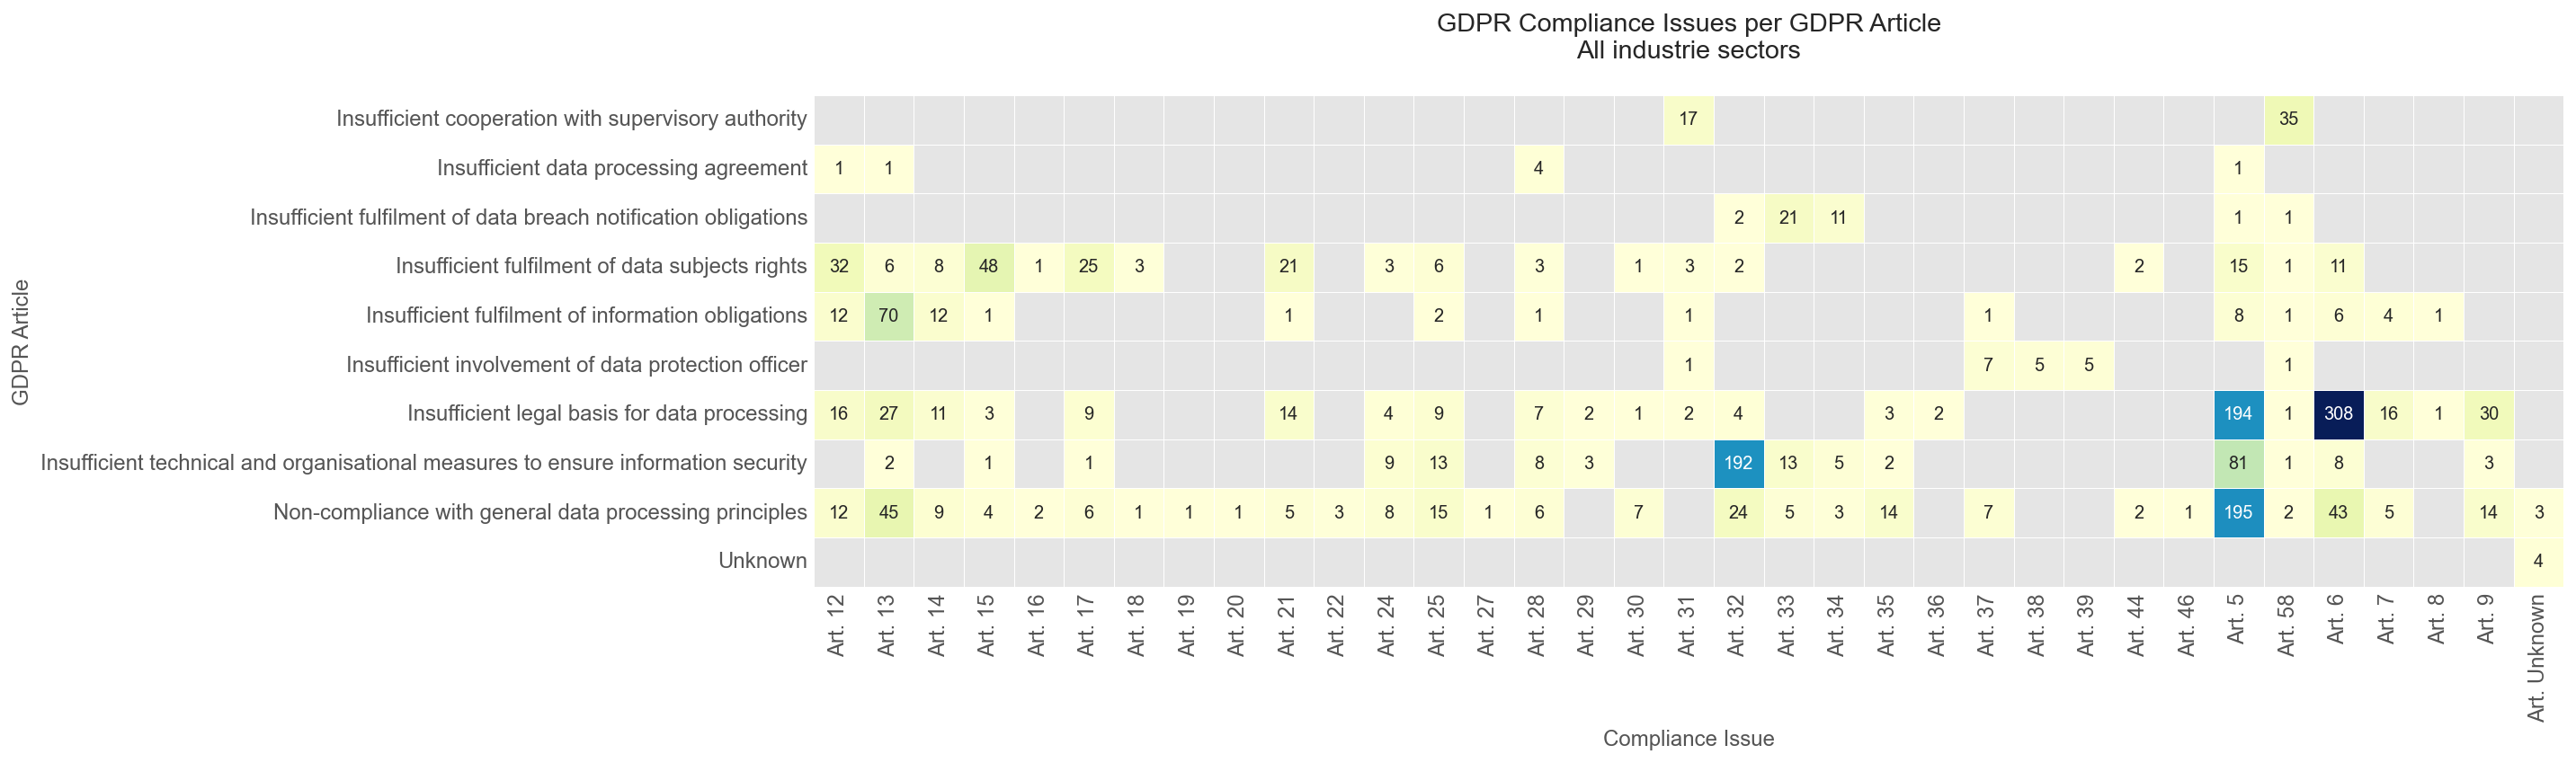

In [1479]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.style.use('ggplot')

plt.rcParams["figure.autolayout"] = True
ax = sns.heatmap(plot_df, annot=True, linewidths=.5, fmt=".0f", cbar=False, cmap="YlGnBu")
plt.title("GDPR Compliance Issues per GDPR Article\nAll industrie sectors\n")
plt.ylabel("GDPR Article")
plt.xlabel("Compliance Issue")
#plt.xticks(rotation=65)
plt.show();

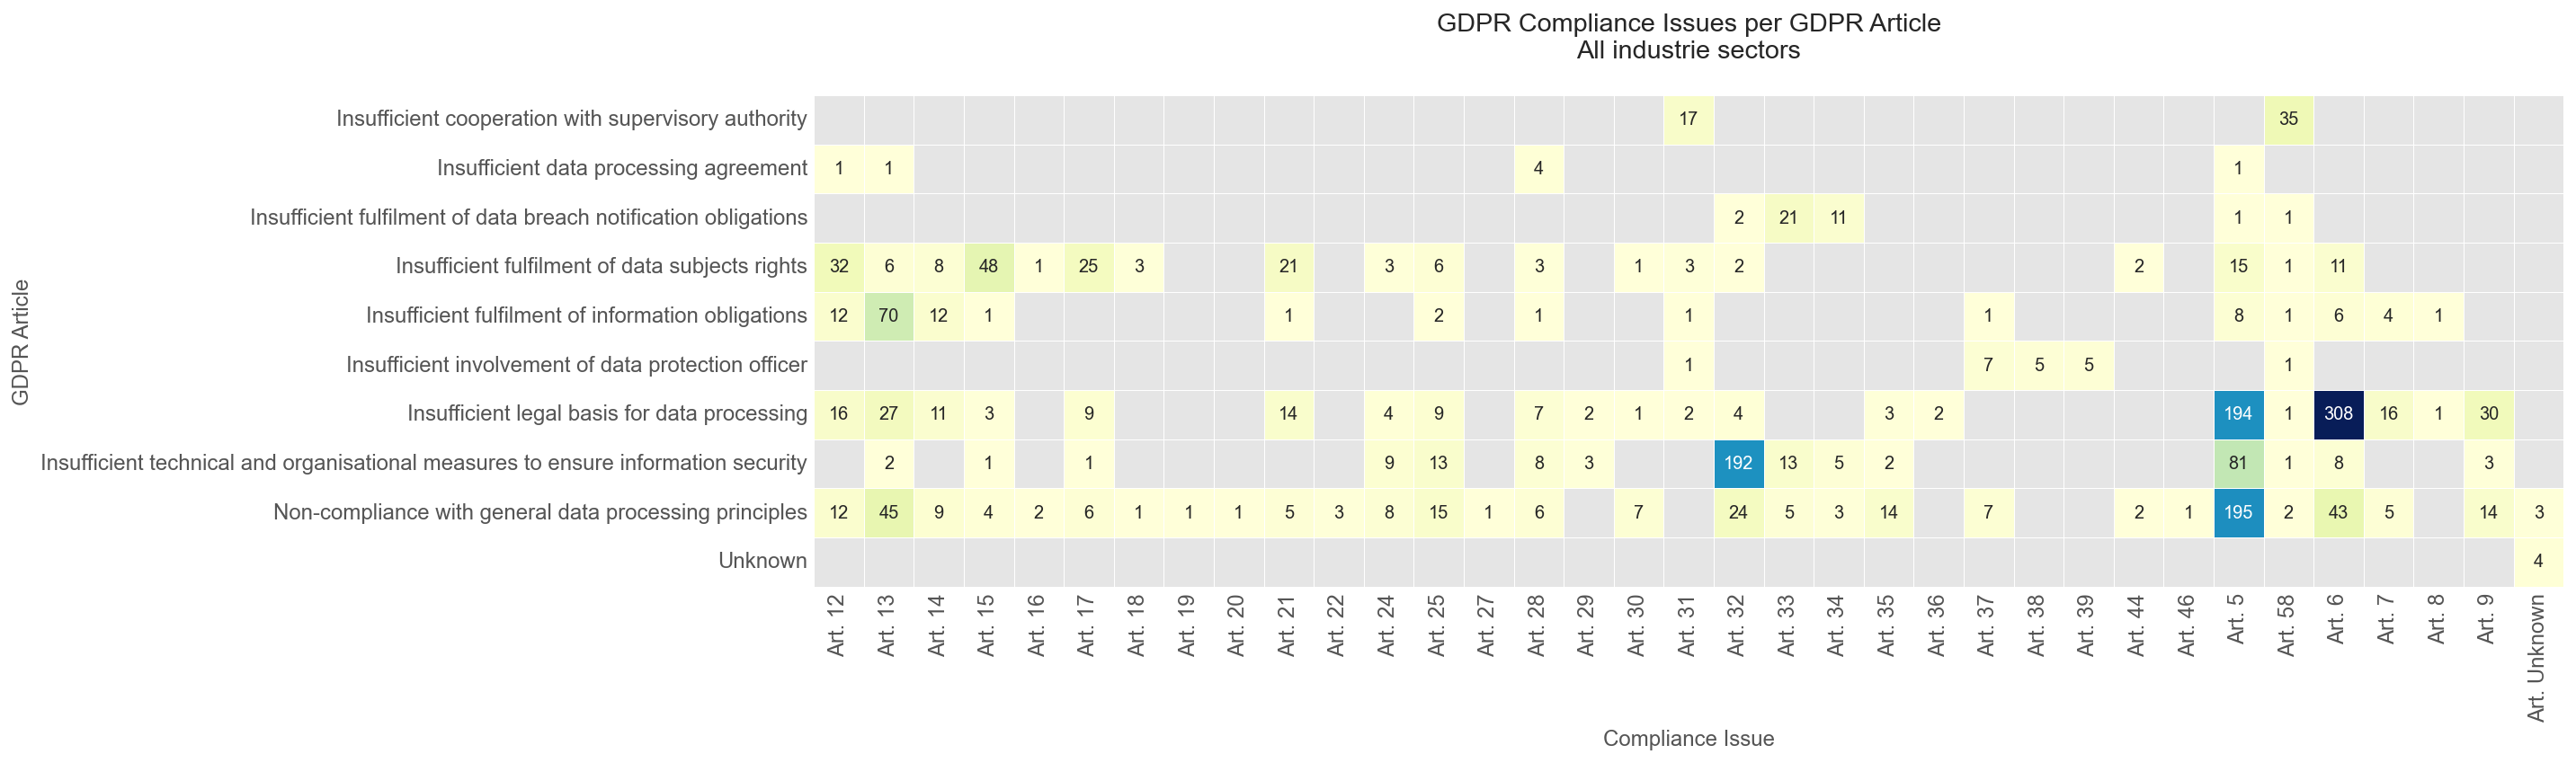

In [1480]:
plt.rcParams["figure.figsize"] = [20, 6]
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.style.use('ggplot')

plt.rcParams["figure.autolayout"] = True
ax = sns.heatmap(plot_df, annot=True, linewidths=.5, fmt=".0f", cbar=False, cmap="YlGnBu")
plt.title("GDPR Compliance Issues per GDPR Article\nAll industrie sectors\n")
plt.ylabel("GDPR Article")
plt.xlabel("Compliance Issue")
#plt.xticks(rotation=65)
plt.show();

#### which GDPR articles have been quoted the most per reported compliance issue in the healthcare sector?


In [1528]:
df_split['gdpr_article_short'].value_counts().to_frame("count")

,count
Art. 5,511
Art. 6,387
Art. 32,230
Art. 13,157
Art. 12,77
Art. 15,60
Art. 9,47
Art. 25,45
Art. 21,44
Art. 58,43


In [1531]:
df_split_filtered = df_split[df_split['sector'] == "Health Care"]

In [1672]:
# Configure text
text = (
    alt.Chart(df_split_filtered)
    .mark_text(color="white")
    .encode(
        x=alt.X("gdpr_article_short:O", title="GDPR Art."),
        y=alt.Y("violation_type:N", title="GDPR Compliance Issue"),
        text=alt.Text("count(gdpr_article_short)"),
    )
)

heatmap = (
    alt.Chart(df_split_filtered, title="")
    .mark_rect()
    .encode(
        x=alt.X("gdpr_article_short:O", title=""),
        y=alt.Y("violation_type:N", title=""),
        #y=alt.Y("sector:N", title="", axis=alt.Axis(labels=False)),
        #color=alt.Color("fine", legend=None, scale=alt.Scale(type="log", nice=True)),
        color=alt.Color("count(gdpr_article_short)", legend=None, scale=alt.Scale(scheme='greenblue')),
    )
)

combined = (
    (heatmap + text)
    .properties(title="", width=900, height=300)
    .configure_legend(labelFontSize=10)
    .configure_view(strokeWidth=0)
    #.configure(background="#F0F0F0")
    .configure_axis(labelFontSize=12,
    titleFontSize=12)
).configure_axis(
        labelFontSize=11, 
        titleFontSize=14, 
        labelLimit=400, 
)  .configure_axisY(
        #titleAngle=0,
        #titleY=-10,
        titleX=-420,
        # labelPadding=160,
        # labelAlign='left'
    )

combined

alt.LayerChart(...)

In [1674]:
# Configure text
text = (
    alt.Chart(df_split_filtered)
    .mark_text(color="white")
    .encode(
        x=alt.X("gdpr_article_short:O", title=""),
        y=alt.Y("violation_type:N", title=""),
        text=alt.Text("count(gdpr_article_short)"),
    )
)

heatmap = (
    alt.Chart(df_split_filtered, title="")
    .mark_rect()
    .encode(
        x=alt.X("gdpr_article_short:O", title=""),
        y=alt.Y("violation_type:N", title=""),
        #y=alt.Y("sector:N", title="", axis=alt.Axis(labels=False)),
        #color=alt.Color("fine", legend=None, scale=alt.Scale(type="log", nice=True)),
        color=alt.Color("count(gdpr_article_short)", legend=None, scale=alt.Scale(scheme='greenblue')),
    )
).properties(width=650, height=280)


(heatmap + text | test).configure_view(
        # no strokes around the bars
        strokeWidth=0
    ).configure_axis(
        labelFontSize=11, 
        titleFontSize=11, 
        labelLimit=400,
        grid=False, 
    ).configure_concat(
    spacing=5
    )

alt.HConcatChart(...)

In [ ]:
.configure_axis(
        labelFontSize=11, 
        titleFontSize=14, 
        labelLimit=400, 
        grid=False, 
        domain=False,
    )

#### Extra: Check Correlation for Quoted GDPR Articles

In [1481]:
# Group features
numerical_features = df_split.select_dtypes(include=[np.number]).columns.tolist()
df_split_num = df_split[numerical_features]

In [1482]:
# Pearson's r cannot be used, because the varibales are not normally distributed
corr_df = df_split_num.corr(method='spearman')
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,fine,decision_year,fine_cat,fine_cat2,country_label,violation_type_label,sector_label,gdp,gdp_cat,cpi_score,cpi_score_cat,population,population_cat,gdpr_article_short_label
fine,1.00,0.10,1.00,0.99,0.03,0.16,0.05,0.26,0.26,0.24,0.24,0.14,0.14,-0.00
decision_year,0.10,1.00,0.10,0.10,0.14,0.11,0.01,0.14,0.14,0.05,0.10,0.08,0.05,-0.05
fine_cat,1.00,0.10,1.00,0.99,0.03,0.16,0.05,0.26,0.26,0.24,0.24,0.14,0.14,-0.00
fine_cat2,0.99,0.10,0.99,1.00,0.03,0.16,0.05,0.25,0.25,0.26,0.25,0.12,0.12,-0.00
country_label,0.03,0.14,0.03,0.03,1.00,0.01,-0.03,0.23,0.23,0.15,0.07,0.20,0.20,0.09
violation_type_label,0.16,0.11,0.16,0.16,0.01,1.00,-0.05,0.06,0.06,-0.00,-0.02,0.04,0.04,0.10
sector_label,0.05,0.01,0.05,0.05,-0.03,-0.05,1.00,0.02,0.02,0.01,0.01,0.01,0.01,-0.03
gdp,0.26,0.14,0.26,0.25,0.23,0.06,0.02,1.00,1.00,0.11,0.11,0.92,0.91,0.05
gdp_cat,0.26,0.14,0.26,0.25,0.23,0.06,0.02,1.00,1.00,0.11,0.11,0.92,0.92,0.05
cpi_score,0.24,0.05,0.24,0.26,0.15,-0.00,0.01,0.11,0.11,1.00,0.97,-0.16,-0.15,0.03


## Answer Hypothesis (Advanced Questions)

### **A higher GDP could lead to more reported cases**
because a higher GDP could mean more companies in the country

#### Prepare DataFrame

In [1483]:
df_ada_grouped = df.groupby(['country','iso3'])['fine','gdp','cpi_score','population'].agg({'fine':['sum','count','mean'],'gdp':'mean','cpi_score':'mean','population':'mean'}).reset_index()
#df_ada_grouped

In [1484]:
# flatten grouped dataframe
df_ada_grouped_flatten = df_ada_grouped.copy()
df_ada_grouped_flatten.columns = ['_'.join(i).rstrip('_') for i in df_ada_grouped_flatten.columns.values]
#df_ada_grouped_flatten

#### Check Distribution - "Outliers" Included

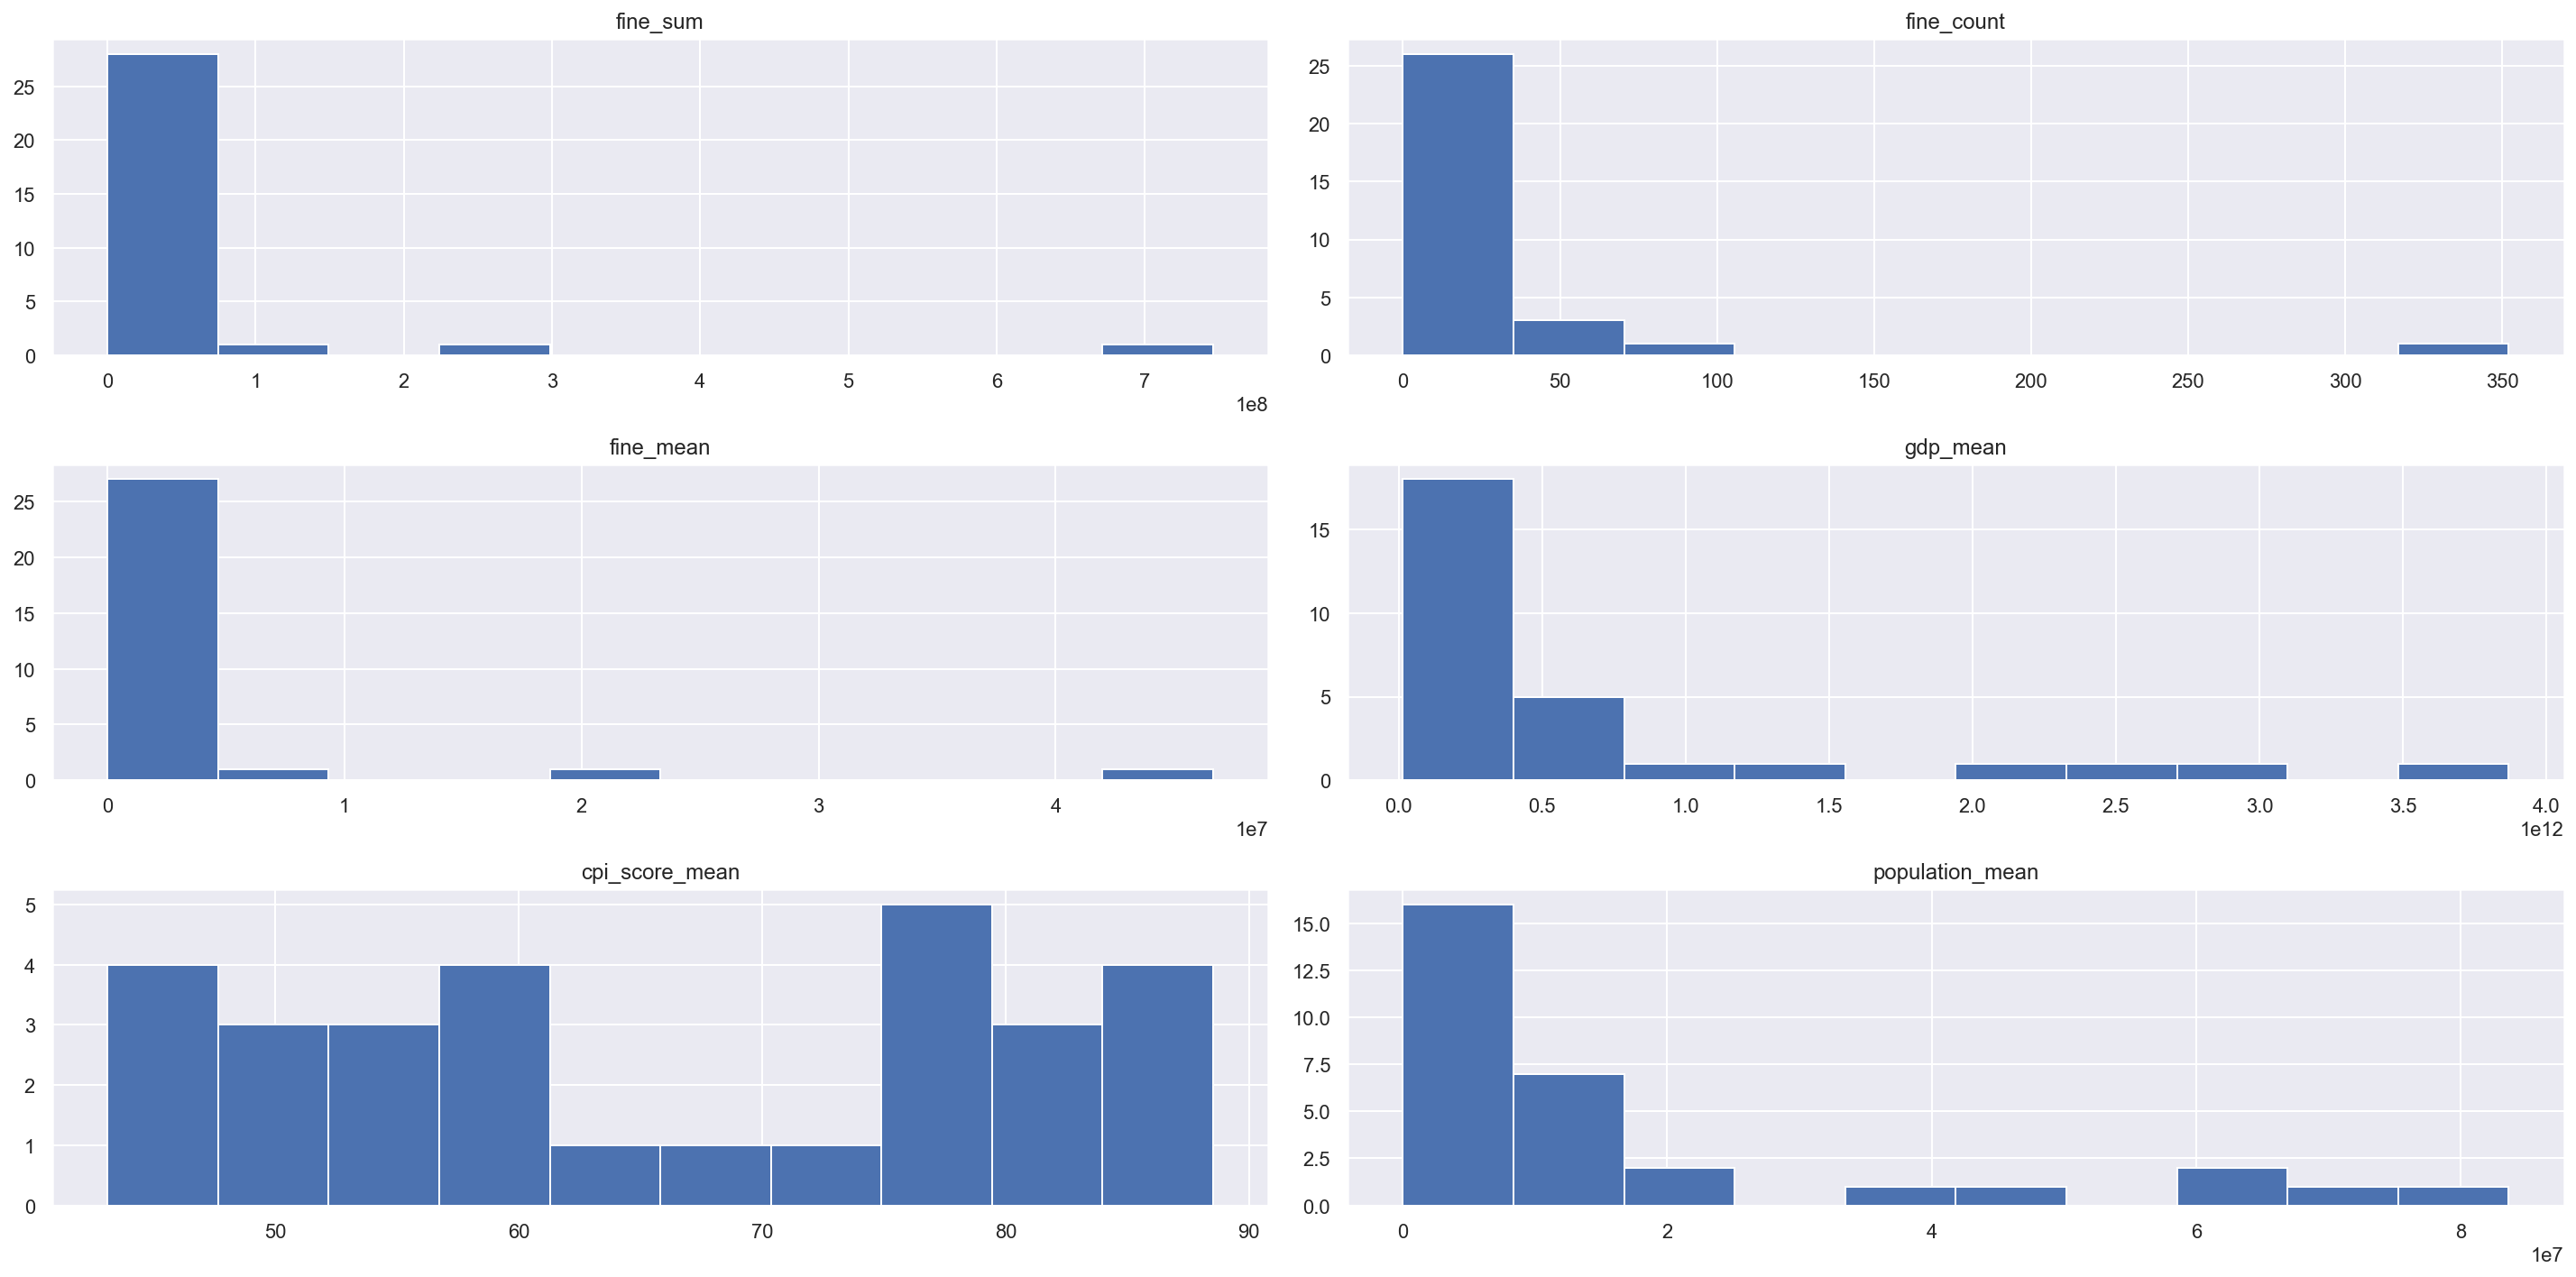

In [1485]:
# Check distribution
sns.set(rc={"figure.figsize":(20, 10)})
df_ada_grouped_flatten.hist();

- The aggregated values are not normally distributed. Therefore, **Spearmans'** correlation coefficient will be used for the correlation analysis.
- The aggregated values show outliers, especially for fine (sum), fine (count), fine (mean) and gdp (mean). Those outliers should be reviewed and addressed for an analysis where the outliers have been removed.

#### Check Correlations - "Outliers" Included

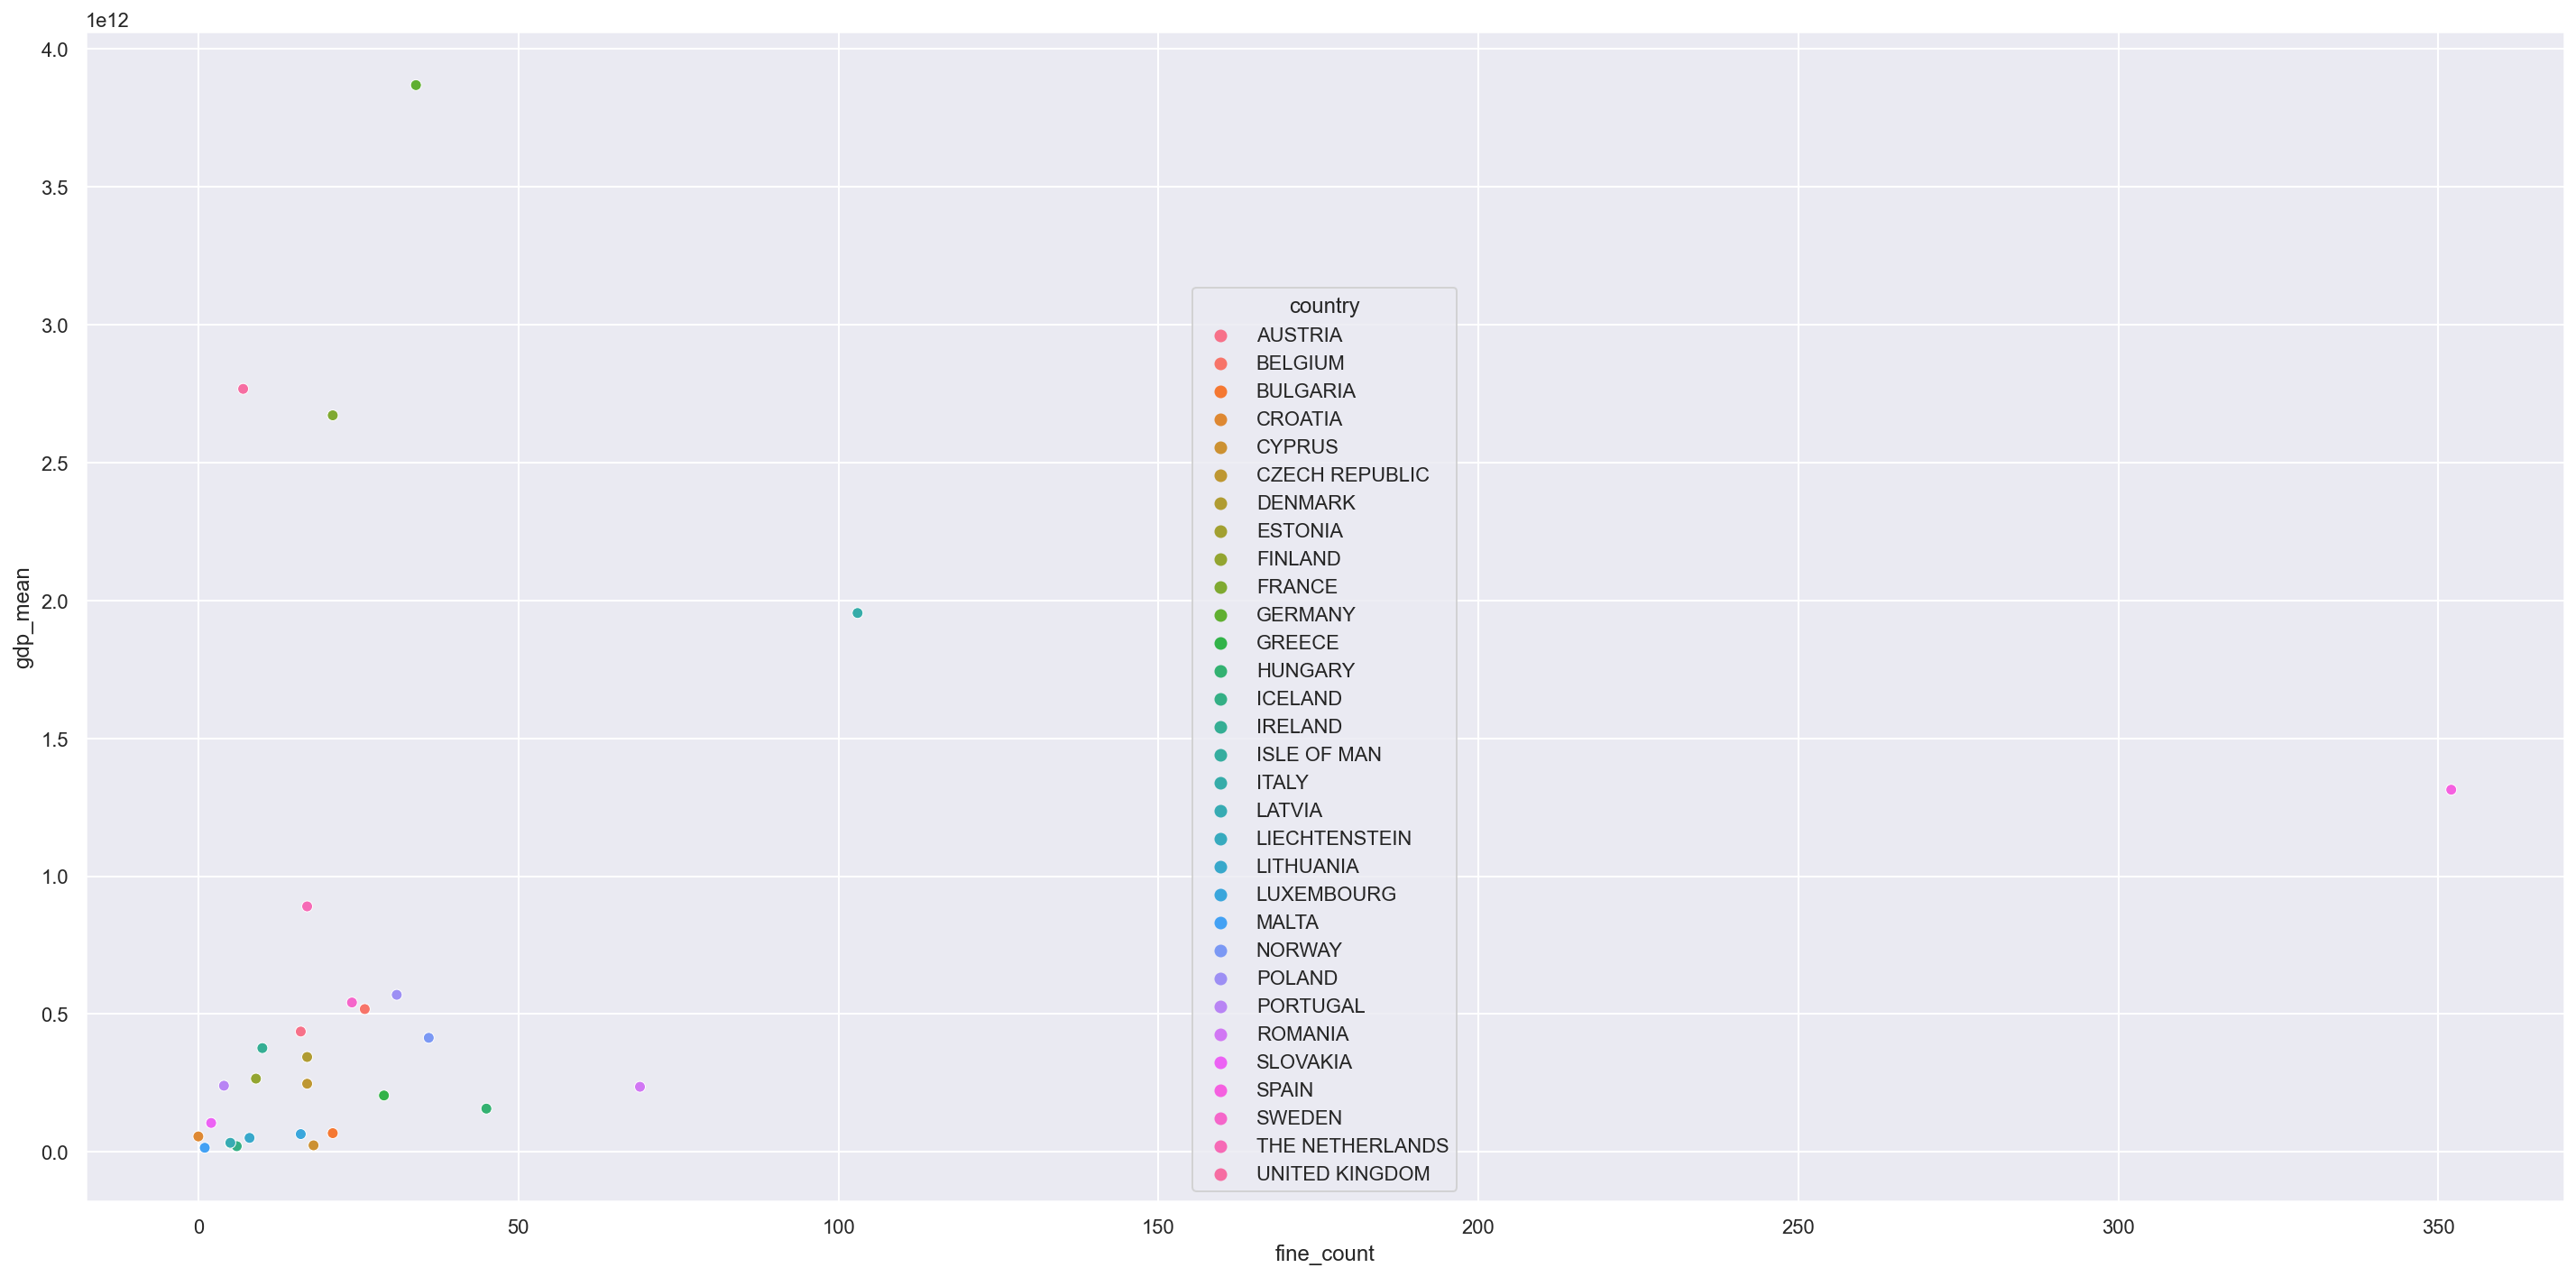

In [1486]:
# Checking correlation with "outliers"
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(data=df_ada_grouped_flatten, x="fine_count", y="gdp_mean", hue="country",);

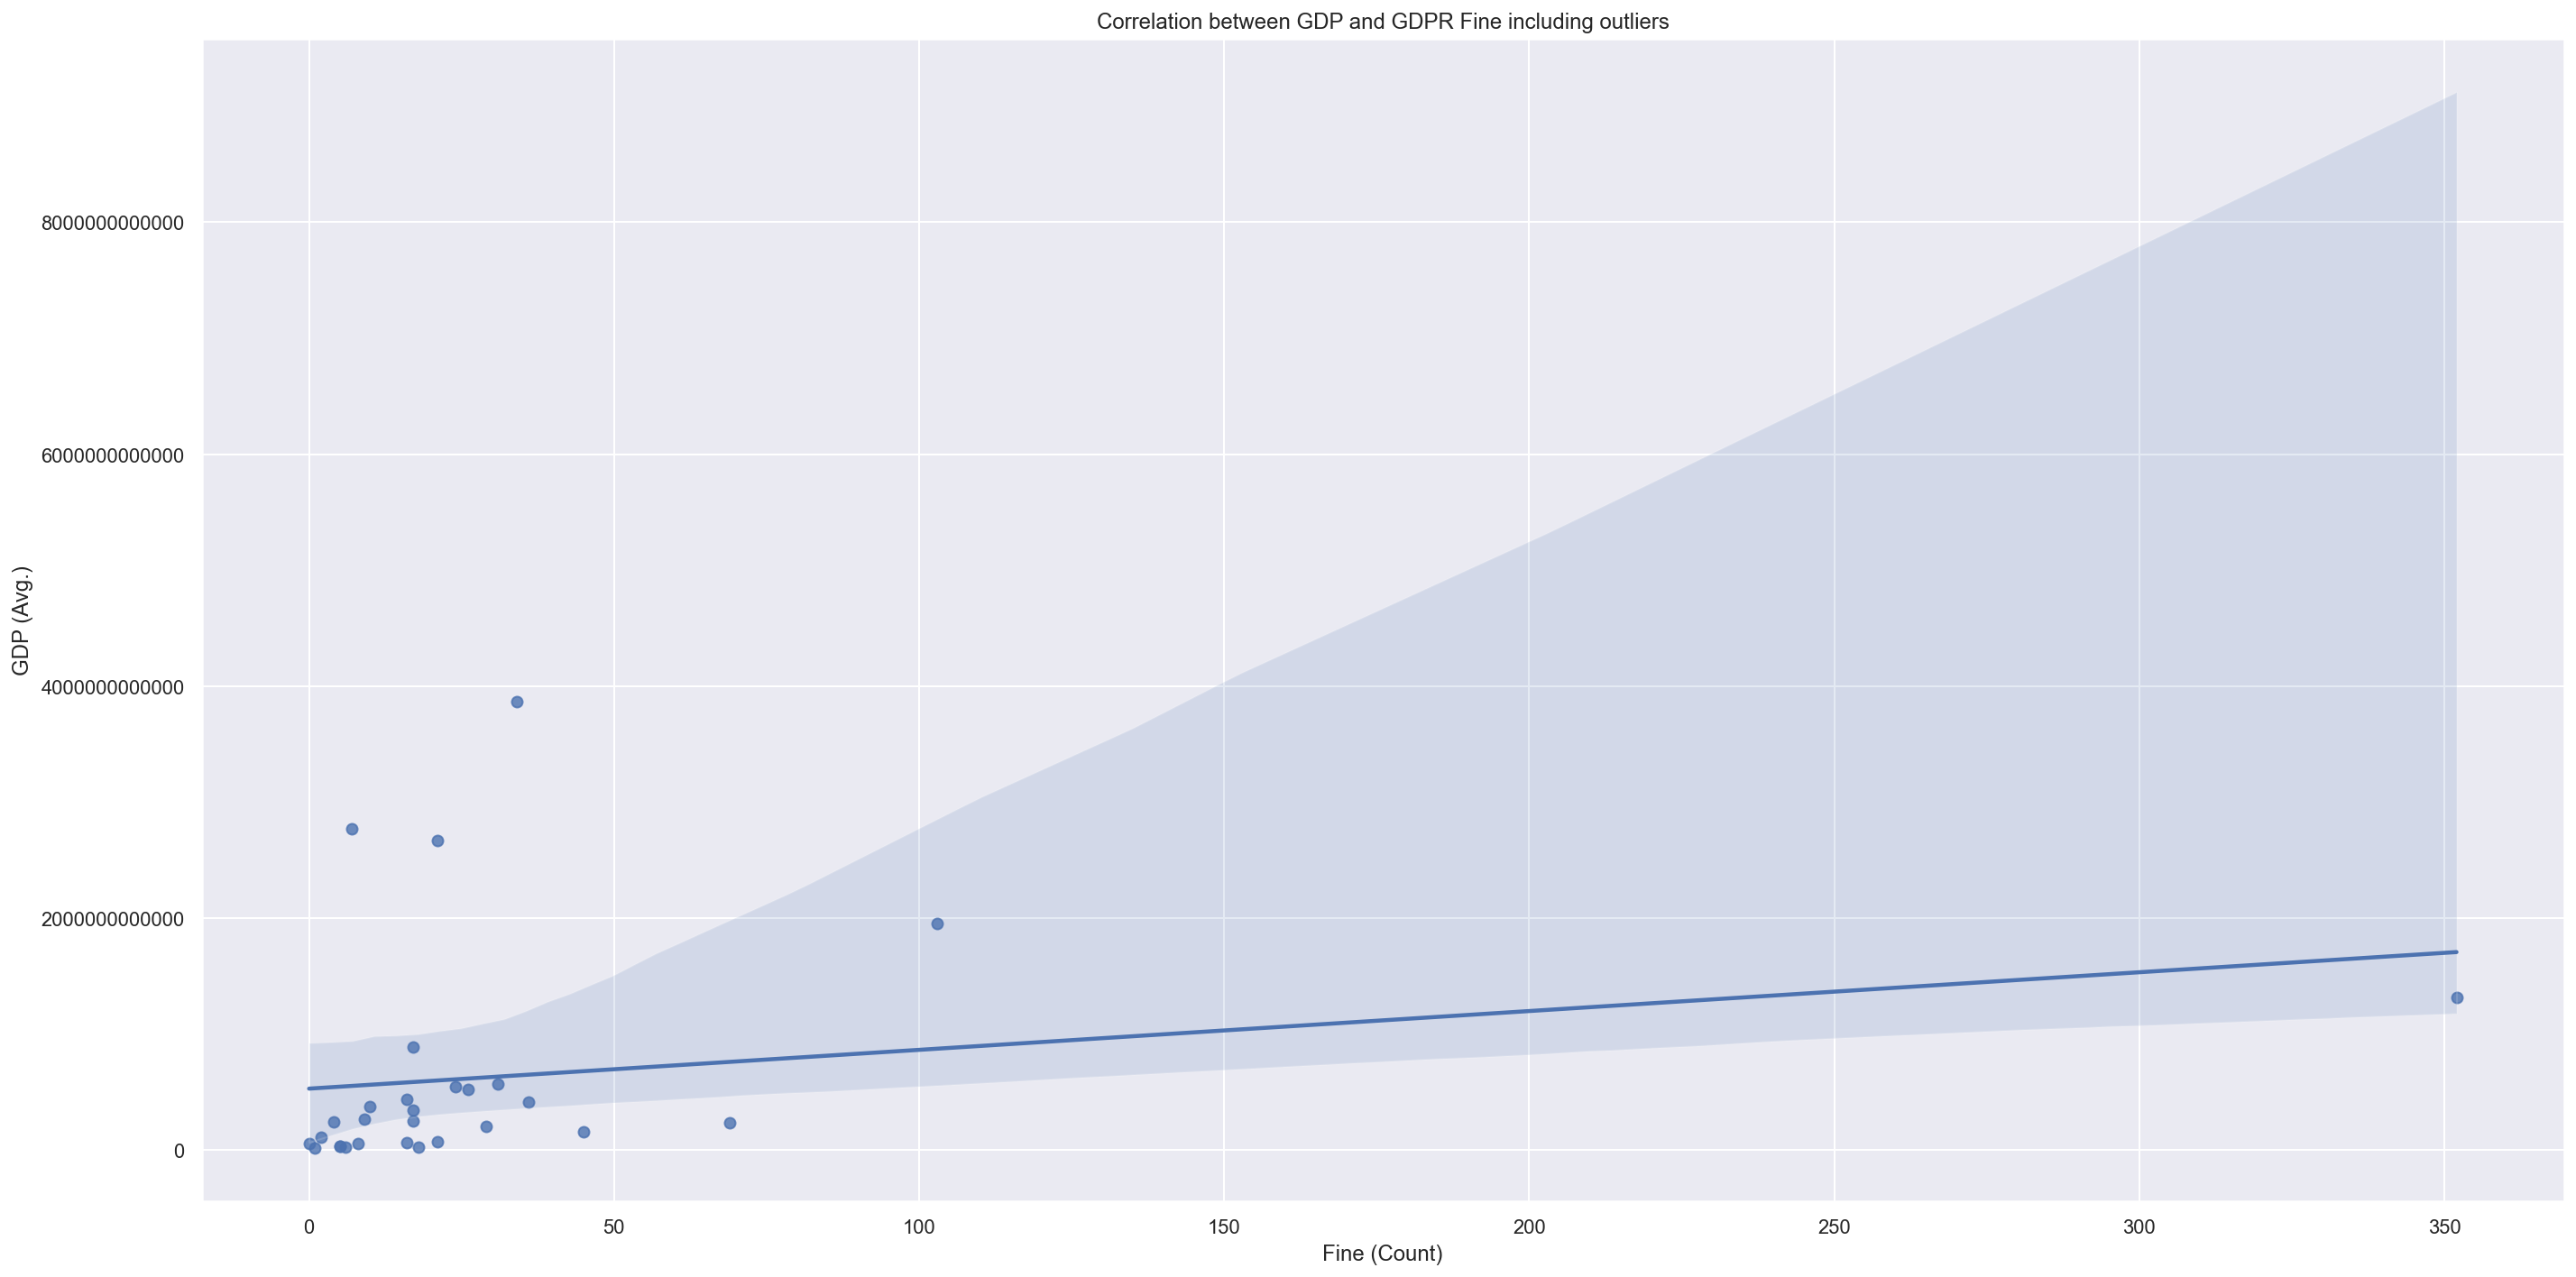

In [1487]:
# Checking correlation with "outliers" and trendline
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

chart = sns.regplot(data=df_ada_grouped_flatten, x="fine_count", y="gdp_mean");
chart.set(title='Correlation between GDP and GDPR Fine including outliers', xlabel='Fine (Count)', ylabel="GDP (Avg.)");

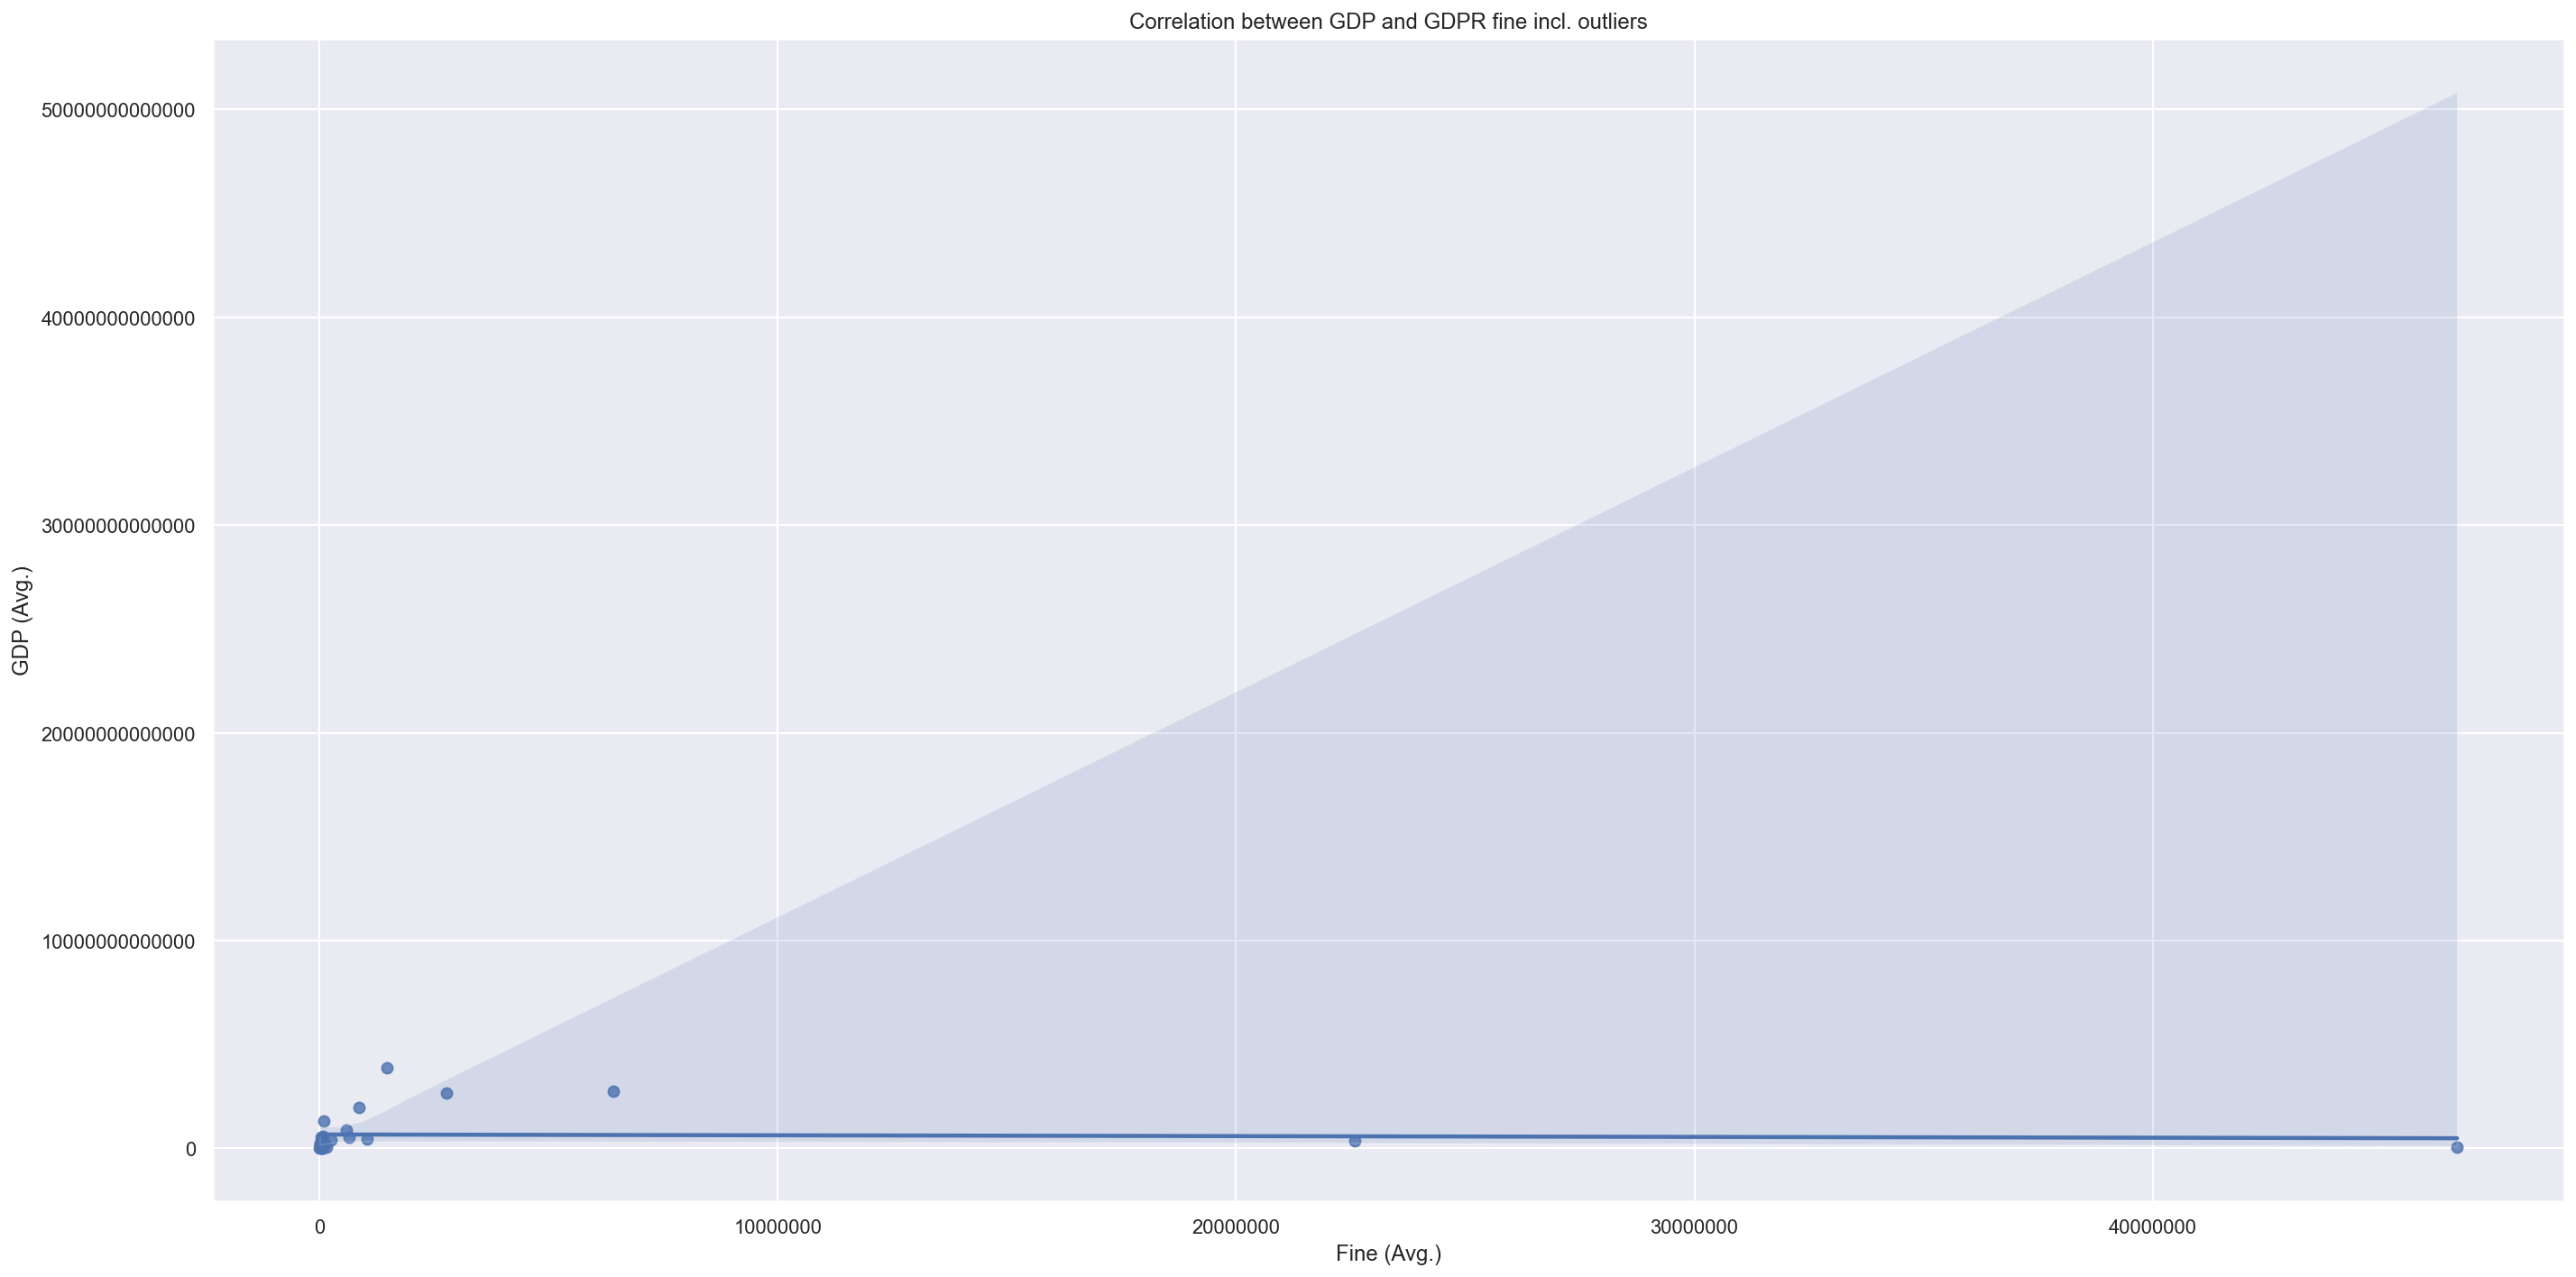

In [1488]:
# Checking correlation with "outliers" and trendline
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

chart = sns.regplot(data=df_ada_grouped_flatten, x="fine_mean", y="gdp_mean");
chart.set(title='Correlation between GDP and GDPR fine incl. outliers', xlabel='Fine (Avg.)', ylabel="GDP (Avg.)");

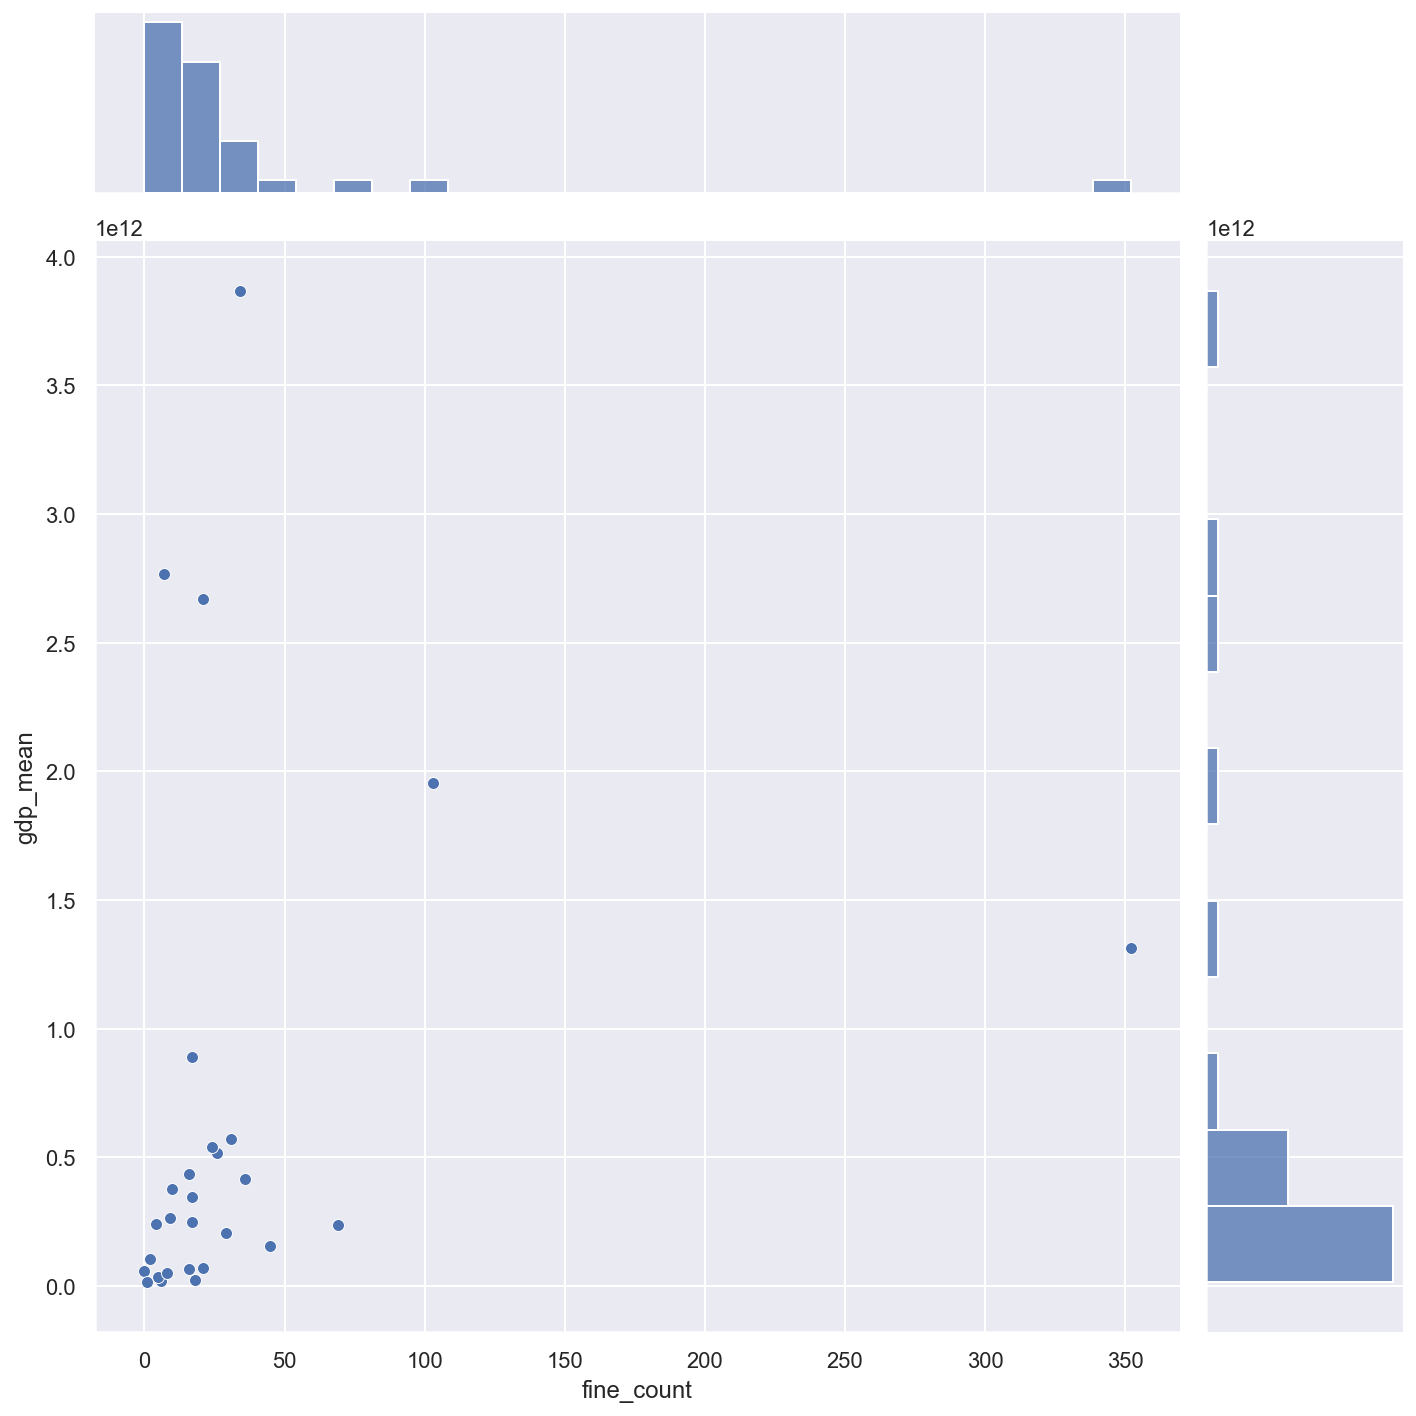

In [1489]:
# Checking correlation with "outliers" and distribution (histogram)
sns.jointplot(data=df_ada_grouped_flatten, x="fine_count", y="gdp_mean", height=10);

In [1490]:
# Calculate correlation coefficient with Spearman correlation coefficient, because we
# A) Assume a linear relationship, base from the frist scatter plots
# B) Know that the features are not normally distributed
corr_df = df_ada_grouped_flatten.corr(method='spearman')
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
fine_sum,1.00,0.62,0.91,0.70,0.37,0.56
fine_count,0.62,1.00,0.27,0.55,-0.07,0.67
fine_mean,0.91,0.27,1.00,0.59,0.47,0.42
gdp_mean,0.70,0.55,0.59,1.00,0.36,0.87
cpi_score_mean,0.37,-0.07,0.47,0.36,1.00,-0.03
population_mean,0.56,0.67,0.42,0.87,-0.03,1.00


#### Identify and Address "Outliers"

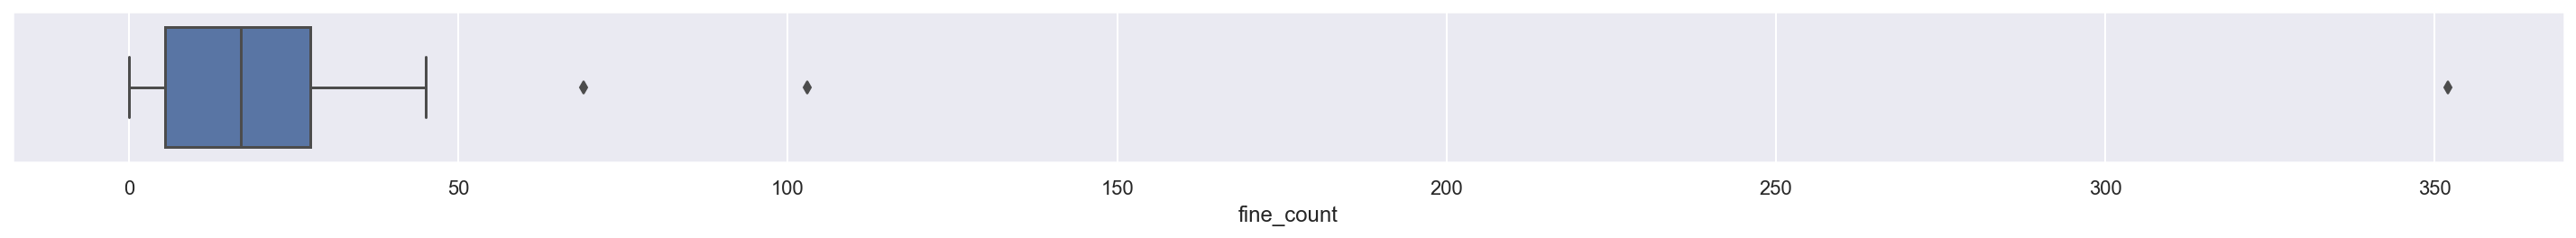

In [1491]:
# Identify and remove fine_count "outlier"
sns.set(rc={"figure.figsize":(20, 2)})
sns.boxplot(data=df_ada_grouped_flatten, x="fine_count");

In [1492]:
df_ada_grouped_flatten[df_ada_grouped_flatten['fine_count'] > 50].round(0).sort_values('fine_count', ascending=False)

,country,iso3,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
27,SPAIN,ESP,"36,744,810.0",352,"104,389.0","1,313,350,111,812.0",61.0,"46,761,369.0"
16,ITALY,ITA,"89,804,096.0",103,"871,884.0","1,953,969,083,382.0",50.0,"60,451,743.0"
25,ROMANIA,ROU,"726,950.0",69,"10,536.0","236,274,041,231.0",44.0,"19,233,379.0"


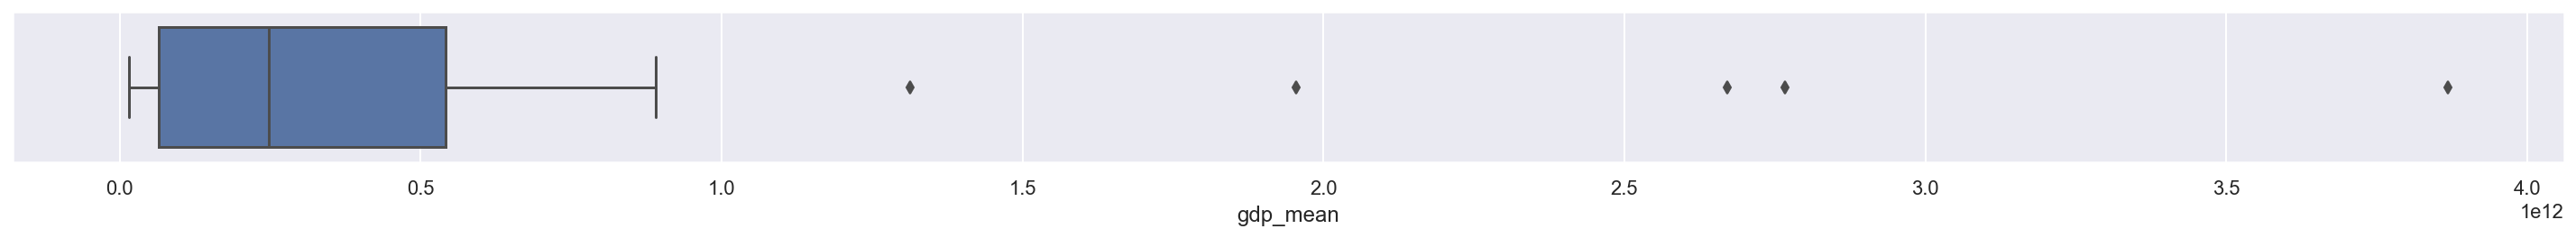

In [1493]:
# Identify and remove gdp_mean "outlier"
sns.set(rc={"figure.figsize":(20, 2)})
sns.boxplot(data=df_ada_grouped_flatten, x="gdp_mean");

In [1494]:
df_ada_grouped_flatten[df_ada_grouped_flatten['gdp_mean'] > 1000000000000].round(0).sort_values('gdp_mean', ascending=False)


,country,iso3,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
10,GERMANY,DEU,"50,159,583.0",34,"1,475,282.0","3,868,062,946,294.0",80.0,"83,599,261.0"
30,UNITED KINGDOM,GBR,"44,846,800.0",7,"6,406,686.0","2,766,634,009,222.0",77.0,"68,012,005.0"
9,FRANCE,FRA,"58,194,300.0",21,"2,771,157.0","2,670,778,673,739.0",69.0,"65,317,999.0"
16,ITALY,ITA,"89,804,096.0",103,"871,884.0","1,953,969,083,382.0",50.0,"60,451,743.0"
27,SPAIN,ESP,"36,744,810.0",352,"104,389.0","1,313,350,111,812.0",61.0,"46,761,369.0"


In [1495]:
# Remove fine_count "outliers"
df_ada_grouped_flatten_adjusted = df_ada_grouped_flatten[df_ada_grouped_flatten['fine_count'] < 50]
#df_ada_grouped_flatten_adjusted = df_ada_grouped_flatten_adjusted[df_ada_grouped_flatten_adjusted['gdp_mean'] < 1000000000000]

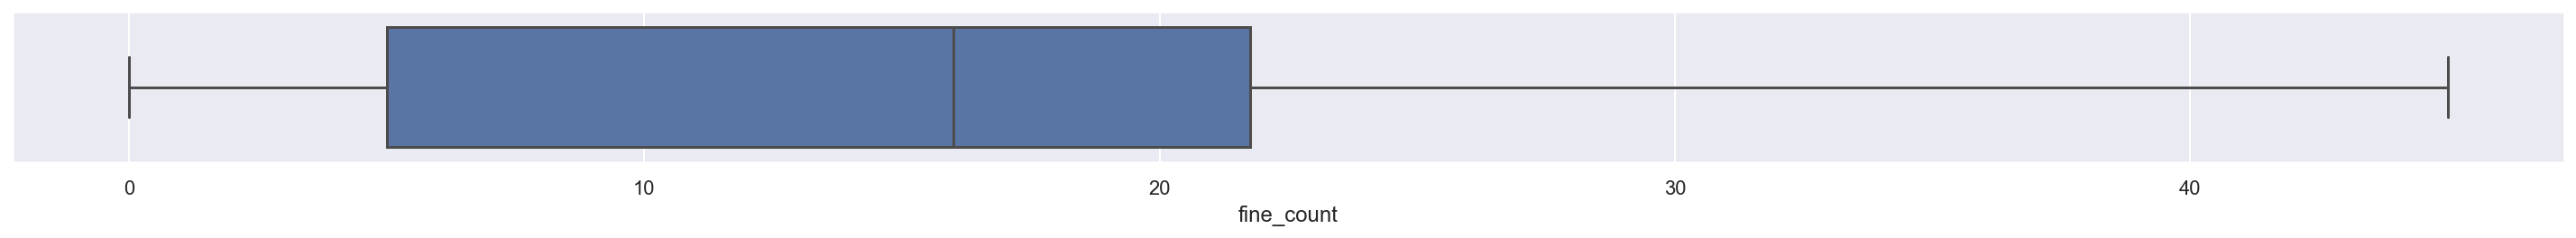

In [1496]:
sns.set(rc={"figure.figsize":(20, 2)})
sns.boxplot(data=df_ada_grouped_flatten_adjusted, x="fine_count");

#### Check Correlation "Outliers" Removed

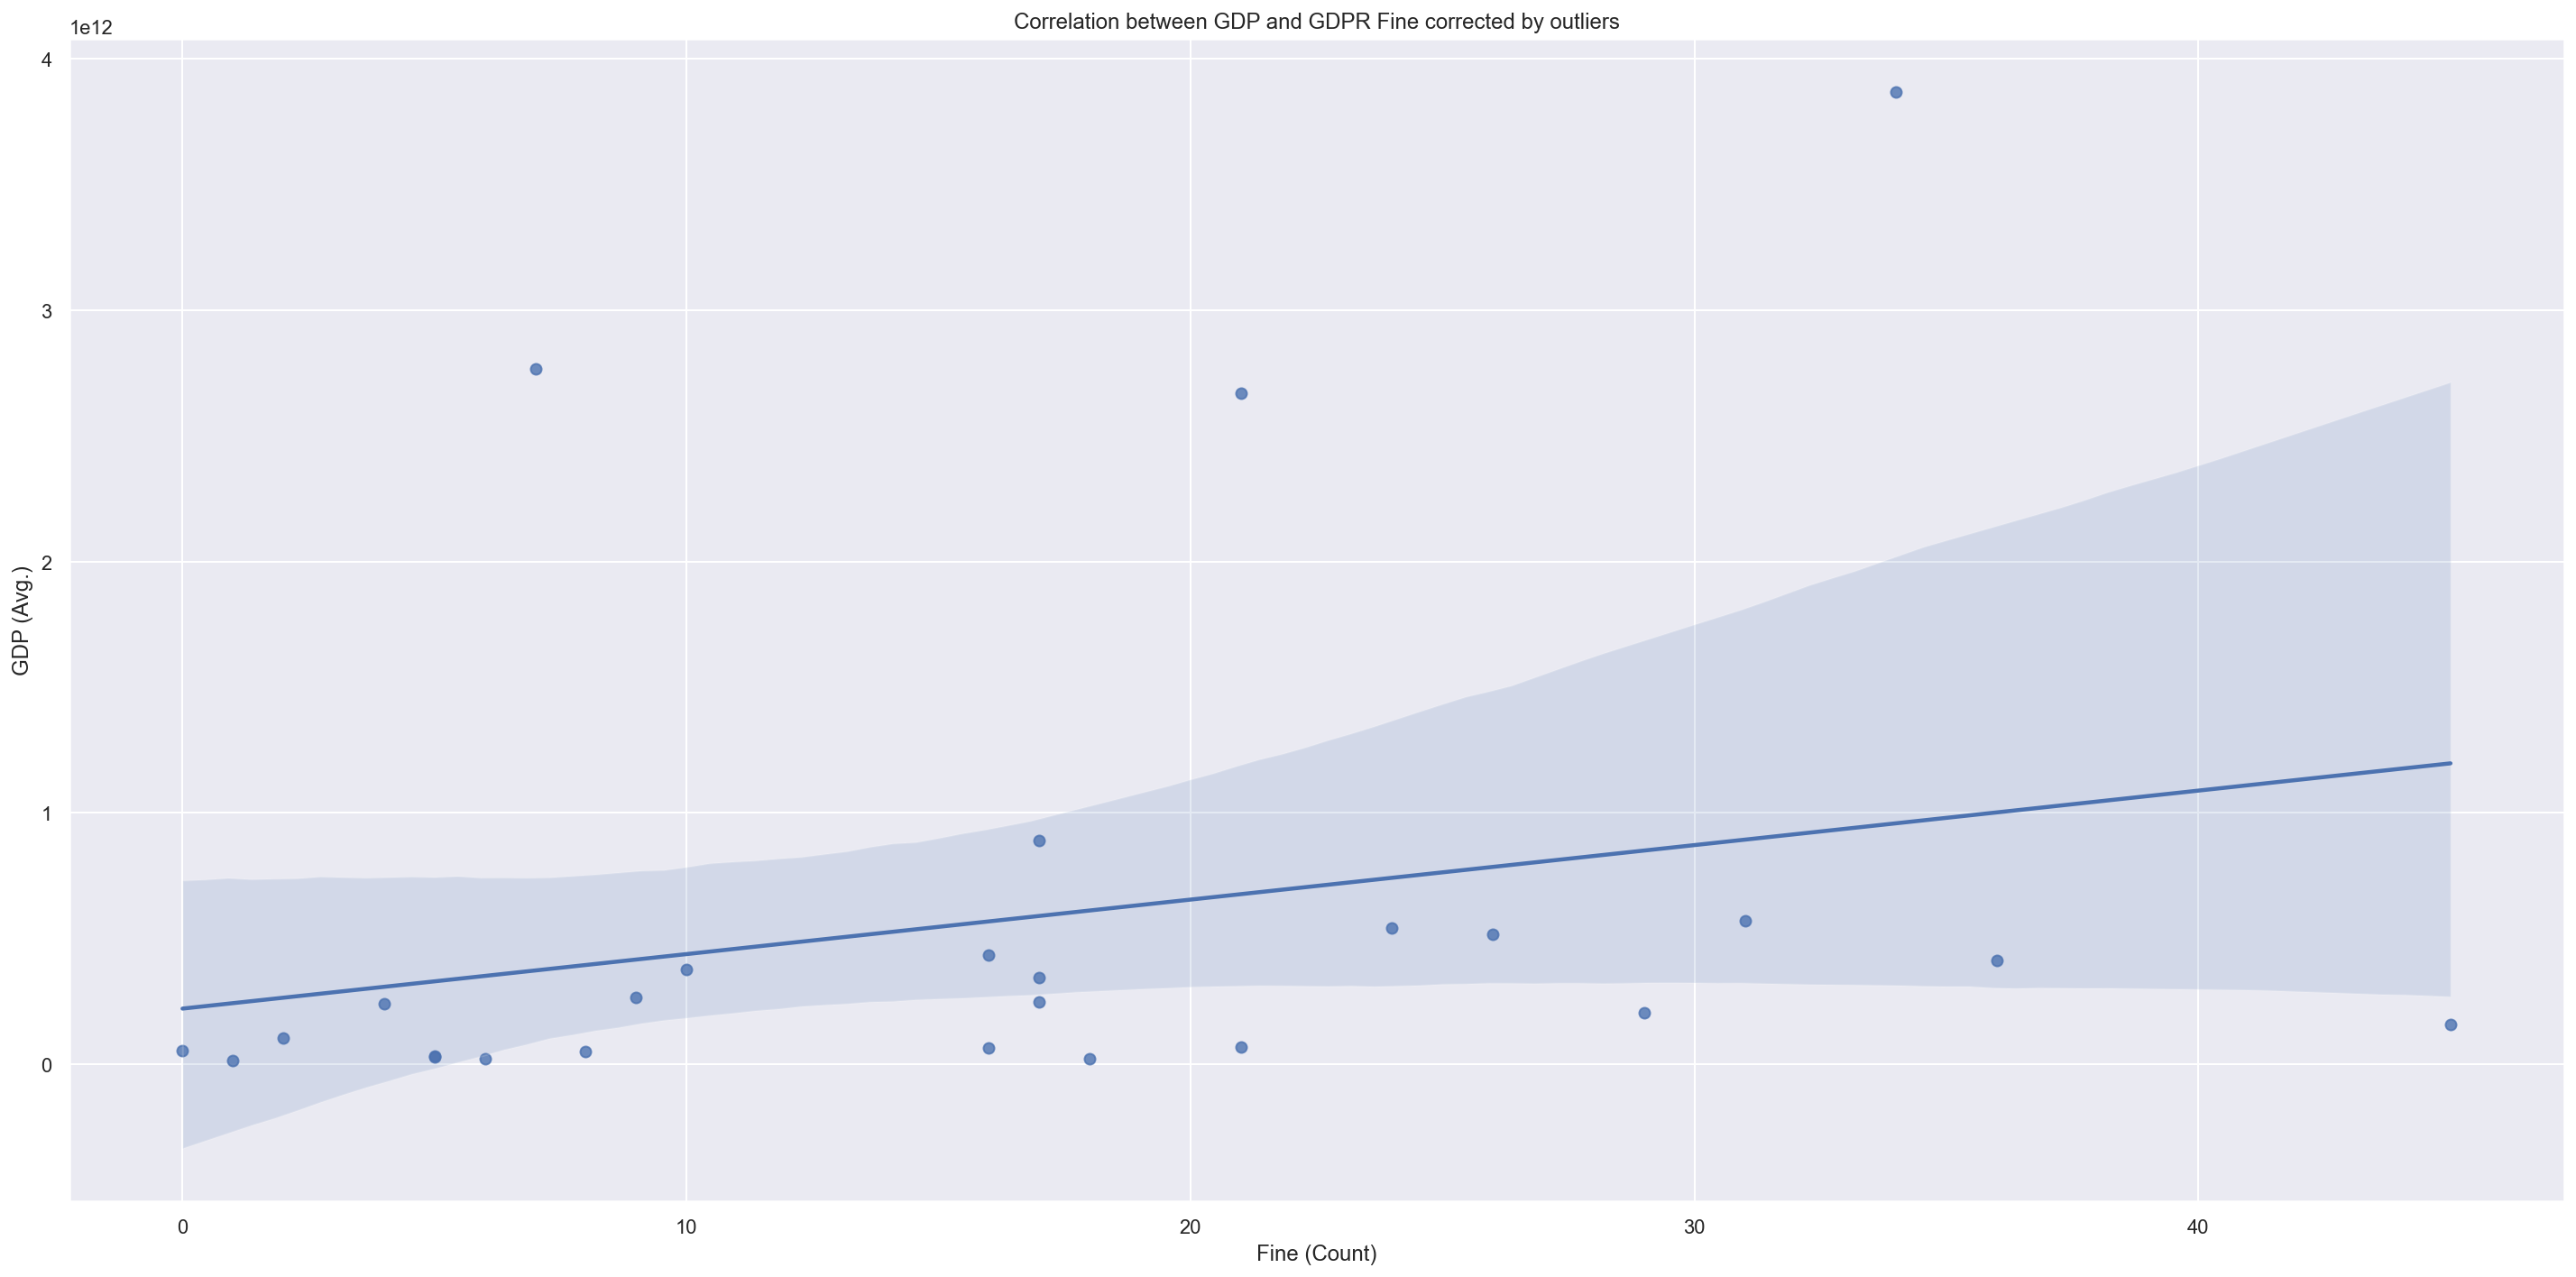

In [1497]:
plt.figure(figsize=(20, 10))
chart = sns.regplot(data=df_ada_grouped_flatten_adjusted, x="fine_count", y="gdp_mean");
chart.set(title='Correlation between GDP and GDPR Fine corrected by outliers', xlabel='Fine (Count)', ylabel="GDP (Avg.)");

In [1498]:
# Pearson's r cannot be used, because the varibales are not normally distributed
corr_df = df_ada_grouped_flatten_adjusted.corr(method='spearman')
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
fine_sum,1.00,0.63,0.92,0.68,0.47,0.53
fine_count,0.63,1.00,0.32,0.53,0.12,0.61
fine_mean,0.92,0.32,1.00,0.58,0.50,0.43
gdp_mean,0.68,0.53,0.58,1.00,0.46,0.87
cpi_score_mean,0.47,0.12,0.50,0.46,1.00,0.09
population_mean,0.53,0.61,0.43,0.87,0.09,1.00


#### **Conclusion**

...

### **A higher CPI could lead to more reported cases**
because the public sector is potentially less influenced (corrupted) by the companies


#### Prepare Dataframe

**What Is the Corruption Perceptions Index (CPI)?**
The term Corruption Perceptions Index (CPI) refers to an index that scores countries on the perceived levels of government corruption by country. Scores range from zero to 100, with **zero indicating high levels of corruption and 100 indicating low levels**. The CPI is published annually by Transparency International, an organization that seeks to stop bribery, fraud, and other forms of public sector corruption.

https://www.investopedia.com/terms/c/corruption-perception-index.asp

In [1499]:
df_ada_grouped = df.groupby(['country','iso3'])['fine','gdp','cpi_score','population'].agg({'fine':['sum','count','mean'],'gdp':'mean','cpi_score':'mean','population':'mean'}).reset_index()
#df_ada_grouped

In [1500]:
# flatten grouped dataframe
df_ada_grouped_flatten = df_ada_grouped.copy()
df_ada_grouped_flatten.columns = ['_'.join(i).rstrip('_') for i in df_ada_grouped_flatten.columns.values]
df_ada_grouped_flatten

,country,iso3,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
0,AUSTRIA,AUT,"16,774,550.0",16,"1,048,409.375","436,554,886,196.75",75.4375,"8,993,160.75"
1,BELGIUM,BEL,"1,033,000.0",26,"39,730.769230769234","518,081,667,022.38464",75.76923076923077,"11,592,162.384615384"
2,BULGARIA,BGR,"3,211,070.0",21,"152,908.09523809524","68,111,987,553.90476",43.095238095238095,"6,987,924.80952381"
3,CROATIA,HRV,0.0,0,NaN,"56,251,429,631.25",47.75,"4,086,475.0"
4,CYPRUS,CYP,"1,248,000.0",18,"69,333.33333333333","23,986,520,238.61111",58.5,"1,208,123.111111111"
5,CZECH REPUBLIC,CZE,"165,903.0",17,"9,759.0","247,337,324,518.4",55.0,"10,700,205.92"
6,DENMARK,DNK,"856,600.0",17,"50,388.23529411765","344,299,866,937.4706",88.52941176470588,"5,803,315.764705882"
7,ESTONIA,EST,"300,548.0",5,"60,109.6","30,650,285,472.0",75.0,"1,326,535.0"
8,FINLAND,FIN,"924,000.0",9,"102,666.66666666667","265,825,597,718.44446",86.33333333333333,"5,546,052.0"
9,FRANCE,FRA,"58,194,300.0",21,"2,771,157.1428571427","2,670,778,673,738.5713",69.47619047619048,"65,317,999.333333336"


#### Check Distributions - "Outliers" Included

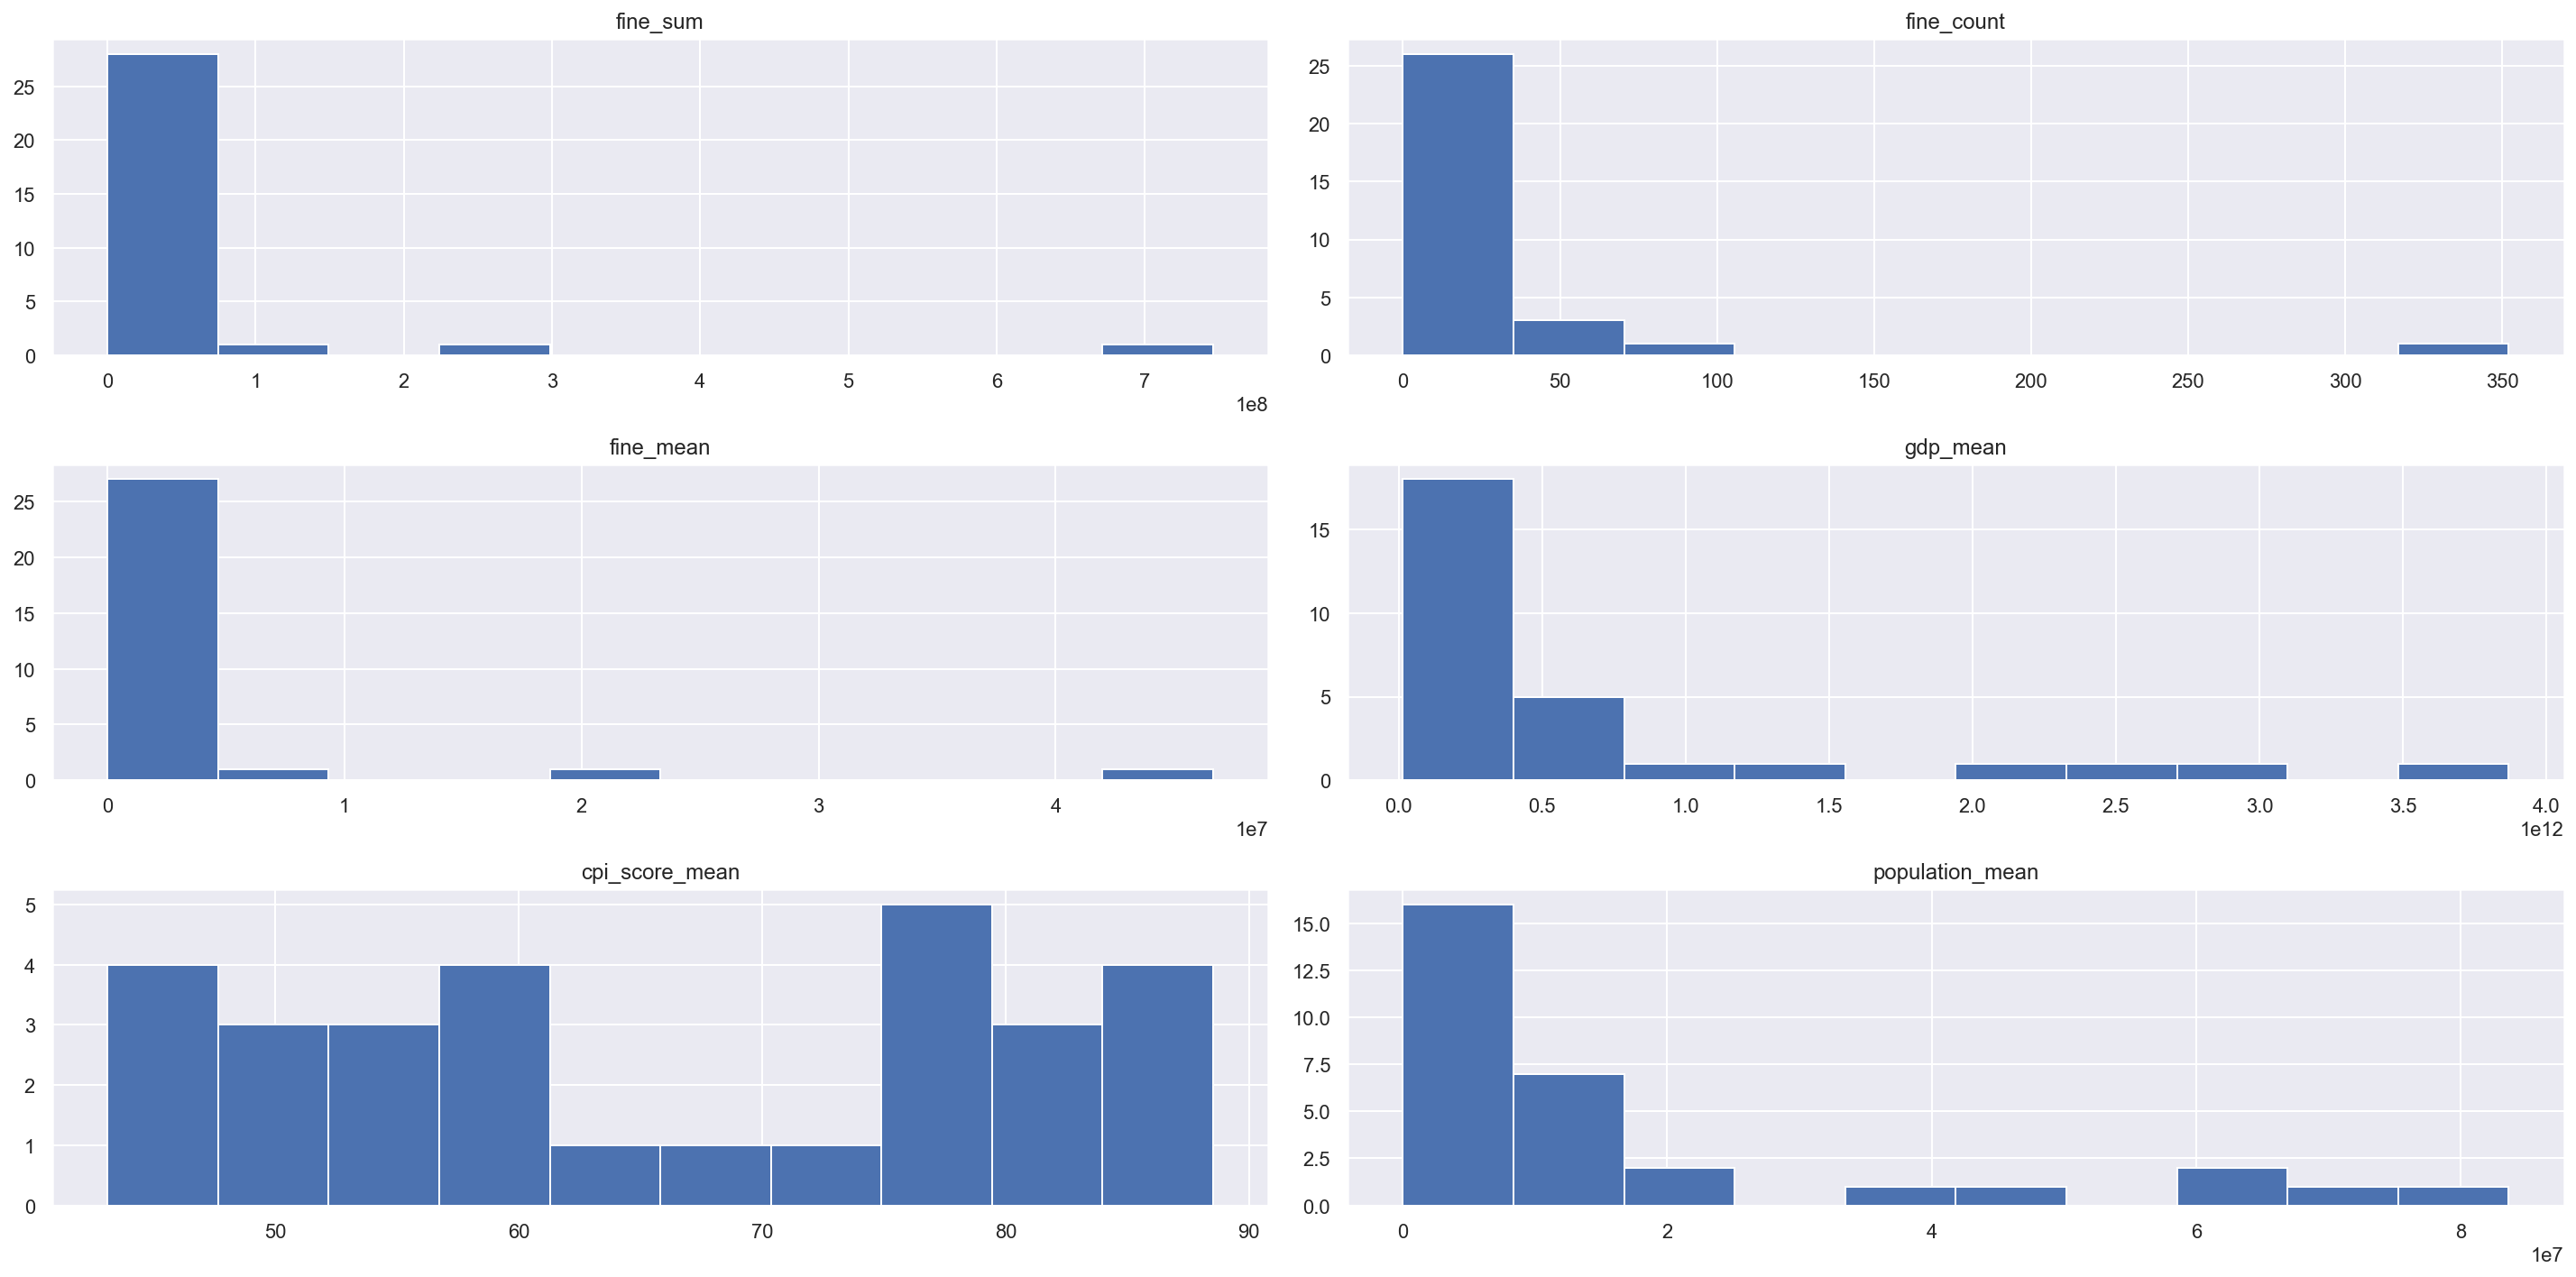

In [1501]:
# Check distribution
sns.set(rc={"figure.figsize":(20, 10)})
df_ada_grouped_flatten.hist();

#### Check Correlations - "Outliers" Included

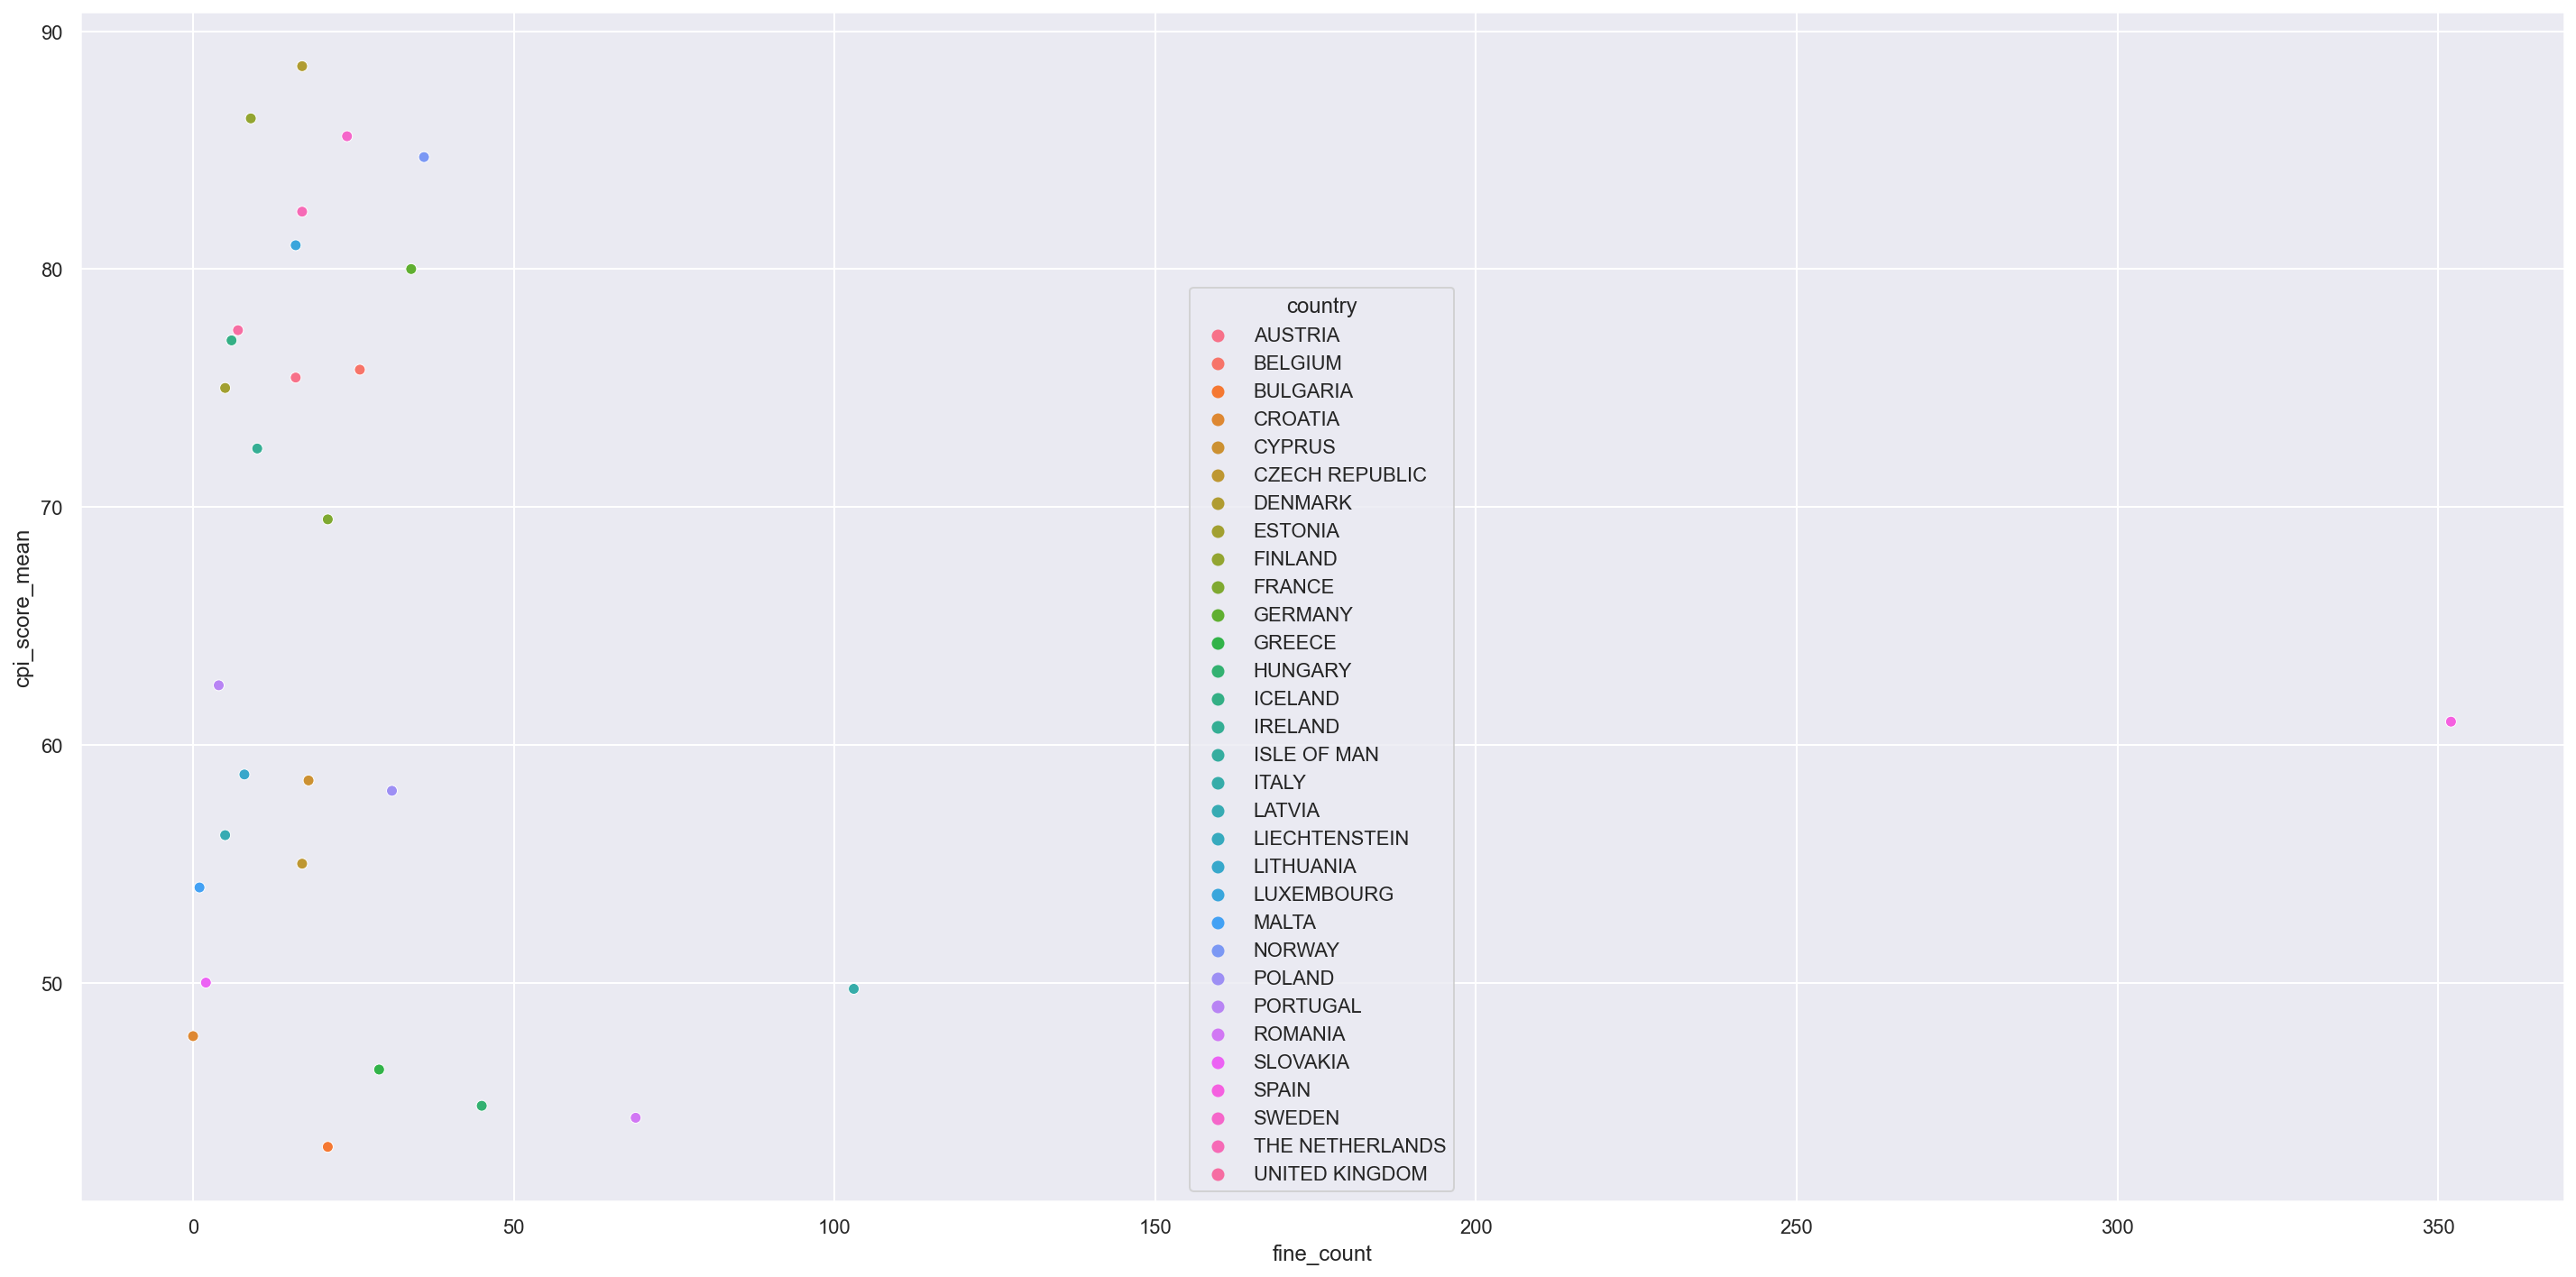

In [1502]:
# Checking correlation with "outliers"
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(data=df_ada_grouped_flatten, x="fine_count", y="cpi_score_mean", hue="country",);

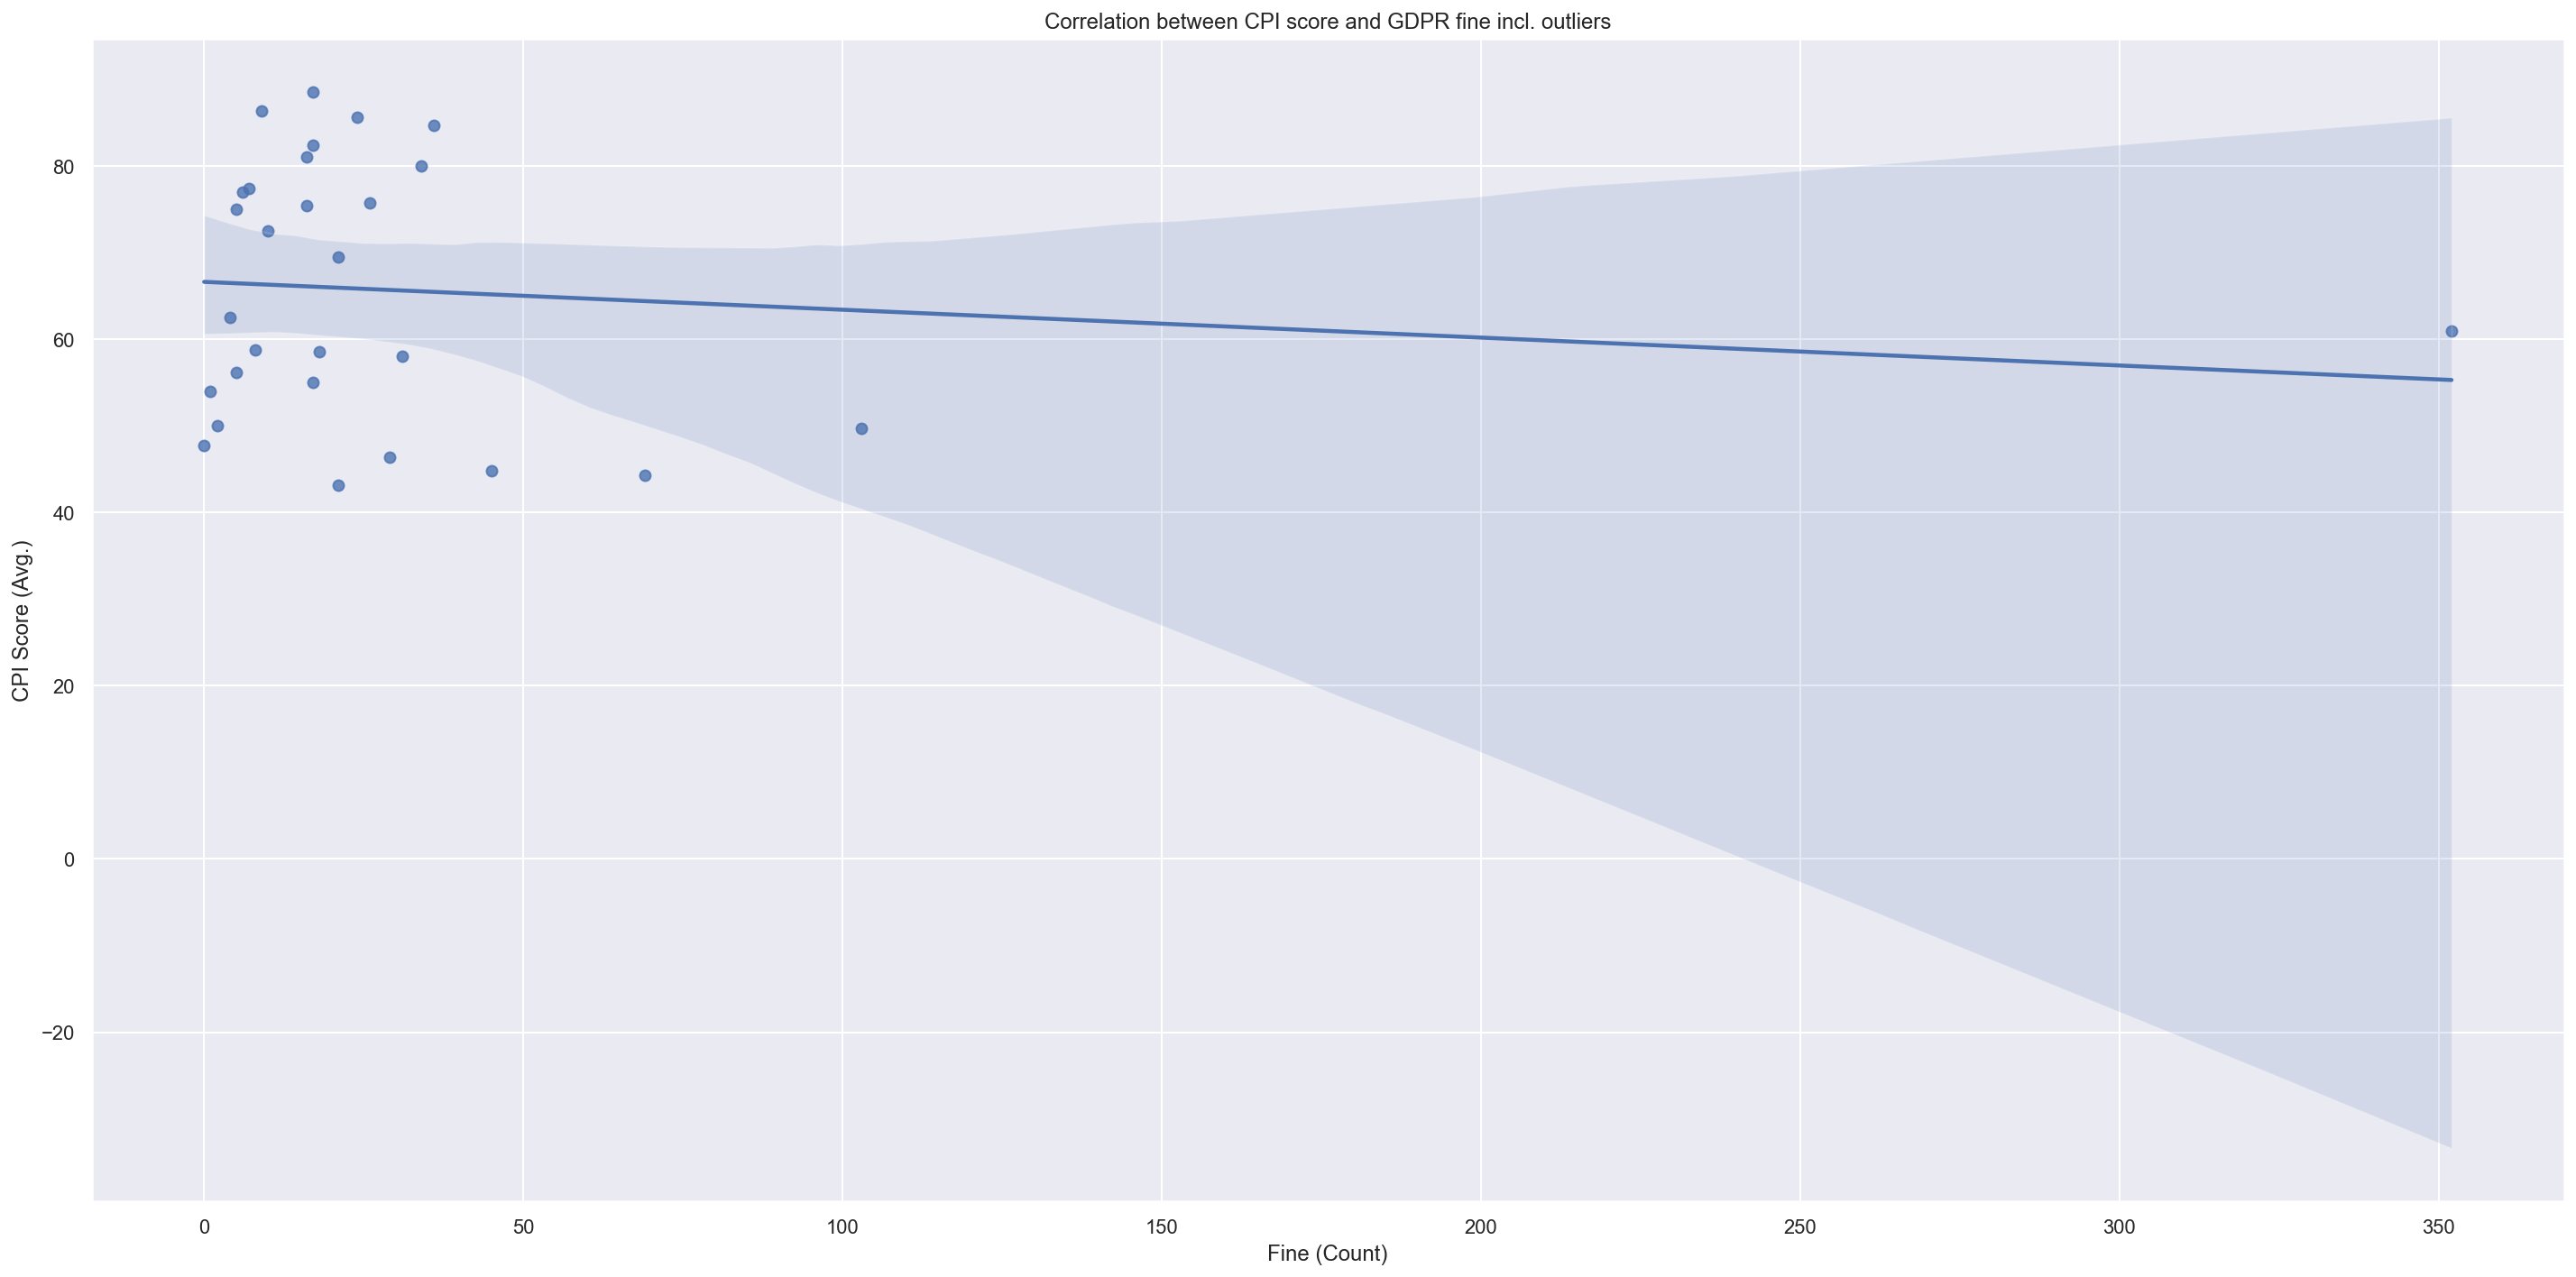

In [1503]:
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

chart = sns.regplot(data=df_ada_grouped_flatten, x="fine_count", y="cpi_score_mean");
chart.set(title='Correlation between CPI score and GDPR fine incl. outliers', xlabel='Fine (Count)', ylabel="CPI Score (Avg.)");

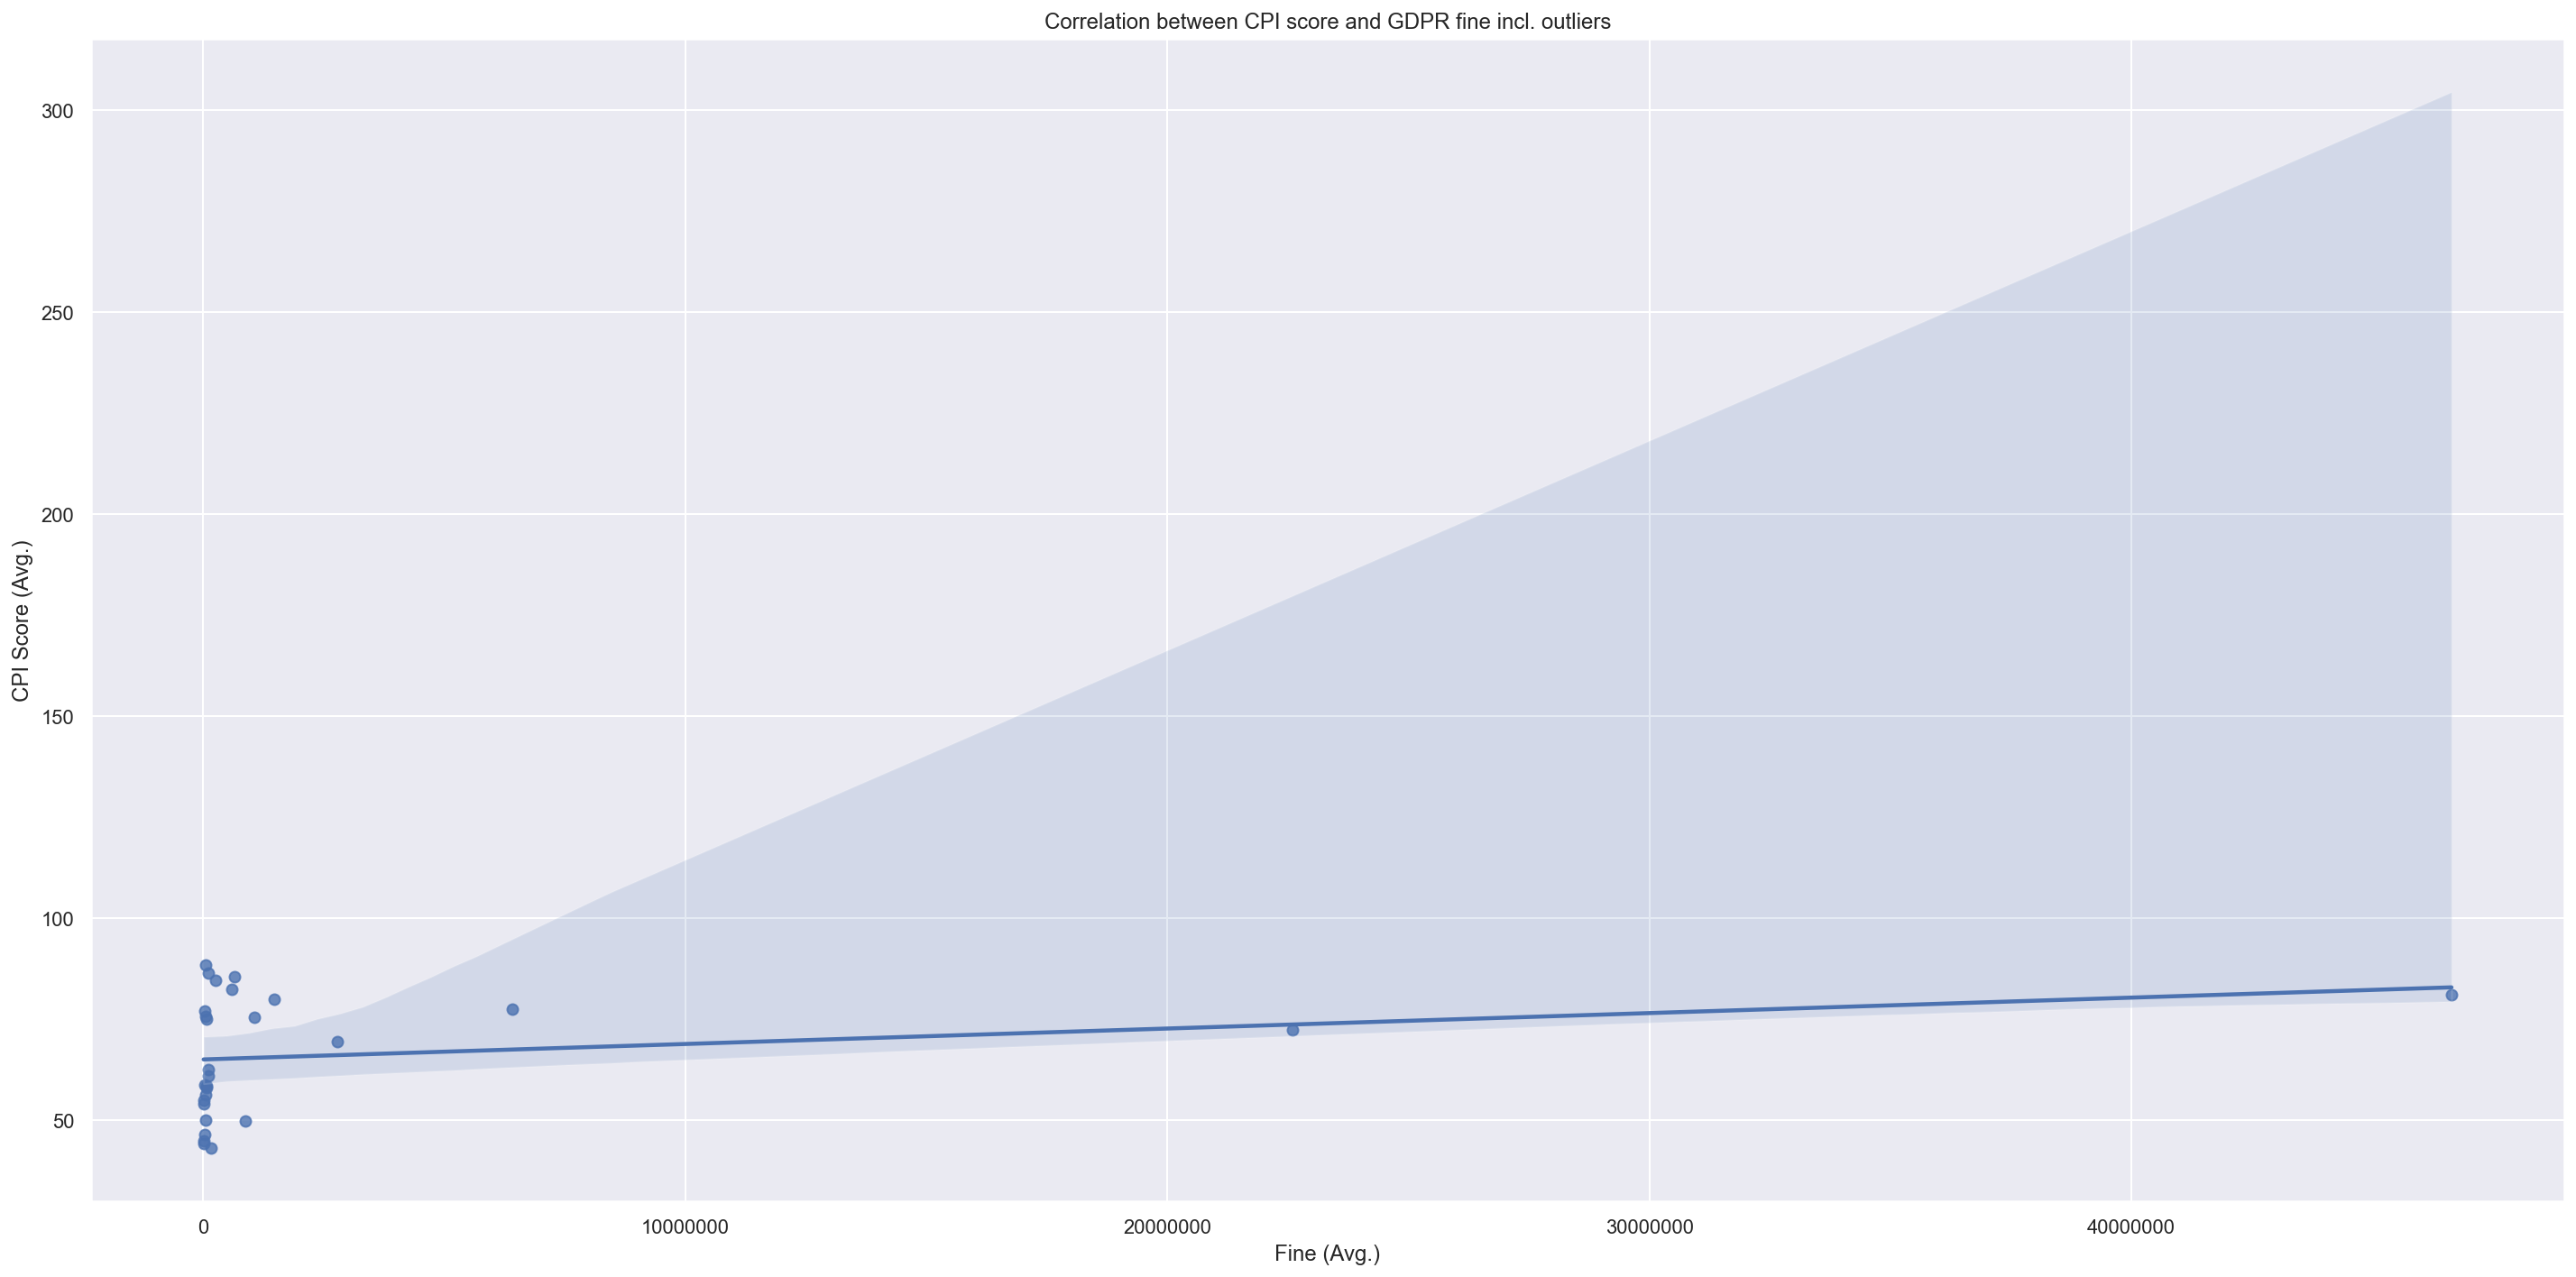

In [1504]:
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

chart = sns.regplot(data=df_ada_grouped_flatten, x="fine_mean", y="cpi_score_mean");
chart.set(title='Correlation between CPI score and GDPR fine incl. outliers', xlabel='Fine (Avg.)', ylabel="CPI Score (Avg.)");

In [1505]:
# Pearson's r cannot be used, because the varibales are not normally distributed
corr_df = df_ada_grouped_flatten.corr(method='spearman')
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
fine_sum,1.00,0.62,0.91,0.70,0.37,0.56
fine_count,0.62,1.00,0.27,0.55,-0.07,0.67
fine_mean,0.91,0.27,1.00,0.59,0.47,0.42
gdp_mean,0.70,0.55,0.59,1.00,0.36,0.87
cpi_score_mean,0.37,-0.07,0.47,0.36,1.00,-0.03
population_mean,0.56,0.67,0.42,0.87,-0.03,1.00


#### Identify and Address "Outliers"

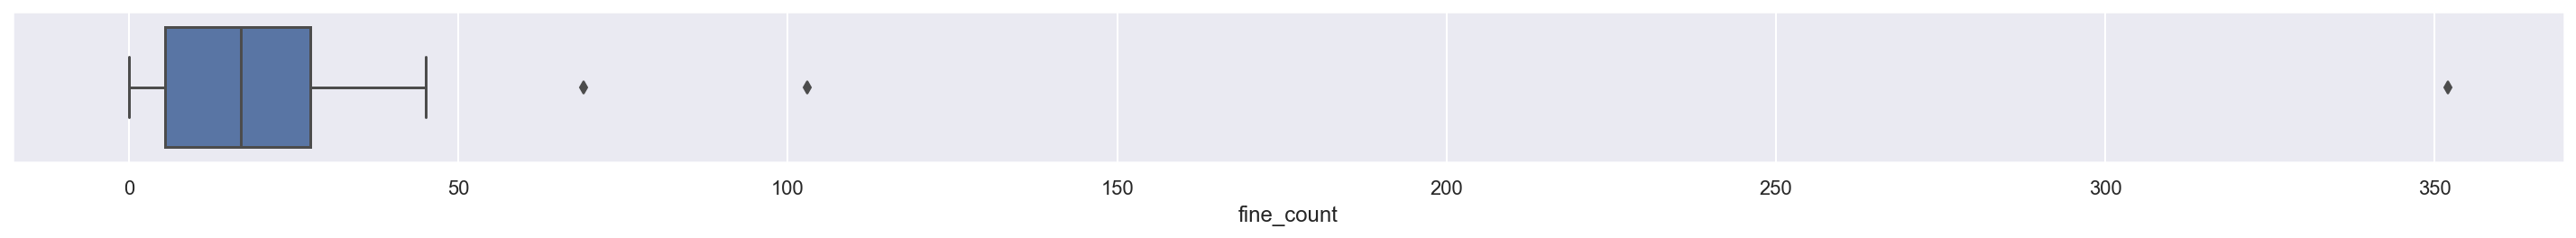

In [1506]:
# Identify and remove fine_count "outlier"
sns.set(rc={"figure.figsize":(20, 2)})
sns.boxplot(data=df_ada_grouped_flatten, x="fine_count");

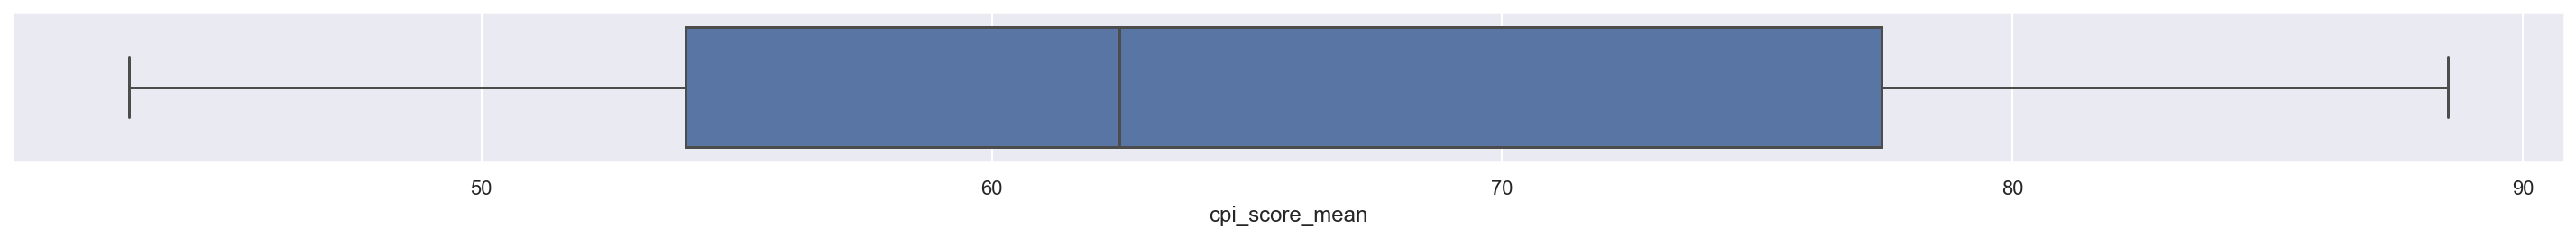

In [1507]:
sns.set(rc={"figure.figsize":(20, 2)})
sns.boxplot(data=df_ada_grouped_flatten, x="cpi_score_mean");

In [1508]:
# Remove fine_count "outliers"
df_ada_grouped_flatten_adjusted = df_ada_grouped_flatten[df_ada_grouped_flatten['fine_count'] < 50]

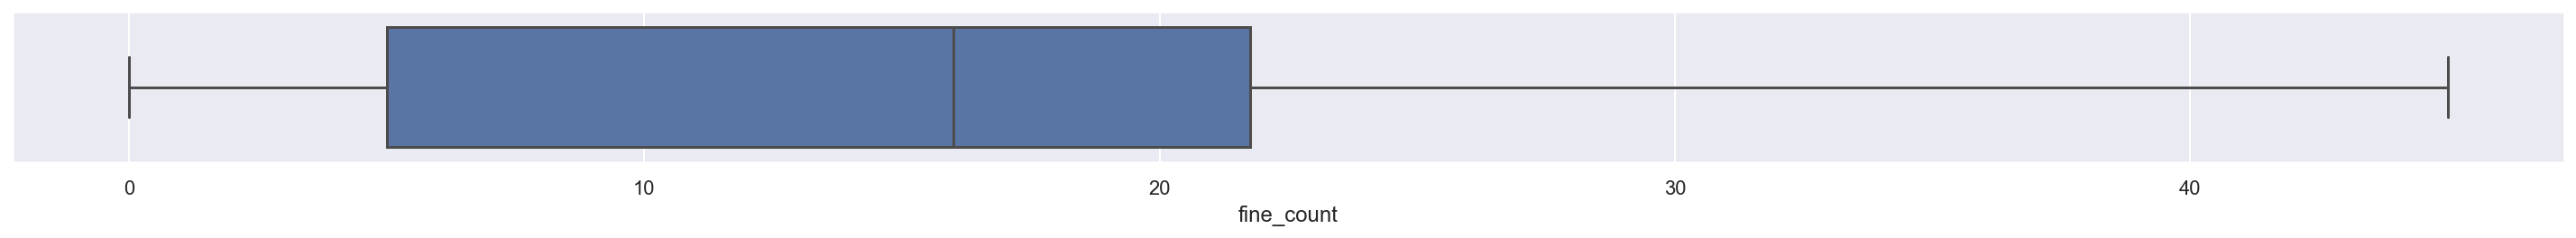

In [1509]:
sns.set(rc={"figure.figsize":(20, 2)})
sns.boxplot(data=df_ada_grouped_flatten_adjusted, x="fine_count");

#### Check Correlations - "Outliers" Removed


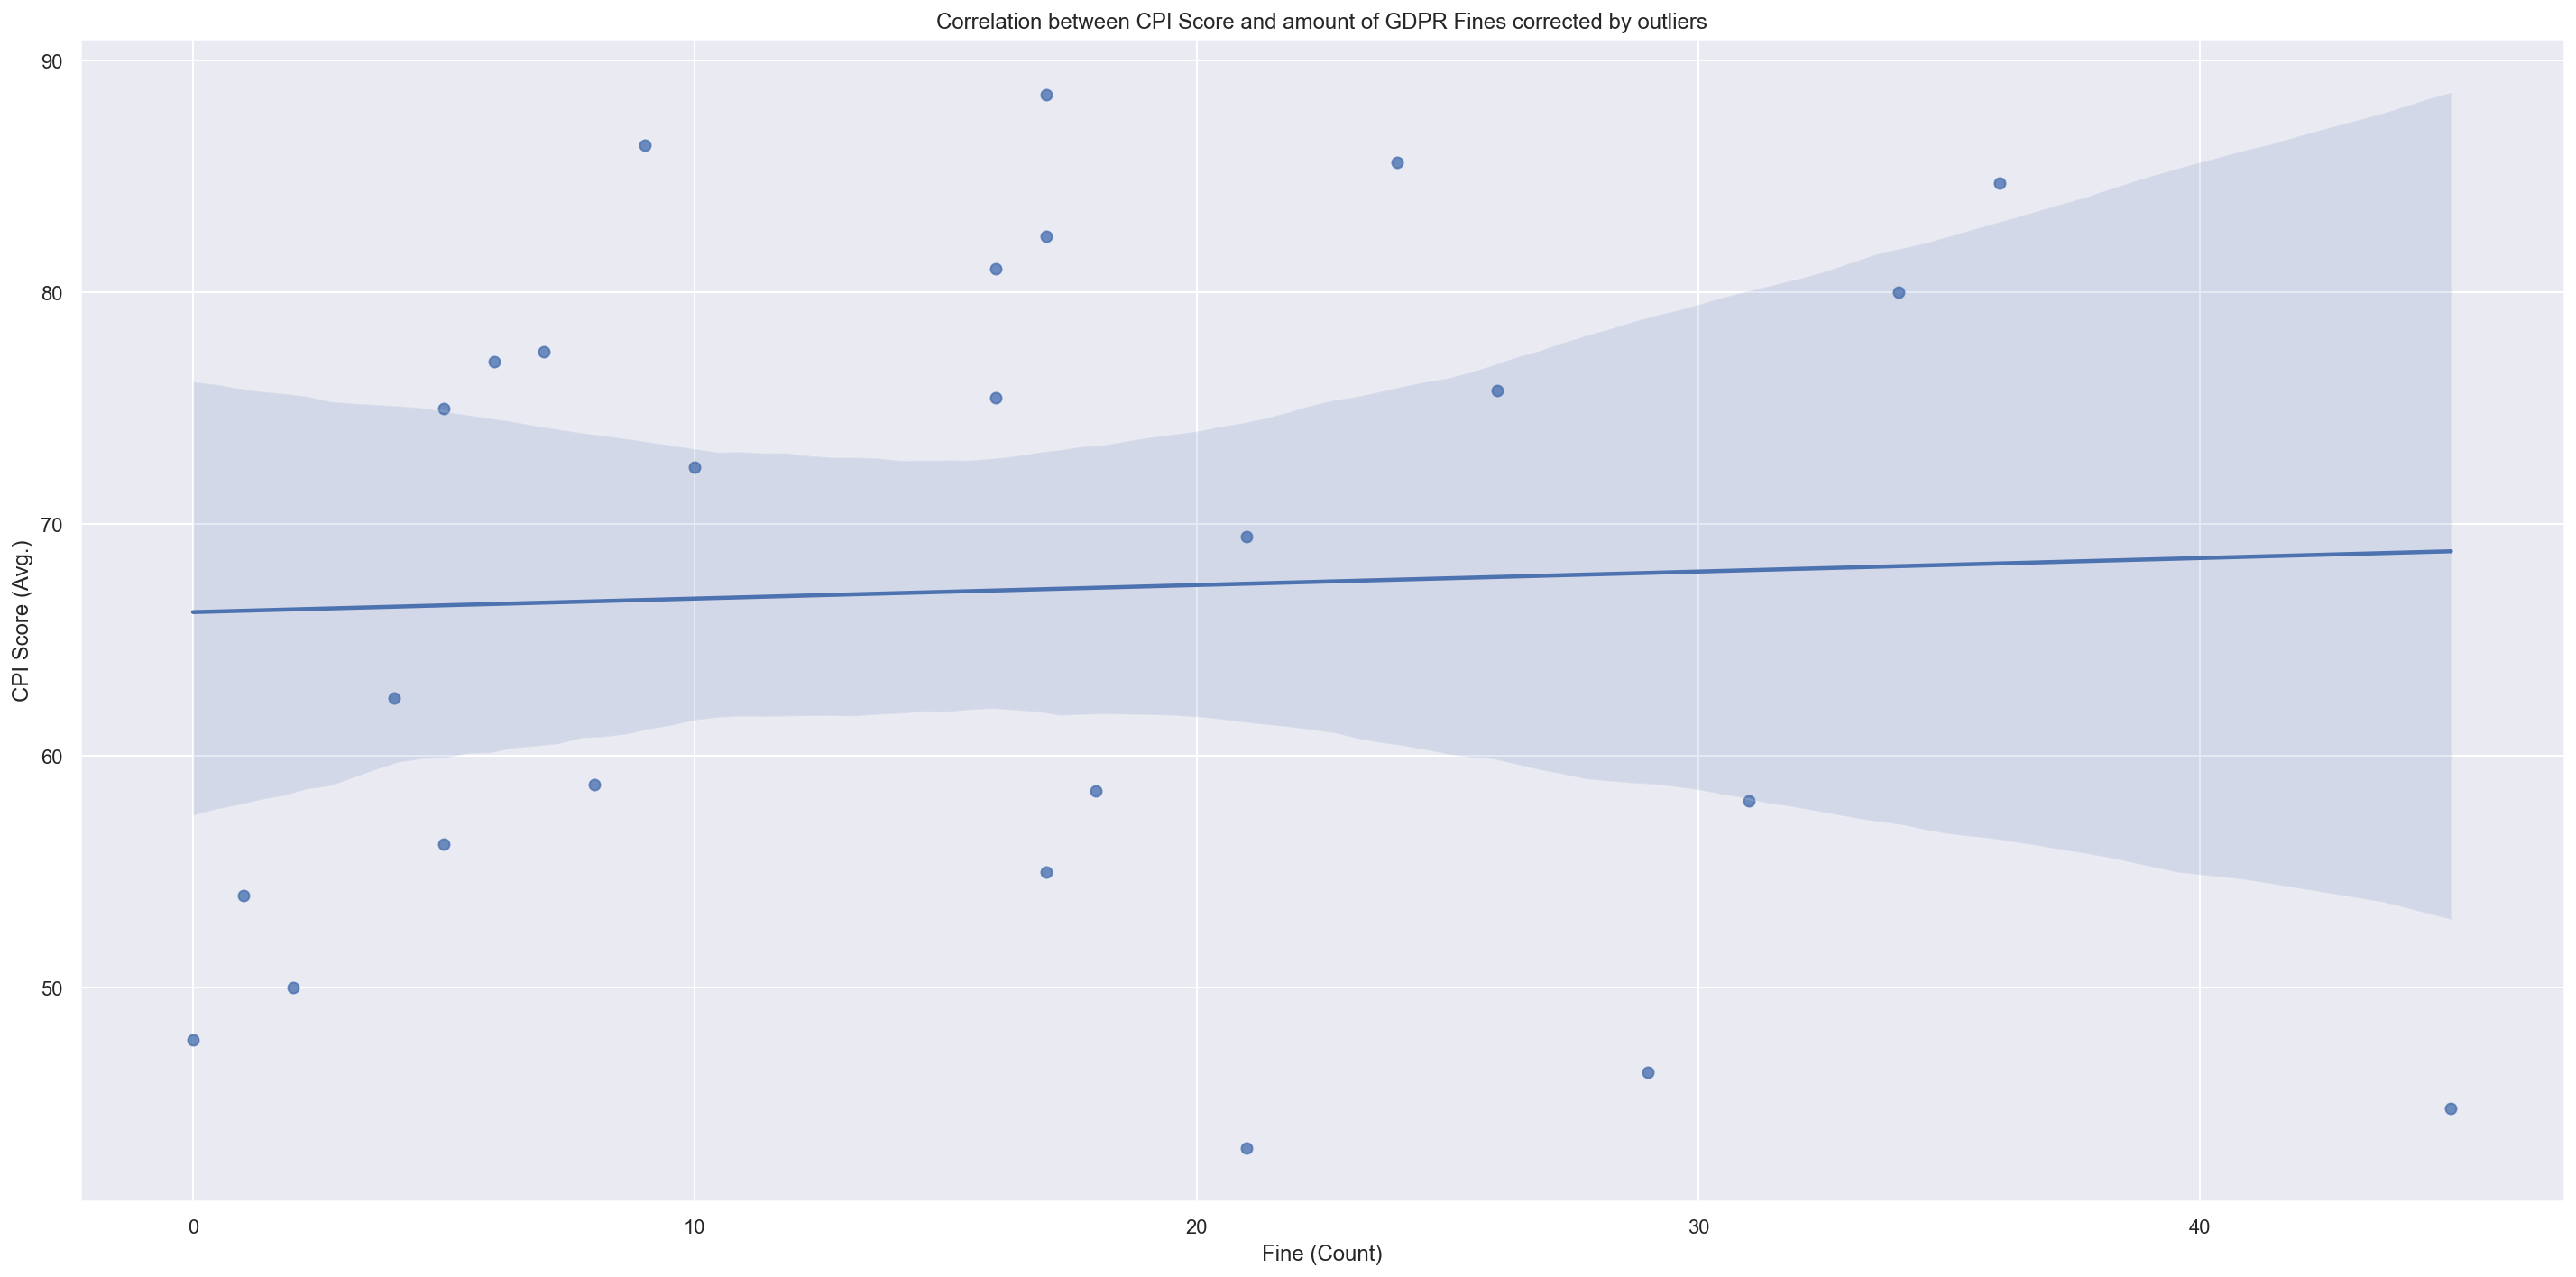

In [1510]:
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

chart = sns.regplot(data=df_ada_grouped_flatten_adjusted, x="fine_count", y="cpi_score_mean");
chart.set(title='Correlation between CPI Score and amount of GDPR Fines corrected by outliers', xlabel='Fine (Count)', ylabel="CPI Score (Avg.)");

In [1511]:
# Pearson's r cannot be used, because the varibales are not normally distributed
corr_df = df_ada_grouped_flatten_adjusted.corr(method='spearman')
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
fine_sum,1.00,0.63,0.92,0.68,0.47,0.53
fine_count,0.63,1.00,0.32,0.53,0.12,0.61
fine_mean,0.92,0.32,1.00,0.58,0.50,0.43
gdp_mean,0.68,0.53,0.58,1.00,0.46,0.87
cpi_score_mean,0.47,0.12,0.50,0.46,1.00,0.09
population_mean,0.53,0.61,0.43,0.87,0.09,1.00


#### **Conclusion**

### **A higher population could lead to more reported cases**
because more data subjects could execute their rights

#### Prepare Dataframe

In [1512]:
df_ada_grouped = (
    df.groupby(["country", "iso3"])["fine", "gdp", "cpi_score", "population"]
    .agg(
        {
            "fine": ["sum", "count", "mean"],
            "gdp": ["mean"],
            "cpi_score": ["mean"],
            "population": ["mean"],
        }
    )
    .reset_index()
)
# df_ada_grouped



In [1513]:
# flatten grouped dataframe
df_ada_grouped_flatten = df_ada_grouped.copy()
df_ada_grouped_flatten.columns = [
    "_".join(i).rstrip("_") for i in df_ada_grouped_flatten.columns.values
]
df_ada_grouped_flatten.round(0)


,country,iso3,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
0,AUSTRIA,AUT,"16,774,550.0",16,"1,048,409.0","436,554,886,197.0",75.0,"8,993,161.0"
1,BELGIUM,BEL,"1,033,000.0",26,"39,731.0","518,081,667,022.0",76.0,"11,592,162.0"
2,BULGARIA,BGR,"3,211,070.0",21,"152,908.0","68,111,987,554.0",43.0,"6,987,925.0"
3,CROATIA,HRV,0.0,0,NaN,"56,251,429,631.0",48.0,"4,086,475.0"
4,CYPRUS,CYP,"1,248,000.0",18,"69,333.0","23,986,520,239.0",58.0,"1,208,123.0"
5,CZECH REPUBLIC,CZE,"165,903.0",17,"9,759.0","247,337,324,518.0",55.0,"10,700,206.0"
6,DENMARK,DNK,"856,600.0",17,"50,388.0","344,299,866,937.0",89.0,"5,803,316.0"
7,ESTONIA,EST,"300,548.0",5,"60,110.0","30,650,285,472.0",75.0,"1,326,535.0"
8,FINLAND,FIN,"924,000.0",9,"102,667.0","265,825,597,718.0",86.0,"5,546,052.0"
9,FRANCE,FRA,"58,194,300.0",21,"2,771,157.0","2,670,778,673,739.0",69.0,"65,317,999.0"


#### Check Distributions - "Outliers" Included

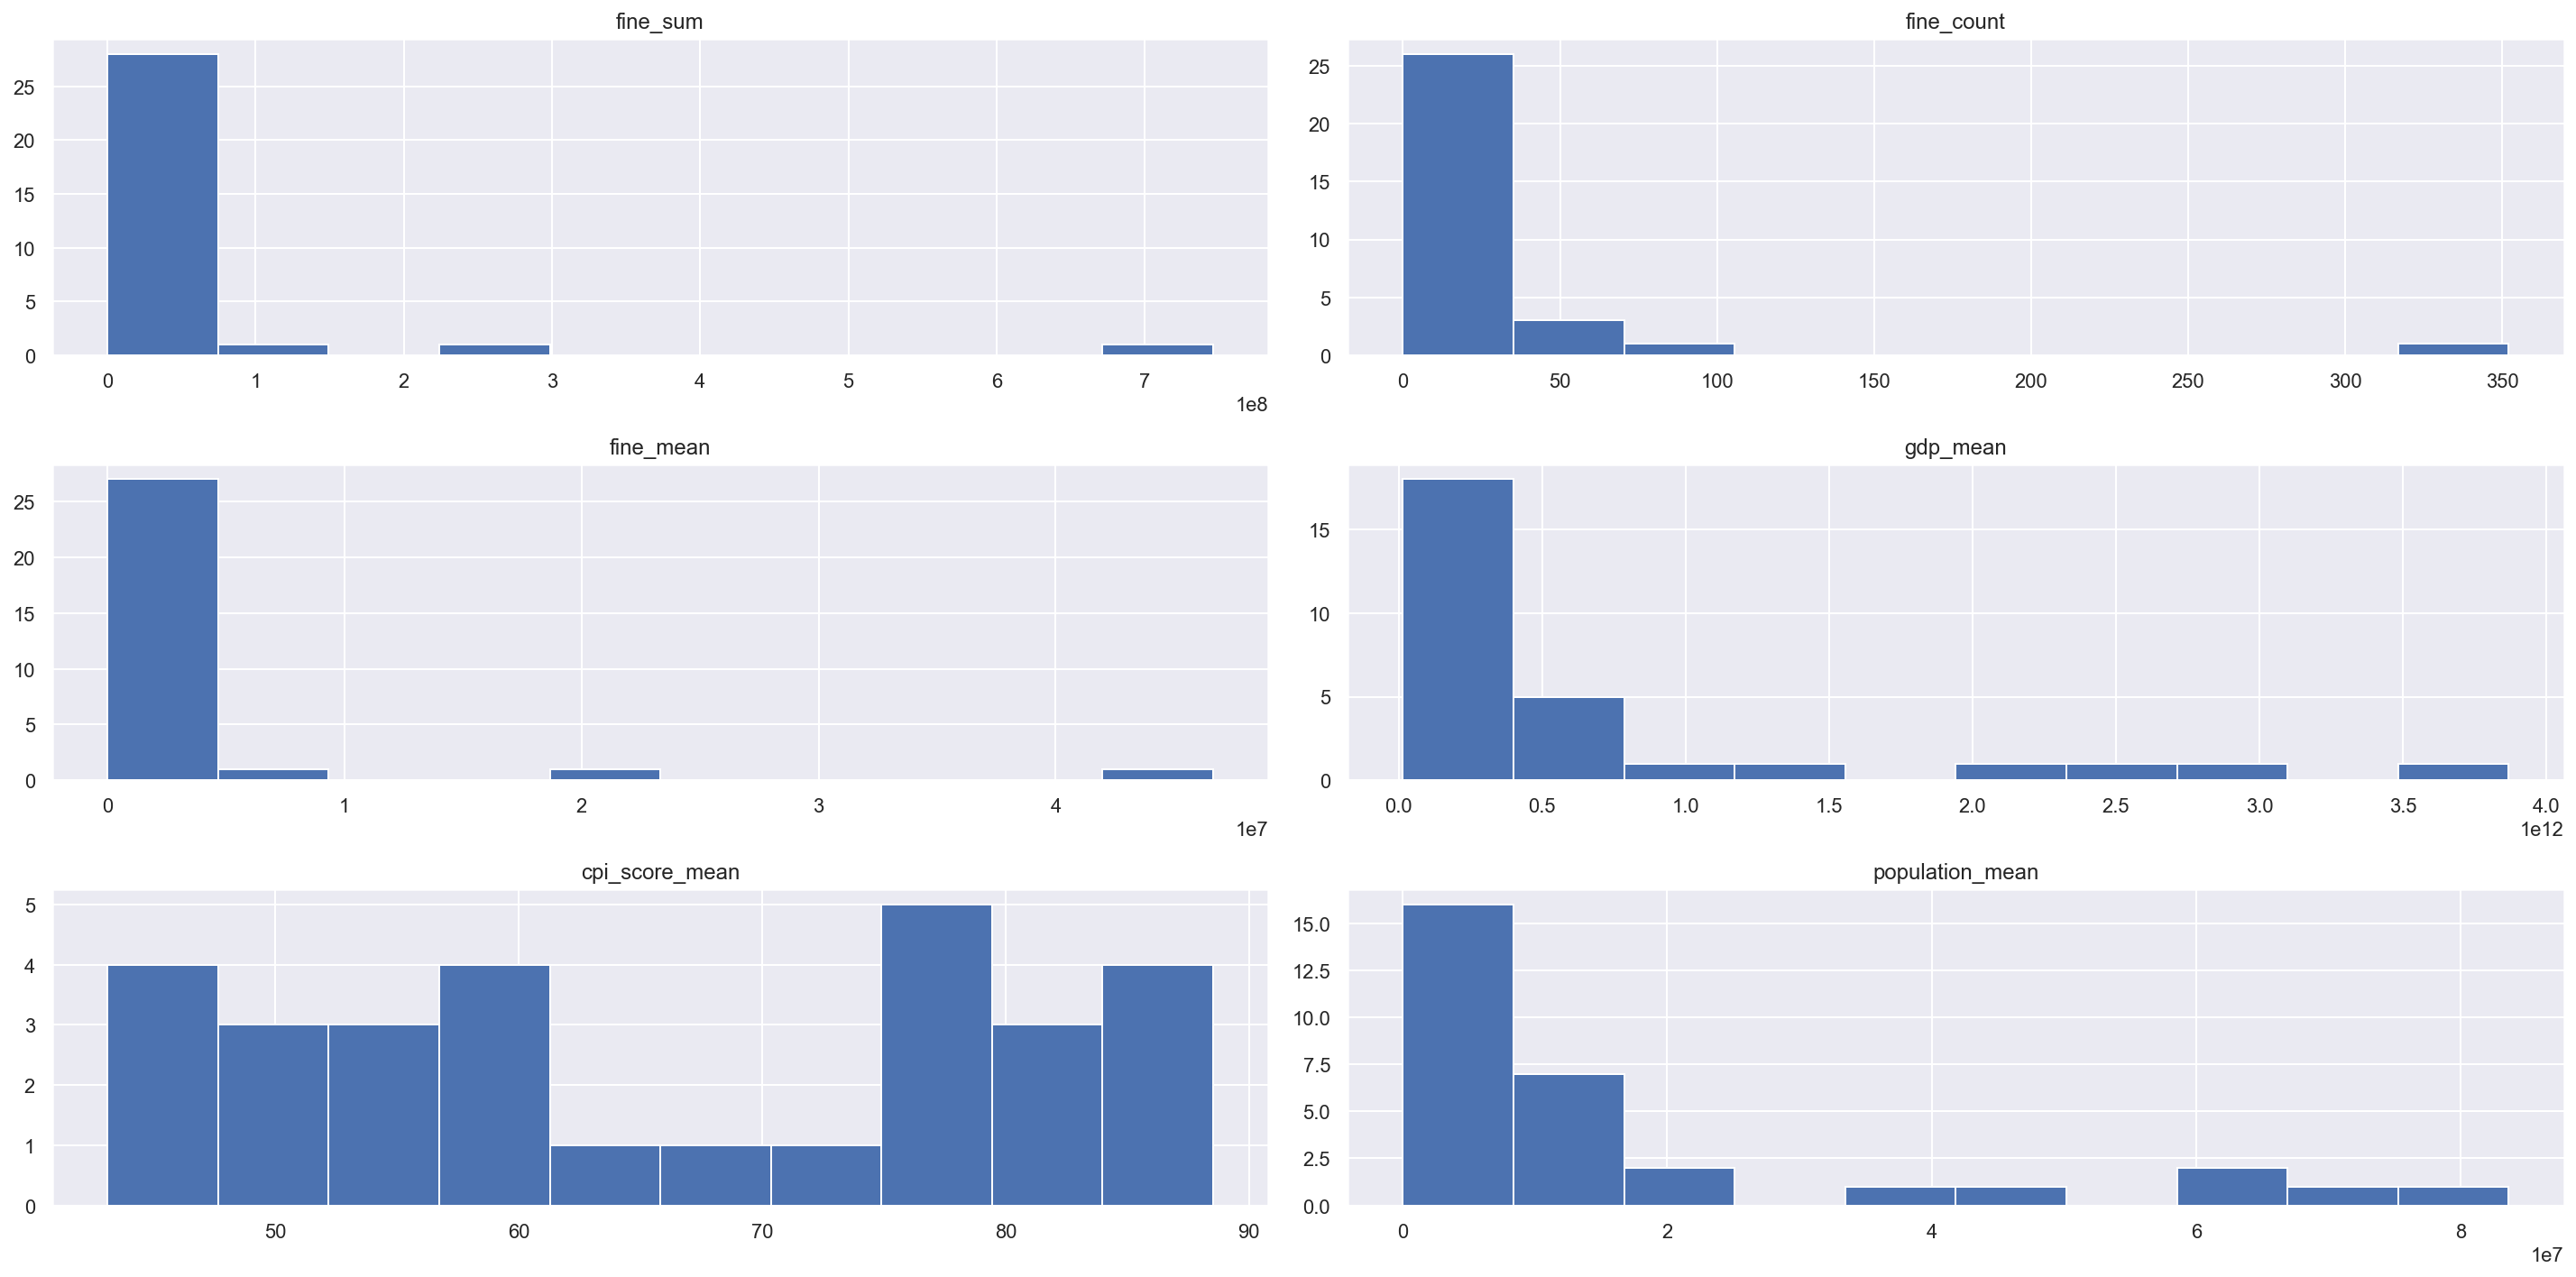

In [1514]:
# Check distribution
sns.set(rc={"figure.figsize":(20, 10)})
df_ada_grouped_flatten.hist();

#### Check Correlation - "Outliers" Included 

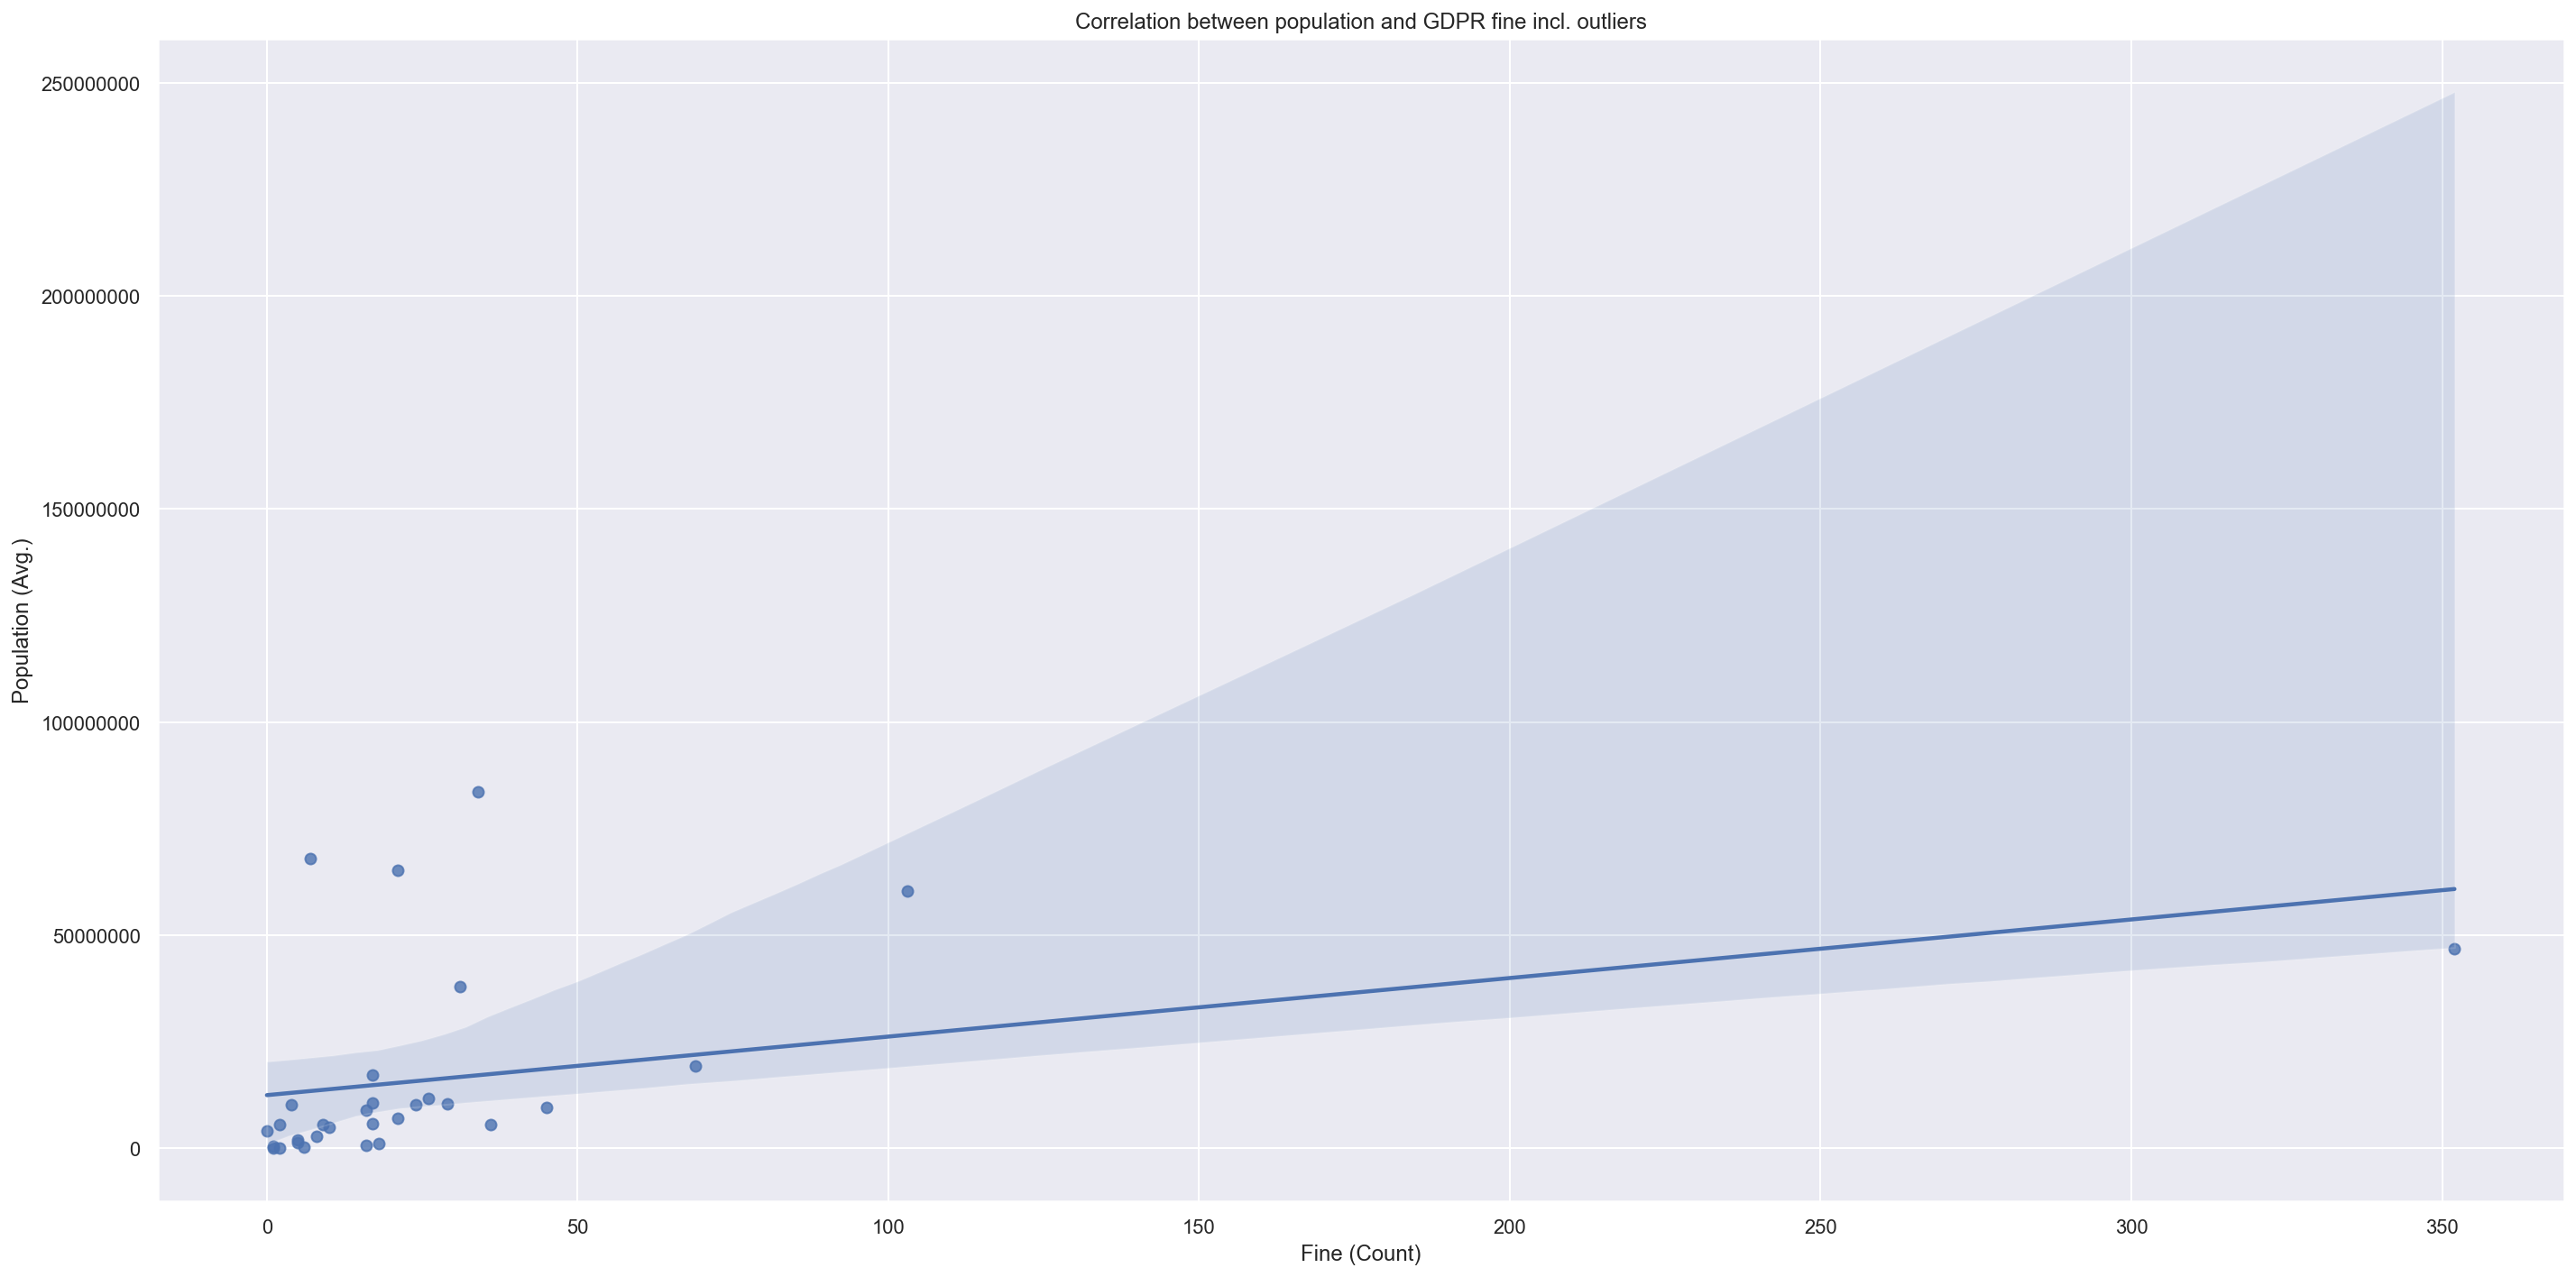

In [1515]:
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

chart = sns.regplot(data=df_ada_grouped_flatten, x="fine_count", y="population_mean");
chart.set(title='Correlation between population and GDPR fine incl. outliers', xlabel='Fine (Count)', ylabel="Population (Avg.)");

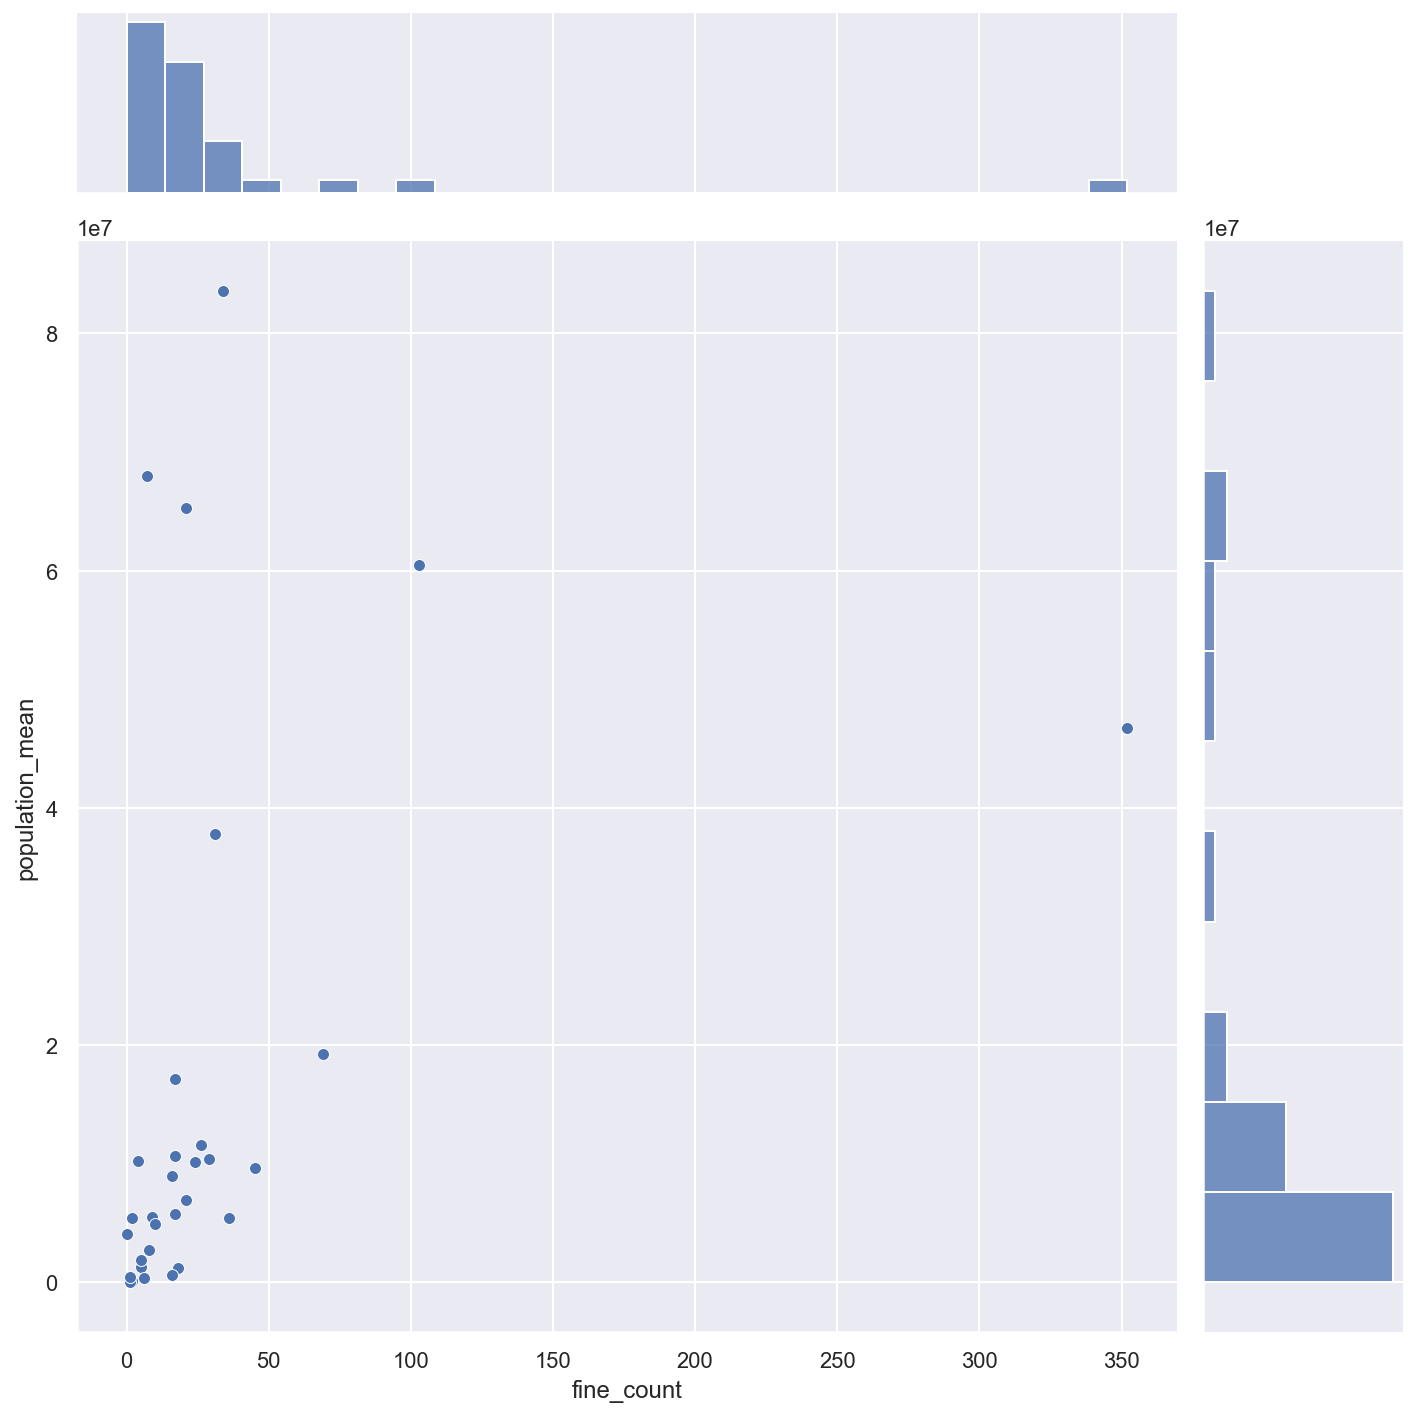

In [1516]:
chart = sns.jointplot(data=df_ada_grouped_flatten, x="fine_count", y="population_mean", height=10);

In [1517]:
# Pearson's r cannot be used, because the varibales are not normally distributed
corr_df = df_ada_grouped_flatten.corr(method='spearman')
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
fine_sum,1.00,0.62,0.91,0.70,0.37,0.56
fine_count,0.62,1.00,0.27,0.55,-0.07,0.67
fine_mean,0.91,0.27,1.00,0.59,0.47,0.42
gdp_mean,0.70,0.55,0.59,1.00,0.36,0.87
cpi_score_mean,0.37,-0.07,0.47,0.36,1.00,-0.03
population_mean,0.56,0.67,0.42,0.87,-0.03,1.00


#### Identify and Address "Outliers"

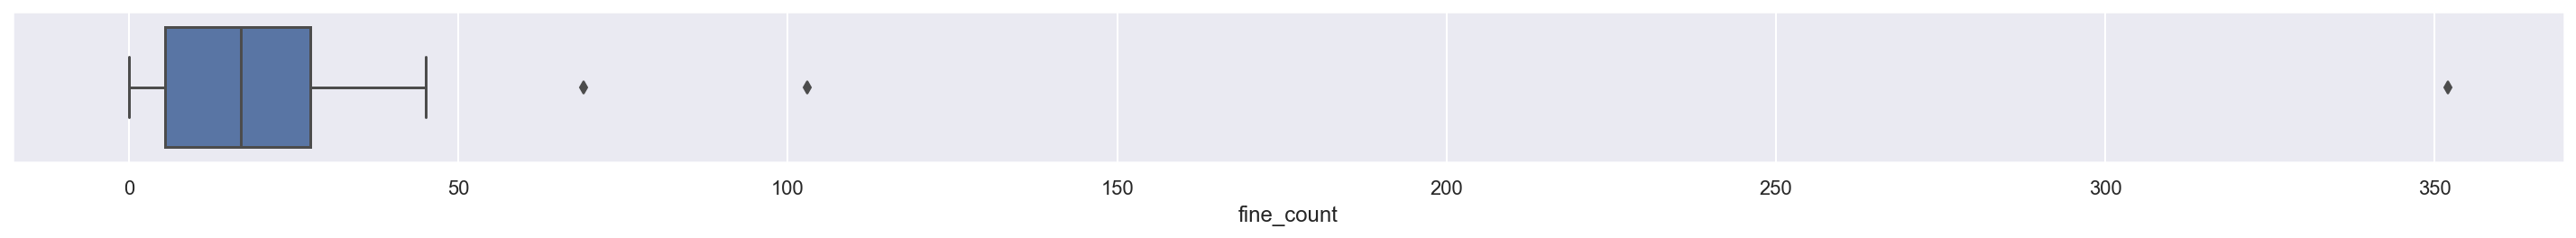

In [1518]:
# Identify and remove fine_count "outlier"
sns.set(rc={"figure.figsize":(20, 2)})
sns.boxplot(data=df_ada_grouped_flatten, x="fine_count");

In [1519]:
# Remove "outliers"
df_ada_grouped_flatten_adjusted = df_ada_grouped_flatten[df_ada_grouped_flatten['fine_count'] < 50]

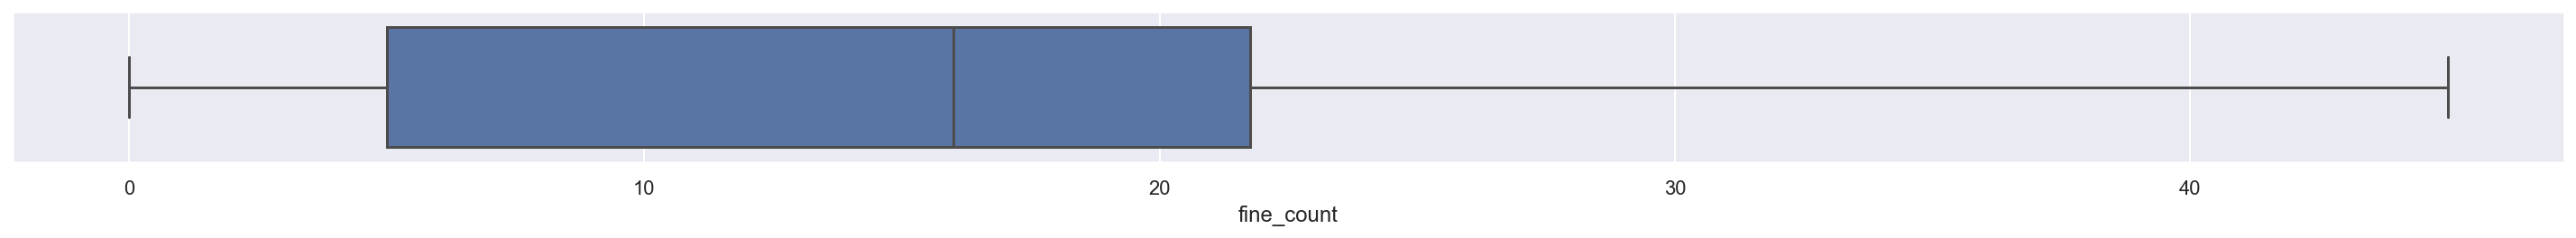

In [1520]:
sns.set(rc={"figure.figsize":(20, 2)})
sns.boxplot(data=df_ada_grouped_flatten_adjusted, x="fine_count");

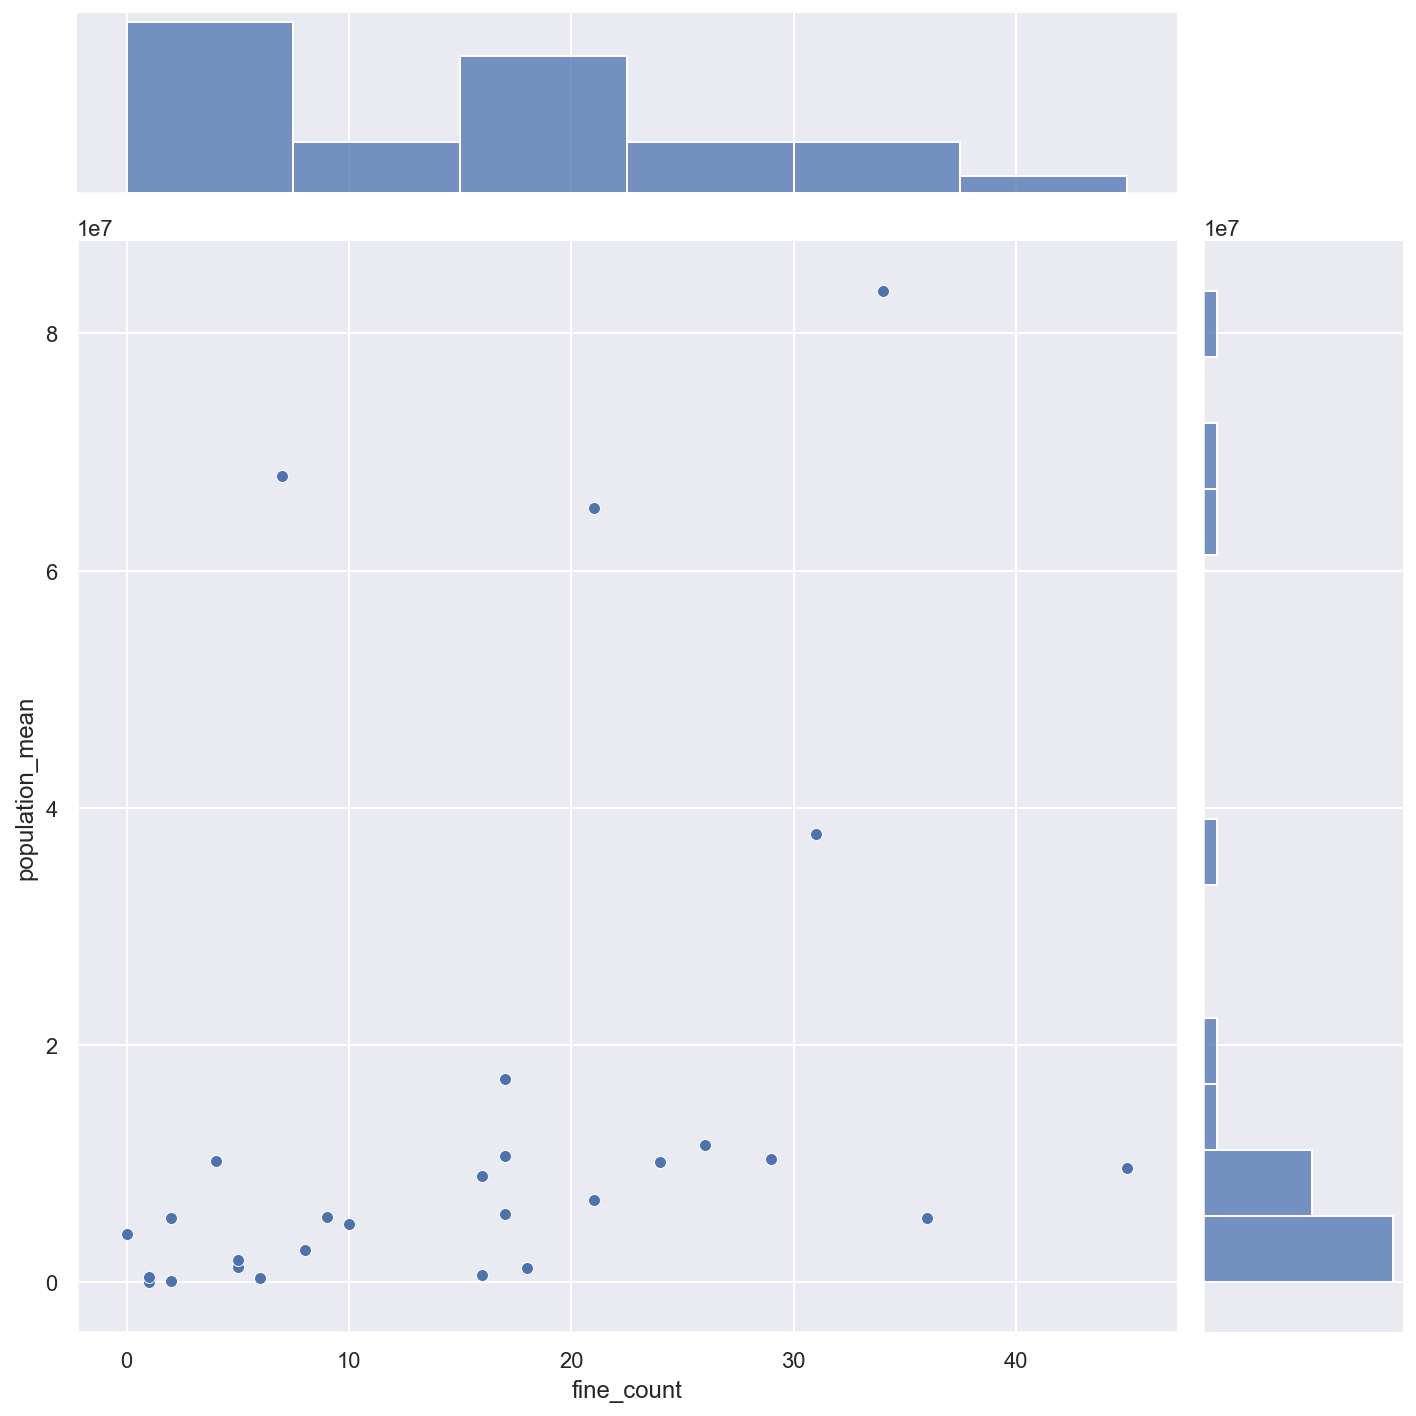

In [1521]:
chart = sns.jointplot(data=df_ada_grouped_flatten_adjusted, x="fine_count", y="population_mean", height=10);

#### Check Correlation - "Outliers" Removed

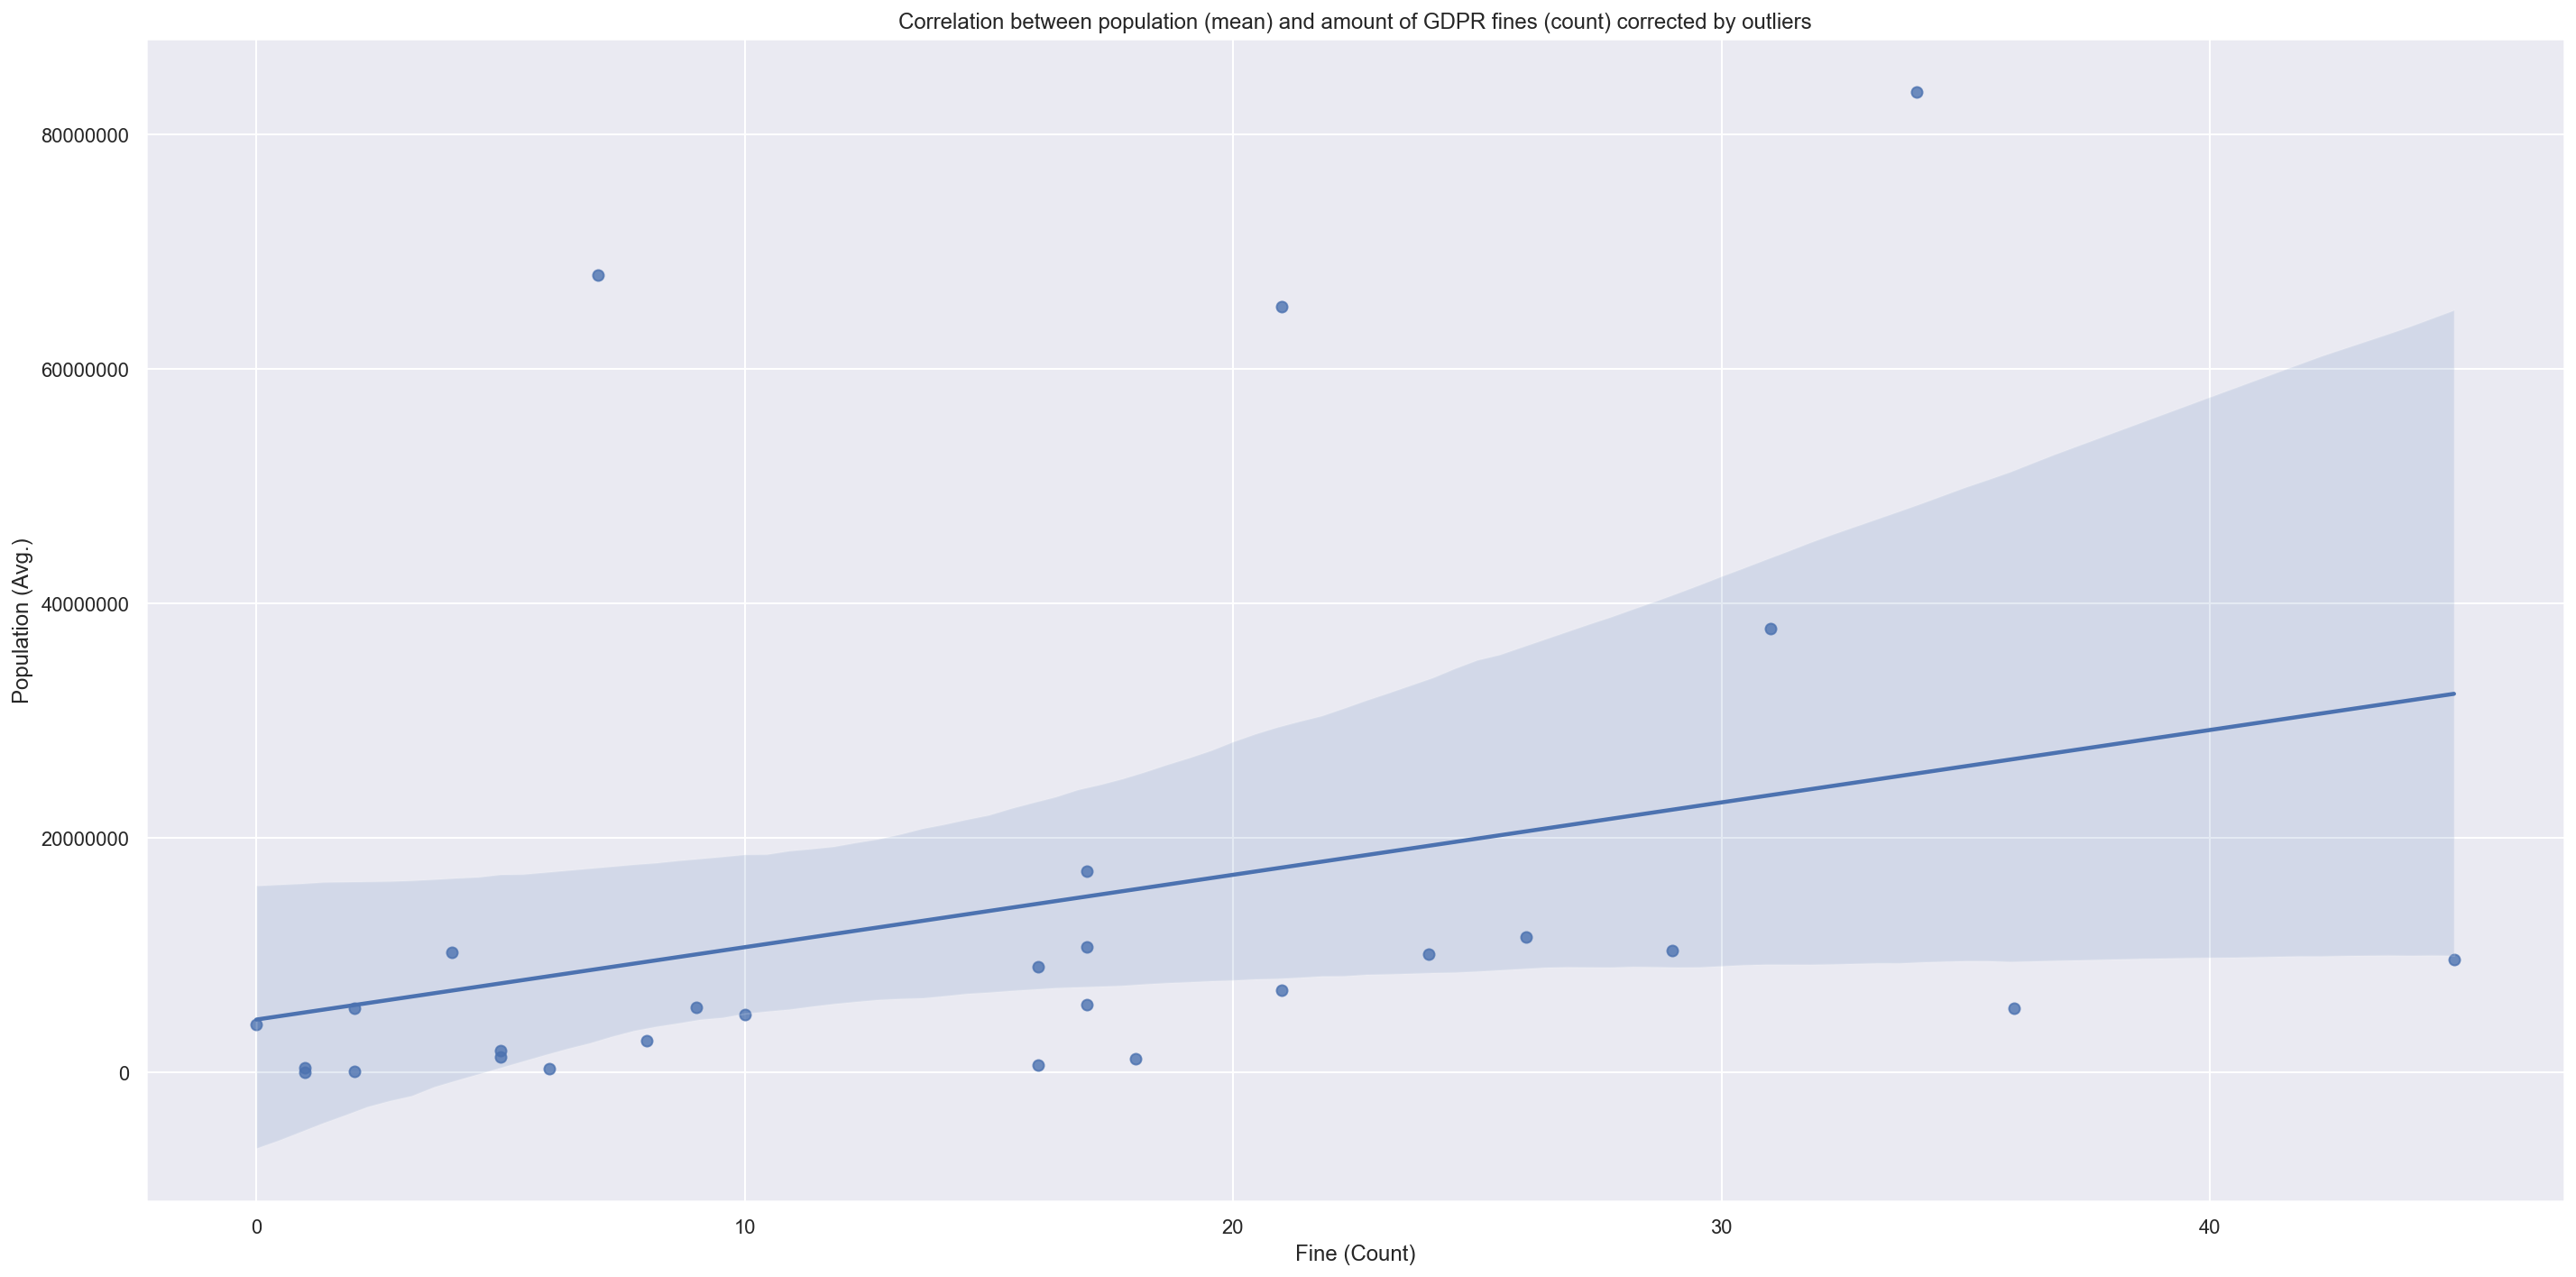

In [1522]:
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain', axis='x',useOffset=False)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

chart = sns.regplot(data=df_ada_grouped_flatten_adjusted, x="fine_count", y="population_mean");
chart.set(title='Correlation between population (mean) and amount of GDPR fines (count) corrected by outliers', xlabel='Fine (Count)', ylabel="Population (Avg.)");

In [1523]:
# Pearson's r cannot be used, because the varibales are not normally distributed
corr_df = df_ada_grouped_flatten_adjusted.corr(method='spearman')
corr_df.style.background_gradient(cmap='coolwarm').set_precision(2)

,fine_sum,fine_count,fine_mean,gdp_mean,cpi_score_mean,population_mean
fine_sum,1.00,0.63,0.92,0.68,0.47,0.53
fine_count,0.63,1.00,0.32,0.53,0.12,0.61
fine_mean,0.92,0.32,1.00,0.58,0.50,0.43
gdp_mean,0.68,0.53,0.58,1.00,0.46,0.87
cpi_score_mean,0.47,0.12,0.50,0.46,1.00,0.09
population_mean,0.53,0.61,0.43,0.87,0.09,1.00


#### **Conclusion**

...

## Additional Questions Identified During Analysis

### Focus on the Sector "Health Care"

# Watermark

In [1524]:
%watermark

Last updated: 2022-01-24T22:24:01.737436+01:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.30.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit



In [1525]:
%watermark --iversions

sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:15:42) [MSC v.1916 64 bit (AMD64)]
seaborn   : 0.11.2
sqlite3   : 2.6.0
pandas    : 1.4.0
matplotlib: 3.5.0
altair    : 4.1.0
numpy     : 1.21.4



-----
